In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
from PIL import Image
import os
from torch.utils.data import DataLoader, Dataset
import torchvision
from torchvision import transforms
import torch.nn as nn
import torch
import torch.optim as optim
import shutil
import random
import statistics

In [97]:
csv = "C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/csv_dataset/NG/csv_files/dirichlet/dirich_floor2.csv"
df = pd.read_csv(csv,header=0)
df = df.rename(columns={'LONGITUDE':'LATITUDE', 'LATITUDE':'LONGITUDE'})
df.to_csv(csv,index=False)

In [102]:
csv_dir = "C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/csv_dataset/NG/csv_files/combined_train_modified_2m.csv"
df = pd.read_csv(csv_dir,header=0)
df = df.drop(columns=['TYPE','TIMESTAMP','FLOOR_ID','FLOOR','LATITUDE','LONGITUDE'])
df = df.rename(columns={'NEW_LAT':'LATITUDE', 'NEW_LONG':'LONGITUDE'})
col = df.columns.tolist()
col.pop(-1)
col.pop(-1)
col.extend(['LONGITUDE','LATITUDE'])
df = df[col]
# csv = "C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/csv_dataset/NG/csv_files/dirichlet/dirich_floor2.csv"
# ndf = pd.read_csv(csv,header=0)
# df = df.append(ndf,ignore_index=True)
print(df)


       AP1  AP2  AP3  AP4  AP5  AP6  AP7  AP8  AP9  AP10  ...  AP338  AP339  \
0     -110 -110 -110 -110 -110 -110 -110 -110  -88  -110  ...   -110   -110   
1     -110 -110 -110 -110 -110 -110 -110 -110 -110  -110  ...   -110   -110   
2     -110 -110 -110 -110 -110 -110 -110 -110  -70  -110  ...    -62   -110   
3     -110 -110 -110 -110 -110 -110 -110 -110 -110  -110  ...    -65   -110   
4     -110 -110 -110 -110 -110 -110 -110 -110  -85  -110  ...    -57   -110   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
16152 -110 -110 -110 -110 -110 -110 -110 -110 -110  -110  ...   -110   -110   
16153 -110 -110 -110 -110 -110 -110 -110 -110 -110  -110  ...   -110   -110   
16154 -110 -110 -110 -110 -110 -110 -110 -110 -110  -110  ...   -110   -110   
16155 -110 -110 -110 -110 -110 -110 -110 -110 -110  -110  ...   -110   -110   
16156 -110 -110 -110 -110 -110 -110 -110 -110 -110  -110  ...   -110   -110   

       AP340  AP341  AP342  AP343  AP344  AP345    

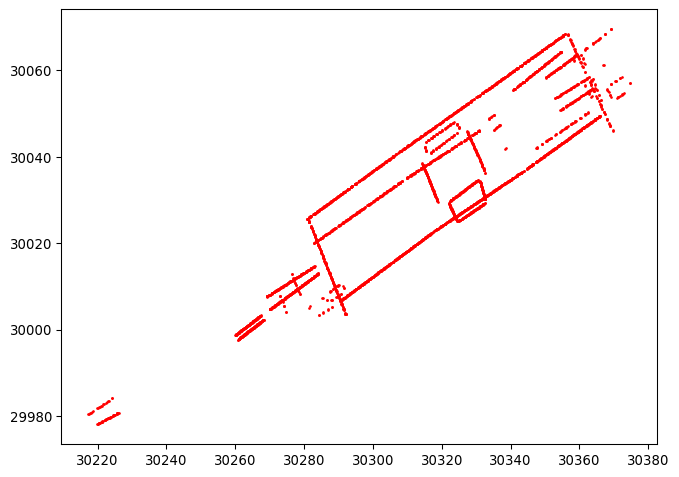

In [55]:
figure(figsize=(8, 6), dpi=96)

df = pd.read_csv("C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/csv_dataset/NG/csv_files/trail.csv", header=0)
df = df.iloc[:,:2].values.tolist()
plt.scatter(*zip(*df), s = 1, c ="red", label="Predicted")

# Plot ground truths

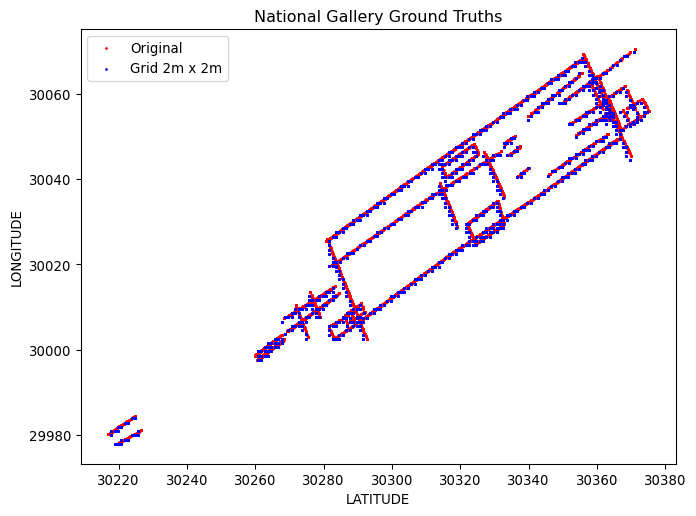

In [8]:
figure(figsize=(8, 6), dpi=96)

df = pd.read_csv("C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/csv_dataset/NG/csv_files/combined_train_modified_2m.csv", header=0)
lat = np.array(df["LATITUDE"])
long = np.array(df["LONGITUDE"])
new_lat = np.array(df["NEW_LAT"])
new_long = np.array(df["NEW_LONG"])
plt.scatter(lat, long, s = 1, c ="red", label="Original")
plt.scatter(new_lat, new_long, s = 1, c = "blue", label="Grid 2m x 2m")
plt.xlabel("LATITUDE")
plt.ylabel("LONGITUDE")
plt.title("National Gallery Ground Truths")
plt.legend()
plt.show()

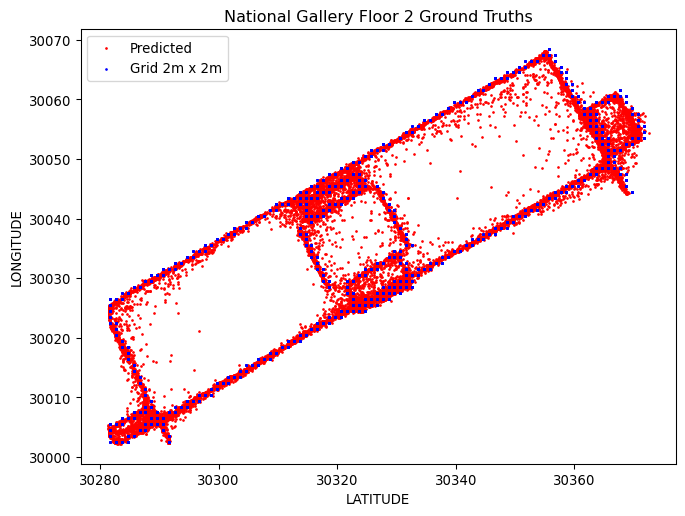

In [33]:
figure(figsize=(8, 6), dpi=96)

df = pd.read_csv("C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/csv_dataset/NG/csv_files/final_results/extendedWGAN+_pred.csv", header=0)
df = df[df["FID"] == "floor2"]
lat = np.array(df["PREDICTED_LATITUDE"])
long = np.array(df["PREDICTED_LONGITUDE"])
new_lat = np.array(df["ACTUAL_LATITUDE"])
new_long = np.array(df["ACTUAL_LONGITUDE"])
plt.scatter(lat, long, s = 1, c ="red", label="Predicted")
plt.scatter(new_lat, new_long, s = 1, c = "blue", label="Grid 2m x 2m")
plt.xlabel("LATITUDE")
plt.ylabel("LONGITUDE")
plt.title("National Gallery Floor 2 Ground Truths")
plt.legend()
plt.show()

# Localisation Results Comparison NG

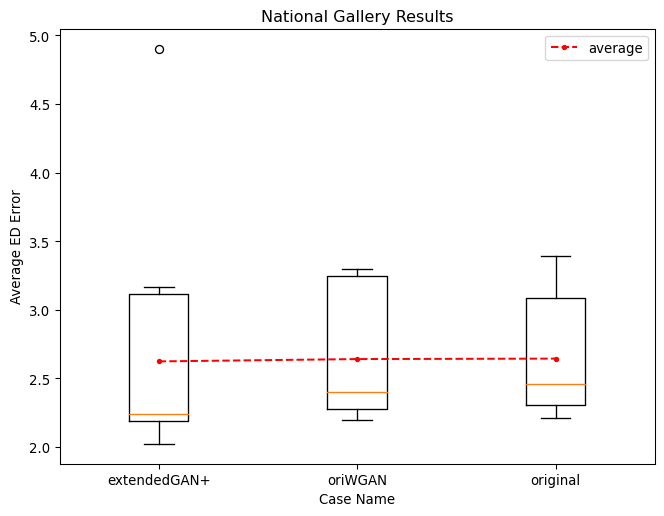

In [140]:
figure(figsize=(8, 6), dpi=96)
df = pd.read_csv("C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/csv_dataset/NG/csv_files/final_results/overall_result.csv",header=0)

data_1 = df[df["CASE"] == "extendedGAN+"].loc[:,"MEAN"].values.tolist()
data_2 = df[df["CASE"] == "mixed"].loc[:,"MEAN"].values.tolist()
data_3 = df[df["CASE"] == "original"].loc[:,"MEAN"].values.tolist()
data = [data_1, data_2, data_3]
 
plt.boxplot(data)
plt.title("National Gallery Results")
plt.xlabel("Case Name")
plt.ylabel("Average ED Error")

mean = [np.mean(d) for d in data]
plt.plot([1,2,3], mean, 'r.--', label="average")
# show plot
plt.legend()
plt.xticks([1, 2, 3], ['extendedGAN+', 'oriWGAN', 'original'])
plt.show()

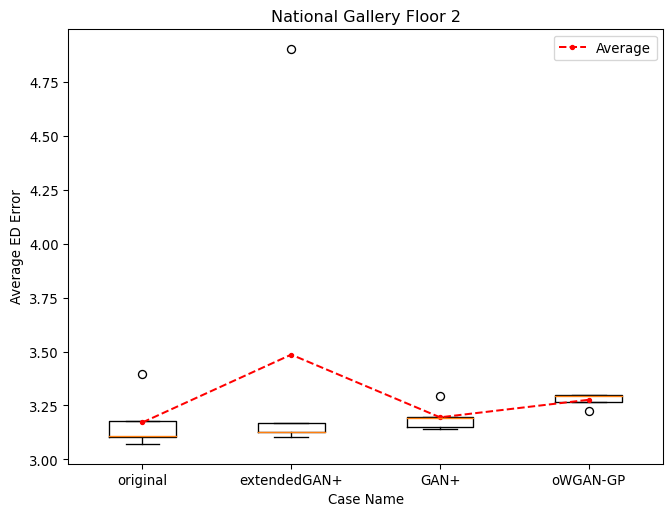

In [10]:
figure(figsize=(8, 6), dpi=96)
df = pd.read_csv("C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/csv_dataset/NG/csv_files/final_results/grouped_test_labels/overall_result.csv",header=0)

data_1 = df[(df["CASE"] == "original") & (df["BFID"] == "floor2")].loc[:,"MEAN"].values.tolist()
data_2 = df[(df["CASE"] == "extendedGAN+") & (df["BFID"] == "floor2")].loc[:,"MEAN"].values.tolist()
data_3 = df[(df["CASE"] == "mixed") & (df["BFID"] == "floor2")].loc[:,"MEAN"].values.tolist()
data_4 = df[(df["CASE"] == "GAN+") & (df["BFID"] == "floor2")].loc[:,"MEAN"].values.tolist()
data = [data_1, data_2, data_4,data_3]
 
plt.boxplot(data)
plt.title("National Gallery Floor 2")
plt.xlabel("Case Name")
plt.ylabel("Average ED Error")

mean = [np.mean(d) for d in data]
plt.plot([1,2,3,4], mean, 'r.--', label="Average")
# show plot
plt.legend()
plt.xticks([1,2,3,4], ['original','extendedGAN+', 'GAN+', 'oWGAN-GP'])
plt.show()

# Localisation Results Comparison UJI

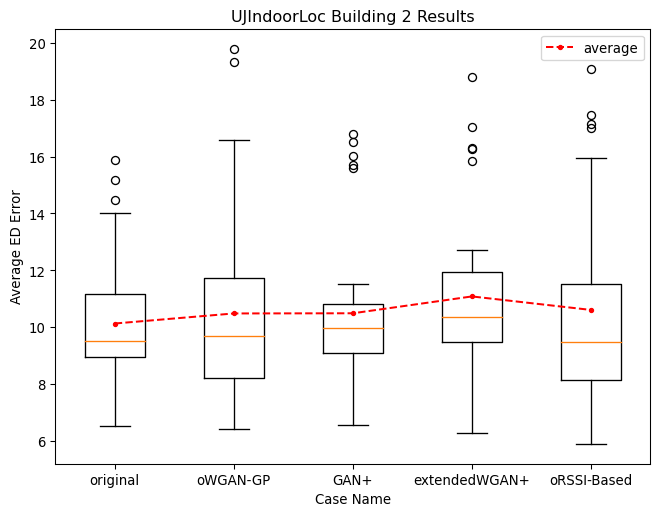

In [193]:
figure(figsize=(8, 6), dpi=96)
#BSID, TRAIN_NUM, MODEL_STATE, MEAN, MIN, MAX, VAR
bsid = ["b2f0","b2f1","b2f2","b2f3","b2f4"]
df = pd.read_csv("C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/csv_files/results/overall_result.csv",header=0)
df = df[df["BFID"].isin(bsid)]

data_1 = df[df["CASE"] == "original"].loc[:,"MEAN"].values.tolist()
data_2 = df[df["CASE"] == "ori_wgan"].loc[:,"MEAN"].values.tolist()
data_3 = df[df["CASE"] == "gan+"].loc[:,"MEAN"].values.tolist()
data_4 = df[df["CASE"] == "extendedGAN+"].loc[:,"MEAN"].values.tolist()
data_5 = df[df["CASE"] == "rssi-based"].loc[:,"MEAN"].values.tolist()
data = [data_1, data_2, data_3, data_4, data_5]

plt.boxplot(data)
plt.title("UJIndoorLoc Building 2 Results")
plt.xlabel("Case Name")
plt.ylabel("Average ED Error")

mean = [np.mean(d) for d in data]
plt.plot([1,2,3,4,5], mean, 'r.--', label="average")
# show plot
plt.legend()
plt.xticks([1, 2, 3, 4,5], ['original', 'oWGAN-GP', 'GAN+', 'extendedWGAN+', 'oRSSI-Based'])
plt.show()

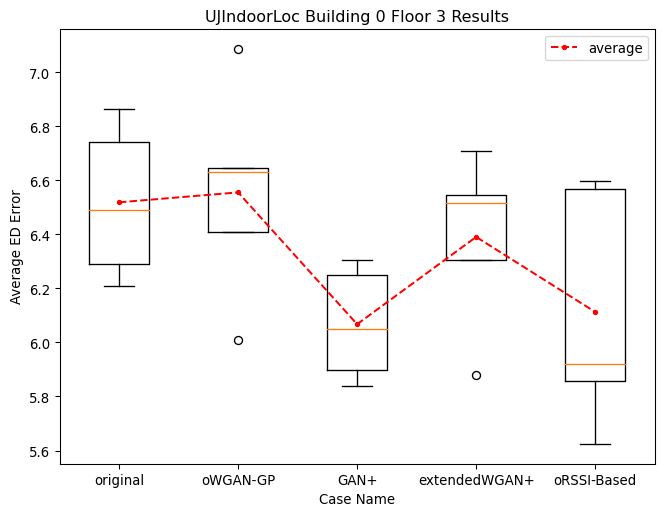

In [207]:
figure(figsize=(8, 6), dpi=96)
#BSID, TRAIN_NUM, MODEL_STATE, MEAN, MIN, MAX, VAR
bsid = ["b0f3"]
df = pd.read_csv("C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/csv_files/results/overall_result.csv",header=0)
df = df[df["BFID"].isin(bsid)]

data_1 = df[df["CASE"] == "original"].loc[:,"MEAN"].values.tolist()
data_2 = df[df["CASE"] == "ori_wgan"].loc[:,"MEAN"].values.tolist()
data_3 = df[df["CASE"] == "gan+"].loc[:,"MEAN"].values.tolist()
data_4 = df[df["CASE"] == "extendedGAN+"].loc[:,"MEAN"].values.tolist()
data_5 = df[df["CASE"] == "rssi-based"].loc[:,"MEAN"].values.tolist()
data = [data_1, data_2, data_3, data_4, data_5]

plt.boxplot(data)
plt.title("UJIndoorLoc Building 0 Floor 3 Results")
plt.xlabel("Case Name")
plt.ylabel("Average ED Error")

mean = [np.mean(d) for d in data]
plt.plot([1,2,3,4,5], mean, 'r.--', label="average")
# show plot
plt.legend()
plt.xticks([1, 2, 3, 4,5], ['original', 'oWGAN-GP', 'GAN+', 'extendedWGAN+', 'oRSSI-Based'])
plt.show()

# Same Floor same case observation

In [64]:
class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        """
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
        Returns:
            Tensor: Normalized image.
        """
        for t in tensor:
            t.mul_(self.std).add_(self.mean)
            # The normalize code -> t.sub_(m).div_(s)
        return tensor


class ImageDataset(Dataset):
    def __init__(self, img_path, label, transform):
        self.transform = transform
        # self.img_folder=img_folder
        self.img_path = img_path
        self.label = label

    # The __len__ function returns the number of samples in our dataset.
    def __len__(self):
        return len(self.label)

    def __getitem__(self, index):
        image = Image.open(self.img_path[index], 'r')
        image = self.transform(image)
        targets = self.label[index]

        return image, targets


def label_directory(img_path):
    '''
Purpose: Get all labels directory in a list (e.g. C://path/images/b0f0/[latitude_longitude])
    Parameters
    ----------
    img_path : TYPE
        DESCRIPTION.

    Returns
    -------
    label_dir : list
        labels directory

    '''
    label_dir = []
    for root, dirs, files in os.walk(img_path, topdown=False):
        for d in dirs:
            label_dir.append(os.path.join(root, d))
    return label_dir


def data_and_label(img_folder):
    '''
    Purpose: maps image path, image name, and labels together in list order
    Parameters
    ----------
    img_folder : string
        directory of images (e.g. ./cnn_images/b0f0_train_with_labels)

    Returns
    -------
    img_path : list
        contains image paths of all images in the folder
    label : array
        contains array of all labels

    '''
    img_path = []
    label = []
    img_name = []
    for root, dirs, files in os.walk(img_folder, topdown=False):
        for name in files:
            temp = os.path.join(root, name)
            temp = os.path.normpath(temp)
            path = temp.split(os.sep)
            path = path[-2].split("_")
            path[0] = float(path[0])
            path[1] = float(path[1])
            label.append(path)
            img_path.append(temp)
            img_name.append(name)
    label = np.array(label)
    return img_path, label, img_name


def norm_image(path, label):
    '''

    Parameters
    ----------
    path : string
        directory of each image
    label : array
        scaled labels

    Returns
    -------
    mean : float
        mean value of all the images
    std : TYPE
        standard deviation of all the images

    '''
    transform = transforms.Compose([transforms.ToTensor()])
    data_set = ImageDataset(path, label, transform)
    loader = DataLoader(data_set, batch_size=len(data_set))
    data = next(iter(loader))
    mean = data[0].mean()
    std = data[0].std()
    return mean, std


def load_image(img_path, label, batch_size, mean, std, shuffle):
    '''
    Parameters
    ----------
    img_path : string
        directory of dataset used
    batch_size : int
        batch size
    mean : float
        mean of overall input data
    std : float
        standard deviation of overall input data
    shuffle : boolean
        shuffle dataloader or not

    Returns
    -------
    dataloader

    '''

    transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                    transforms.ToTensor(), transforms.Normalize((mean), (std))])
    # , transforms.Normalize((mean),(std))
    data_set = ImageDataset(img_path, label, transform)
    dataloader = DataLoader(data_set, batch_size=batch_size, shuffle=shuffle, drop_last=True)

    return dataloader


def load_by_label(label_dir, batch_size, shuffle=True):
    '''
Purpose: Get dataloader by individual label
    Parameters
    ----------
    label_dir : TYPE
        DESCRIPTION.
    batch_size : TYPE
        DESCRIPTION.

    Returns
    -------
    dataloader : TYPE
        DESCRIPTION.

    '''
    img_path, label, img_name = data_and_label(label_dir)
    mean, std = norm_image(img_path, label)
    dataloader = load_image(img_path, label, batch_size, mean, std, shuffle)
    return dataloader, mean, std, img_name, label

def abs_diff_gen(ori_dir, gen_dir, img_dim):
    # Loading data

    ori_dataloader, _, _, _, _ = load_by_label(ori_dir, 1, False)
    gen_dataloader, _, _, gen_img_name, gen_label = load_by_label(gen_dir, 1, False)
    # Extract tensors of images and turn it into array
    ori_list = []
    gen_list = []
    gen_abs_diff_dict = {}
    for batch_idx, (data, _) in enumerate(ori_dataloader):
        ori_list.append(data.numpy())
    for batch_idx, (data, _) in enumerate(gen_dataloader):
        gen_list.append(data.numpy())

    ori_list = np.array(ori_list).reshape((-1, img_dim, img_dim))
    gen_list = np.array(gen_list).reshape((-1, img_dim, img_dim))
    # Find the abs diff of each generated images against all original images
    for k in range(len(gen_list)):
        result = []
        diff = []
        for ori in range(len(ori_list)):
            result.append(np.absolute(ori_list[ori] - gen_list[k]))
        for i in range(len(result)):
            diff.append(np.array(result[i]).sum())
        gen_abs_diff_dict[gen_img_name[k]] = diff

    # Find the min diff for each generated images [list contains min diff in image order (e.g. 0.png, 1.png...)]
    min_list = []
    img_name = []
    for i in range(len(gen_list)):
        # min_list.append(sum(gen_abs_diff_dict[str(i)+'.png'])/len(gen_abs_diff_dict[str(i)+'.png']))
        if str(i) + '.png' in gen_abs_diff_dict:
            min_list.append(min(gen_abs_diff_dict[str(i) + '.png']))
            img_name.append(str(i) + '.png')
        elif 'wgan_'+str(i)+'.png' in gen_abs_diff_dict:
            min_list.append(min(gen_abs_diff_dict['wgan_'+str(i) + '.png']))
            img_name.append('wgan_'+str(i) + '.png')
    dict_col = {'img_name': img_name, 'abs_score': min_list}
#     df = pd.DataFrame(dict_col)
#     df = df[df['abs_score'] <= (ori_diff)]
#     dfa = np.array(df.iloc[:len(df), 0])

    return dict_col

# Creating new CSV for floor observation

In [62]:
#Find the testing dataset labels that has more than ED avg error
def worst_test_lb(avg_ED, bid, pred_path):
    df = pd.read_csv(pred_path, header=0)
    df = df[df["FID"] == bid]
    pred = df.iloc[:,2:4].to_numpy()
    actual = df.iloc[:,4:6].to_numpy()

    err_loc = []
    pred_loc = []

    for i in range(len(actual)):
        diff = np.linalg.norm(pred[i] - actual[i])
        if diff > avg_ED:
            err_loc.append(actual[i].tolist())
            pred_loc.append(pred[i].tolist())

    err_loc = np.array(err_loc)
    test_lb, count = np.unique(err_loc,axis=0, return_counts=True)
    return test_lb, err_loc, pred_loc, count

In [6]:
#Find the testing dataset labels with good ED
def best_test_lb(expected_ED, bid, pred_path):
    df = pd.read_csv(pred_path, header=0)
    df = df[df["FID"] == bid]
    pred = df.iloc[:,2:4].to_numpy()
    actual = df.iloc[:,4:6].to_numpy()

    err_loc = []
    pred_loc = []

    for i in range(len(actual)):
        diff = np.linalg.norm(pred[i] - actual[i])
        if diff < expected_ED:
            err_loc.append(actual[i].tolist())
            pred_loc.append(pred[i].tolist())

    err_loc = np.array(err_loc)
    test_lb, count = np.unique(err_loc,axis=0, return_counts=True)
    return test_lb, err_loc, pred_loc, count

In [66]:
#Worst case
img_folder = "C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/image_dataset/NG/images/WGAN-GP+/localisation_img/floor-1/"
pred_path = "C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/csv_dataset/NG/csv_files/final_results/grouped_test_labels/pred_extendedGAN+.csv"
_,label,img = data_and_label(img_folder)
l = []
bid = "floor-1"
avg_ED = 2.3 #change according to floor avg ED

test_lb, all_test, all_pred, count = worst_test_lb(avg_ED,bid, pred_path)
for k in range(len(test_lb)):
    min_dist = 20
    for i in range(len(label)):
        diff = np.linalg.norm(test_lb[k] - label[i])
        if diff< min_dist:
            min_dist = diff
            min_lb = label[i]
    l.append([test_lb[k][0],test_lb[k][1],min_lb[0],min_lb[1],min_dist, count[k]])
df = pd.DataFrame(l,columns = ['test_long','test_lat', 'train_long','train_lat', 'min_ED','count']) #contains those > avg ED only
ndf = pd.DataFrame(all_test, columns=['test_long','test_lat'])
pred = pd.DataFrame(all_pred)
ndf[['pred_long','pred_lat']] = pred

df.to_csv('C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/csv_dataset/NG/csv_files/final_results/floor-1_sb.csv',index=False)
ndf.to_csv('C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/csv_dataset/NG/csv_files/final_results/floor-1_pred.csv',index=False)

# Visualising Ground Truth and Distance > 3m

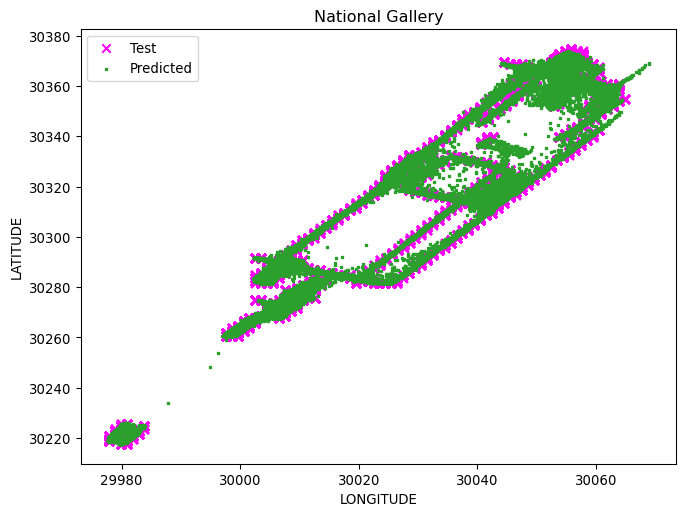

In [88]:
#Plot ground truth of test vs train labels
figure(figsize=(8, 6), dpi=96)
df = pd.read_csv("C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/csv_dataset/NG/csv_files/final_results/grouped_test_labels/pred_extendedGAN+.csv",header=0)
#df = df[df["FID"] == "floor-1"]
pred = df.iloc[:,2:4].values.tolist()
actual = df.iloc[:,4:6].values.tolist()
ndf = pd.read_csv("C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/csv_dataset/NG/csv_files/combined_train_modified_2m.csv",header=0)
ndf = ndf.iloc[:,-2:]
ndf = ndf[["NEW_LONG","NEW_LAT"]]
train_label = ndf.values.tolist()
# train_img_folder = "C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/image_dataset/NG/images/WGAN-GP+/localisation_img/floor-1/"
# _,train_label,_ = data_and_label(train_img_folder)


# train_lat = train_label[:,1].tolist()
# train_lon = train_label[:,0].tolist()
# test_lat = test_label[:,1].tolist()
# test_lon = test_label[:,0].tolist()
#plt.scatter(*zip(*train_label), s = 50, c ="blue", label="Train", marker = "o")
plt.scatter(*zip(*actual), s = 40, c = "magenta", label="Test", marker = "x")
plt.scatter(*zip(*pred), s = 1, c ="#2ca02c", label="Predicted", marker = ",")

plt.xlabel("LONGITUDE")
plt.ylabel("LATITUDE")
plt.title("National Gallery")
plt.legend()
plt.show()

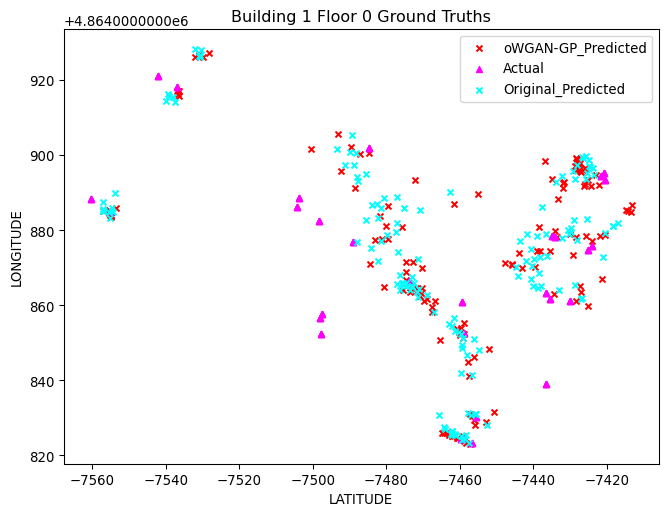

In [2]:
#Plot predicted vs actual
figure(figsize=(8, 6), dpi=96)
df = pd.read_csv("C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/csv_files/results/predicted/pred_ori-wgan.csv",header=0)
ndf = pd.read_csv("C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/csv_files/results/predicted/pred_original.csv",header=0)
ndf = ndf[ndf["FID"]=="b1f0"]
df = df[df["FID"] == "b1f0"]
ori_pred = ndf.iloc[:,2:4].values.tolist()
pred = df.iloc[:,2:4].values.tolist()
actual = df.iloc[:,4:6].values.tolist()
plt.scatter(*zip(*pred), s = 20, c ="red", label="oWGAN-GP_Predicted", marker = "x")
plt.scatter(*zip(*actual), s = 20, c = "magenta", label="Actual", marker = "^")
plt.scatter(*zip(*ori_pred), s = 20, c = "cyan", label="Original_Predicted", marker = "x")
#plt.plot(pred[0],actual[0], '.r-')
# train_lat = train_label[:,1].tolist()
# train_lon = train_label[:,0].tolist()
# test_lat = test_label[:,1].tolist()
# test_lon = test_label[:,0].tolist()
# plt.scatter(train_lat, train_lon, s = 10, c ="blue", label="Train")
# plt.scatter(test_lat, test_lon, s = 10, c = "red", label="Test")
plt.xlabel("LONGITUDE")
plt.ylabel("LATITUDE")
plt.title("Building 1 Floor 0 Ground Truths")
plt.legend()
plt.show()

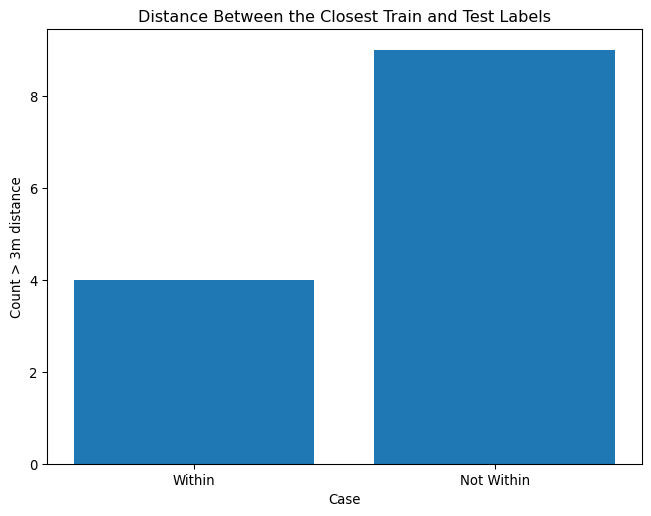

In [32]:
#Plot of Worst Case
df = pd.read_csv("C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/csv_files/results/analysis/b1f0_sb.csv",header=0)
#Count contains the number of predicted > avg error ED. If < 3, means it might be resnet training mistake
df = df[df["count"]>2]
y = [(df["min_ED"]<=3).values.sum(),(df["min_ED"]>3).values.sum()]
x = ['Within', 'Not Within']


figure(figsize=(8, 6), dpi=96)
plt.title("Distance Between the Closest Train and Test Labels")
plt.xlabel("Case")
plt.ylabel("Count > 3m distance")
plt.bar(x,y)
plt.show()


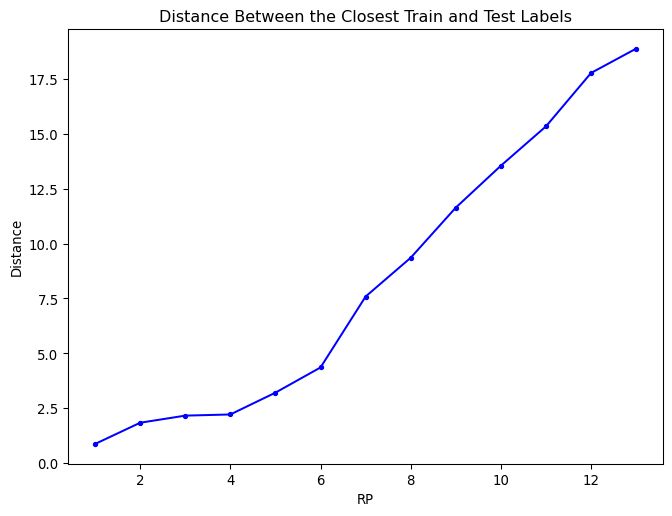

In [31]:
#Plot of Worst Case
df = pd.read_csv("C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/csv_files/results/analysis/b1f0_sb.csv",header=0)
#Count contains the number of predicted > avg error ED. If < 3, means it might be resnet training mistake
df = df[df["count"]>2]
df = df.sort_values(by=['min_ED'])
y = df["min_ED"].values.tolist()

figure(figsize=(8, 6), dpi=96)
plt.title("Distance Between the Closest Train and Test Labels")
plt.xlabel("RP")
plt.ylabel("Distance")
plt.plot(list(range(1,len(x)+1)),y, 'b.-')

plt.show()

# Comparing Images
### **1. From Pred vs Actual, find the min ADS, where Pred can use the coord with min ED
### **2. From Actual vs Train, find the min ADS. Compare results against step 1
### **3. If original better than oWGAN-GP, then find min ADS for both cases between it and test image


In [56]:
def ori_img(num_img, img_name, path):
    #plot image from saved folder
    for i in range(num_img):
        img = Image.open(path+img_name[i])
        plt.figure(figsize = (8,8), frameon=False)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])

In [175]:
bid = "b0f2"
odf = pd.read_csv("C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/csv_files/results/predicted/pred_original.csv",header=0)
wdf = pd.read_csv("C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/csv_files/results/predicted/pred_ori-wgan.csv",header=0)
save_path = "C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/csv_files/results/analysis/"+bid+".csv"
test_folder = 'C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/images/original/test/'+bid

odf = odf[odf["FID"] == bid]
wdf = wdf[wdf["FID"] == bid]
odf = odf.rename(columns={"PREDICTED_LONGITUDE":"OPRED_LONG", "PREDICTED_LATITUDE":"OPRED_LAT"})
wdf = wdf.rename(columns={"PREDICTED_LONGITUDE":"WPRED_LONG", "PREDICTED_LATITUDE":"WPRED_LAT"})
# test_loc = odf.iloc[:,2:4].values.tolist()
# test_loc2 = wdf.iloc[:,2:4].values.tolist()
# _,test_lb, _ = data_and_label(test_folder)
# test_lb = test_lb.tolist()
# for i in range(len(test_loc)):
#     kk = test_loc[i]
#     tloc=min(test_lb,key=lambda test_lb:(abs(test_lb[1]-kk[1]),abs(test_lb[0]-kk[0])))
#     odf.replace(test_loc[i][0],tloc[0])
#     odf.replace(test_loc[i][1],tloc[1])
#     kk = test_loc2[i]
#     tloc=min(test_lb,key=lambda test_lb:(abs(test_lb[1]-kk[1]),abs(test_lb[0]-kk[0])))
#     odf.replace(test_loc[i][0],tloc[0])
#     odf.replace(test_loc[i][1],tloc[1])
    

merge = pd.merge(left=odf,right=wdf,how = "left", left_on=["FID","TRAIN_NUM","ACTUAL_LATITUDE","ACTUAL_LONGITUDE"],right_on=["FID","TRAIN_NUM","ACTUAL_LATITUDE","ACTUAL_LONGITUDE"])
merge.to_csv("C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/csv_files/results/analysis/test.csv",index=False)
name = ['FID', 'TRAIN_NUM', 'ACTUAL_LONGITUDE', 'ACTUAL_LATITUDE','OPRED_LONG', 'OPRED_LAT', 'WPRED_LONG', 'WPRED_LAT']
merge = merge[name]

oED = []
wED = []
coord = merge.iloc[:,2:4].values.tolist()
opred = merge.iloc[:,4:6].values.tolist()
wpred = merge.iloc[:,6:8].values.tolist()
for i in range(len(merge)):
    oED.append(np.linalg.norm(np.array(coord[i]) - np.array(opred[i])))
    wED.append(np.linalg.norm(np.array(coord[i]) - np.array(wpred[i])))
merge["OED"] = oED
merge["WED"] = wED

otrain = 'C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/images/original/train/'+bid
_,olb, _ = data_and_label(otrain)
selected_o = []
selected_w = []

for p in range(len(merge)):
    min_diff= 200
    for i in range(len(olb)):
        diff = np.linalg.norm(olb[i] - np.array(opred[p]))
        if diff < min_diff:
            min_diff = diff
            selected = olb[i].tolist()
    selected_o.append(selected)
    
    min_diff = 200
    for i in range(len(olb)):
        diff = np.linalg.norm(olb[i] - np.array(opred[p]))
        if diff < min_diff:
            min_diff = diff
            selected = olb[i].tolist()
    selected_w.append(selected)

merge[["SOPRED_LONG","SOPRED_LAT"]] = pd.DataFrame(selected_o)
merge[["SWPRED_LONG","SWPRED_LAT"]] = pd.DataFrame(selected_w)

test_folder = 'C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/images/original/test/'+bid
test_loc = merge.iloc[:,2:4].values.tolist()
o_loc = merge.iloc[:,10:12].values.tolist()
w_loc = merge.iloc[:,12:14].values.tolist()
_,test_lb, _ = data_and_label(test_folder)
test_lb = test_lb.tolist()

ADS_ori = []
ADS_wgan = []
for i in range(len(test_loc)):
    kk = test_loc[i]
    tloc=min(test_lb,key=lambda test_lb:(abs(test_lb[1]-kk[1]),abs(test_lb[0]-kk[0])))
    t= str(tloc[0])+"_"+str(tloc[1])
    loc1 = o_loc[i]
    loc1 = str(loc1[0])+"_"+str(loc1[1])
    loc2 = w_loc[i]
    loc2 = str(loc2[0])+"_"+str(loc2[1])

    test = 'C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/images/original/test/'+bid+'/'+t
    ori = 'C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/images/original/train/'+bid+'/'+loc1
    wgan = 'C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/images/ori_wgan/150/'+bid+'/'+loc2

    diff_wgan = abs_diff_gen(test, wgan, 23)
    diff_ori = abs_diff_gen(test, ori, 23)
    ADS_ori.append(statistics.mean(diff_ori['abs_score']))
    ADS_wgan.append(statistics.mean(diff_wgan['abs_score']))

merge["MIN_ADS_ORI"] = ADS_ori
merge["MIN_ADS_WGAN"] = ADS_wgan
name = ['FID', 'TRAIN_NUM', 'ACTUAL_LONGITUDE', 'ACTUAL_LATITUDE','OPRED_LONG', 'OPRED_LAT', 'WPRED_LONG', 'WPRED_LAT', 
        'SOPRED_LONG','SOPRED_LAT','SWPRED_LONG','SWPRED_LAT', 'OED', 'WED', 'MIN_ADS_ORI', 'MIN_ADS_WGAN']
merge = merge[name]
merge.to_csv(save_path, index=False)
print(merge)

       FID  TRAIN_NUM  ACTUAL_LONGITUDE  ACTUAL_LATITUDE   OPRED_LONG  \
0     b0f2          0      -7587.435972     4.864986e+06 -7589.072386   
1     b0f2          0      -7587.539084     4.864987e+06 -7589.964796   
2     b0f2          0      -7587.788900     4.864987e+06 -7588.846129   
3     b0f2          0      -7587.865767     4.864987e+06 -7588.488257   
4     b0f2          0      -7588.600912     4.864985e+06 -7590.582609   
...    ...        ...               ...              ...          ...   
1225  b0f2          4      -7673.435291     4.864935e+06 -7673.065352   
1226  b0f2          4      -7673.913439     4.864934e+06 -7676.682124   
1227  b0f2          4      -7674.785282     4.864934e+06 -7671.981650   
1228  b0f2          4      -7676.523280     4.864933e+06 -7678.727439   
1229  b0f2          4      -7676.617488     4.864934e+06 -7676.371664   

         OPRED_LAT   WPRED_LONG     WPRED_LAT  SOPRED_LONG    SOPRED_LAT  \
0     4.864985e+06 -7589.952597  4.864985e+06  

In [176]:
unique_loc = merge.groupby(["ACTUAL_LONGITUDE", "ACTUAL_LATITUDE"]).size().reset_index().rename(columns={0: 'count'})
unique = unique_loc.iloc[:,:2].values.tolist()
new_df = []
for i in range(len(unique)):
    df = merge[(merge["ACTUAL_LONGITUDE"] == unique[i][0]) & (merge["ACTUAL_LATITUDE"] == unique[i][1])]
    new_df.append([unique[i][0], unique[i][1], df["OED"].mean(),
                   df["WED"].mean(),df["MIN_ADS_ORI"].mean(),df["MIN_ADS_WGAN"].mean()])
ndf = pd.DataFrame(new_df, columns = ['ACTUAL_LONGITUDE','ACTUAL_LATITUDE','OED', 'WED', 'ADS_ORI','ADS_WGAN'])
ndf.to_csv("C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/csv_files/results/analysis/b0f2_overall.csv",index=False)

In [184]:
quality = []
ads = []
good =0
ndf = pd.read_csv("C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/csv_files/results/analysis/b0f2_overall.csv", header=0)
for i in range(len(ndf)):
    if ndf.iloc[i,2] < ndf.iloc[i,3]:
        quality.append(0)
    else:
        quality.append(1)
    
    if ndf.iloc[i,4] < ndf.iloc[i,5]:
        ads.append(0)
    else:
        ads.append(1)
        
    if (ndf.iloc[i,2] < ndf.iloc[i,3]) and (ndf.iloc[i,4] < ndf.iloc[i,5]):
        good+=1
print(quality.count(0),quality.count(1))
print(ads.count(0),ads.count(1))
print(good)

55 85
88 52
34


In [135]:
ori = 'C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/images/ori_wgan/150/b1f0'
pred_csv = 'C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/csv_files/results/predicted/pred_ori-wgan.csv'
csv_save_path = 'C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/csv_files/results/analysis/pred_b1f0.csv'
test_folder = 'C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/images/original/test/b1f0'
_,train,_ = data_and_label(ori)
df = pd.read_csv(pred_csv, header=0)
df = df[df["FID"]=="b1f0"]
pred = df.iloc[:,2:4].values.tolist()
test = df.iloc[:,4:6].values.tolist()
test_only = np.unique(np.array(test), axis=0)

test_train_dict = {}
for t in range(len(test_only)):
    min_diff = 200
    for k in range(len(train)):
        diff = np.linalg.norm(train[k] - test_only[t])
        if diff < min_diff:
            min_diff = diff
            min_coord = train[k].tolist()
            min_coord.append(min_diff)
        test_train_dict[tuple(test_only[t].tolist())] = min_coord


In [118]:
store = []
for p in range(len(pred)):
    label = os.listdir(ori)
    coord = []
    min_coord = []
    min_diff = 200
    for k in label:
        coord.append(k.split("_"))

    coord = [[float(s) for s in co] for co in coord]

    for i in range(len(coord)):
        diff = np.linalg.norm(np.array(coord[i]) - np.array(pred[p]))
        if diff < min_diff:
            min_diff = diff
            selected_coord = coord[i]
    min_coord.extend(test[p])
    min_coord.extend(test_train_dict[tuple(test[p])][:2])
    min_coord.extend(selected_coord)
    min_coord.extend(pred[p])
    min_coord.append(test_train_dict[tuple(test[p])][2])
    min_coord.append(min_diff)
    min_coord.append(np.linalg.norm(np.array(test[p])-np.array(selected_coord))) 
    min_coord.append(np.linalg.norm(np.array(test[p])-np.array(pred[p])))
    store.append(min_coord)
    
ndf = pd.DataFrame(store,columns = ['TEST_LON','TEST_LAT','TRAIN_LON','TRAIN_LAT','SELECTED_LON','SELECTED_LAT','PRED_LON','PRED_LAT','TT_ED','PS_ED','TS_ED', 'TP_ED'])
ndf.to_csv(csv_save_path, index=False)

[4.501398, 5.7460914, 4.1522284, 3.567315, 7.2240047, 5.4296765, 10.138079, 8.438652, 8.549215, 29.96077, 10.210339, 27.699295, 29.978958, 22.20977, 26.535673, 22.48766, 24.621433, 7.1331873, 11.9780445, 15.76952, 7.5798883, 6.9873486, 7.7420454, 17.87172, 18.421923, 7.486437, 2.0909114, 4.829632, 7.254755, 3.7450087, 2.573271, 6.7253695, 4.1522284, 3.9688115, 4.3868, 11.88908, 5.332086, 8.438652, 8.549215, 48.88158, 10.796659, 24.818897, 28.681084, 41.849136, 28.637041, 22.48766, 24.621433, 7.1331873, 11.9780445, 7.952226, 6.7078466, 5.834206, 7.4624467, 9.086379, 18.421923, 10.200268, 2.0909114, 4.829632, 7.254755, 3.7450087, 4.501398, 4.529568, 4.454595, 6.3136187, 7.2240047, 11.88908, 10.138079, 8.438652, 4.7132697, 29.96077, 12.995228, 27.699295, 29.978958, 22.20977, 26.535673, 22.48766, 24.621433, 7.1331873, 11.9780445, 15.76952, 7.5798883, 6.9873486, 7.7420454, 17.87172, 15.377274, 16.736183, 2.0909114, 4.829632, 7.254755, 3.7450087, 2.823166, 5.180018, 4.454595, 3.567315, 4.497

In [119]:
#Find Test and selected labels image diff ADS
test_folder = 'C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/images/original/test/b1f0'
test_loc = merge.iloc[:,2:4].values.tolist()
selected_loc = df.iloc[:,4:6
_,test_lb, _ = data_and_label(test_folder)
test_lb = test_lb.tolist()

ADS_ori = []
ADS_wgan = []
for i in range(len(test_loc)):
    kk = test_loc[i]
    tloc=min(test_lb,key=lambda test_lb:(abs(test_lb[1]-kk[1]),abs(test_lb[0]-kk[0])))

    t= str(tloc[0])+"_"+str(tloc[1])
    loc1 = selected_loc[i]
    loc1 = str(loc1[0])+"_"+str(loc1[1])

# loc1 = "-7423.060899998993_4864877.686099999"

    test = 'C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/images/original/test/b2f1/'+t
    act1 = 'C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/images/ori_wgan/150/b2f1/'+loc1
    ori1 = 'C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/images/original/train/b2f1/'+loc1

    diff_wgan1 = abs_diff_gen(test, act1, 23)
    diff_ori1 = abs_diff_gen(test, ori1, 23)
    ADS_ori.append(statistics.mean(diff_ori1['abs_score']))
    ADS_wgan.append(statistics.mean(diff_wgan1['abs_score']))
df["AVG_ADS_ORI"] = ADS_ori
df["AVG_ADS_WGAN"] = ADS_wgan
df.to_csv(csv_file,index=False)
    #print("Location: {}, wgan images: {}, ori images: {}".format(loc1,statistics.mean(diff_wgan1['abs_score']),statistics.mean(diff_ori1['abs_score'])))

In [120]:
csv_file = 'C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/csv_files/results/analysis/pred_b2f1.csv'
df = pd.read_csv(csv_file, header=0)
ori_ads = df["AVG_ADS_ORI"].values.tolist()
wgan_ads = df["AVG_ADS_WGAN"].values.tolist()
quality = []
for i in range(len(df)):
    if ori_ads[i] < wgan_ads[i]:
        quality.append(0)
    else:
        quality.append(1)
df["QUALITY"] = quality
df.to_csv(csv_file,index=False)
print(quality.count(0), quality.count(1))

351 164


In [121]:
df = pd.read_csv("C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/csv_files/results/predicted/pred_original.csv")
df = df[df["FID"] == "b2f4"]
act = df.iloc[:,4:6].values.tolist()
pred = df.iloc[:,2:4].values.tolist()
diff_list = []
for i in range(len(df)):
    diff = np.linalg.norm(np.array(act[i])-np.array(pred[i]))
    diff_list.append(diff)
df["ED"] = diff_list
df.to_csv("C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/csv_files/results/analysis/pred_ori_b2f4.csv", index=False)

In [122]:
#Diff between test image and should be
test_loc = "-7436.557598417916_4864863.331913874"
loc = "-7435.137299999595_4864861.710100003"
test = 'C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/images/original/test/b1f0/'+test_loc
act = 'C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/images/ori_wgan/150/b1f0/'+loc
ori = 'C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/images/original/train/b1f0/'+loc
diff_wgan = abs_diff_gen(test, act, 23)
diff_ori = abs_diff_gen(test, ori, 23)
print("Test location: {}".format(test_loc))
print("Comparing test location image against the smallest distance calculated by label...")
print("Location:{}, wgan images: {}, ori images: {}".format(loc,statistics.mean(diff_wgan['abs_score']),statistics.mean(diff_ori['abs_score'])))

Test location: -7436.557598417916_4864863.331913874
Comparing test location image against the smallest distance calculated by label...
Location:-7435.137299999595_4864861.710100003, wgan images: 16.730846405029297, ori images: 14.68912410736084


In [151]:
#Seperate wgan images from original
lb = "-7423.060899998993_4864877.686099999"
input_dir = "C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/images/ori_wgan/150/b1f0/"+lb+"/"
output_dir = "C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/images/ori_wgan/wgan_only/b1f0/"+lb+"/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
for file in os.listdir(input_dir):
    if 'wgan_' in file.lower():
        shutil.copy(input_dir+file, output_dir+file)

In [152]:
#Diff between test image and original only vs test image and wgan only
test_loc = "-7436.557598417916_4864863.331913874"
loc = "-7423.060899998993_4864877.686099999"
test = 'C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/images/original/test/b1f0/'+test_loc
wgan = 'C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/images/ori_wgan/wgan_only/b1f0/'+loc
ori = 'C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/images/original/train/b1f0/'+loc
diff_wgan = abs_diff_gen(test, wgan, 23)
diff_ori = abs_diff_gen(test, ori, 23)
print("Test location: {}".format(test_loc))
print("Comparing test location image against the smallest distance calculated by label...")
print("Location:{}, wgan images: {}, ori images: {}".format(loc,statistics.mean(diff_wgan['abs_score']),statistics.mean(diff_ori['abs_score'])))

Test location: -7436.557598417916_4864863.331913874
Comparing test location image against the smallest distance calculated by label...
Location:-7423.060899998993_4864877.686099999, wgan images: 9.349197387695312, ori images: 8.107190132141113


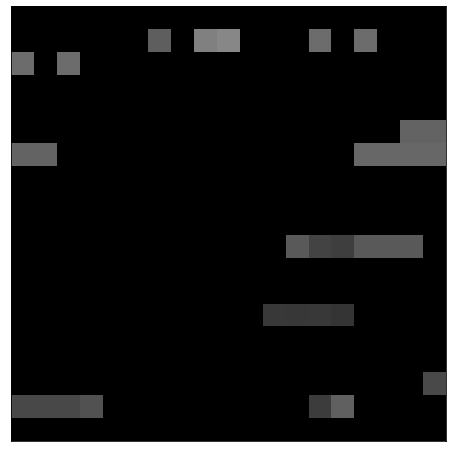

In [61]:
#Test image
data_dir = 'C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/image_dataset/NG/images/WGAN-GP+/localisation_img/floor1/29977.85401466902_30218.80531042993/'
d = os.listdir(data_dir)
ori_img(1,d, data_dir)

C:\Users\noxtu\AppData\Local\Temp/ipykernel_3304/1226359348.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (8,8), frameon=False)


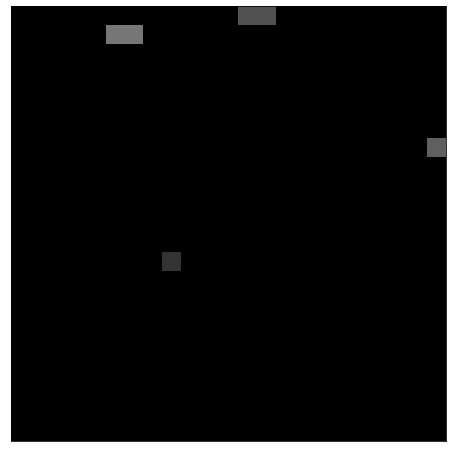

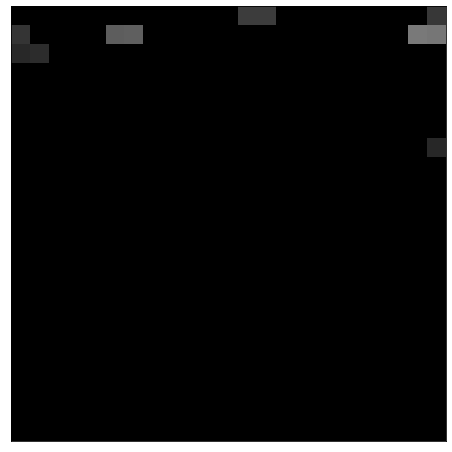

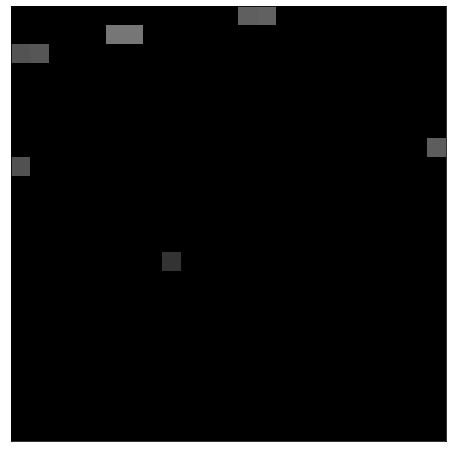

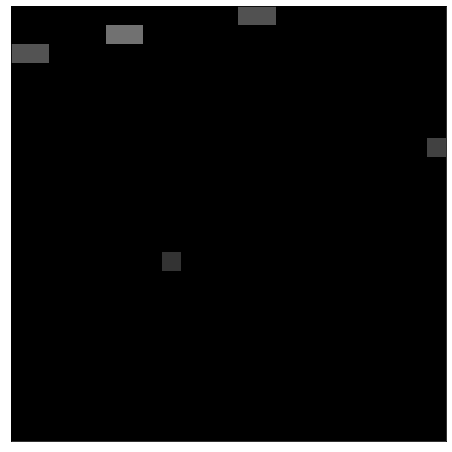

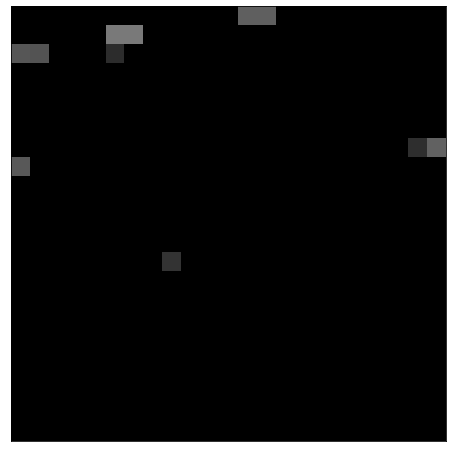

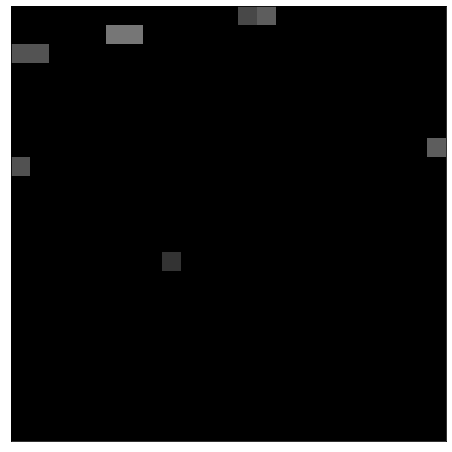

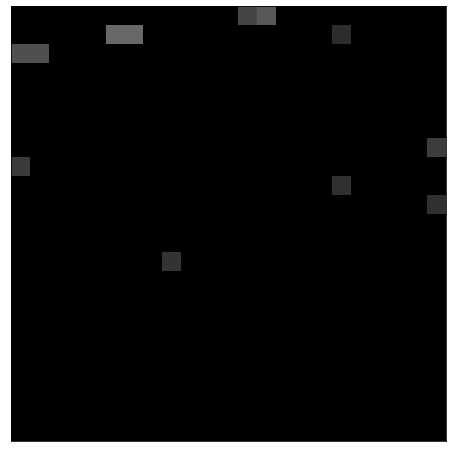

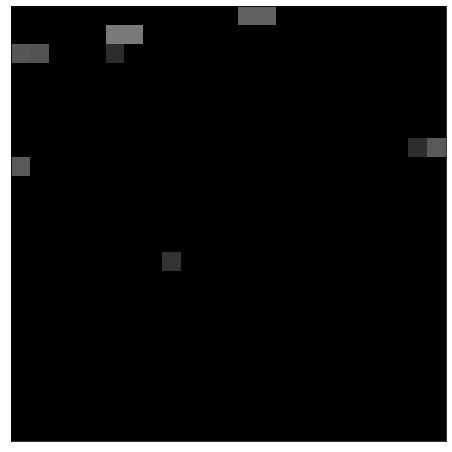

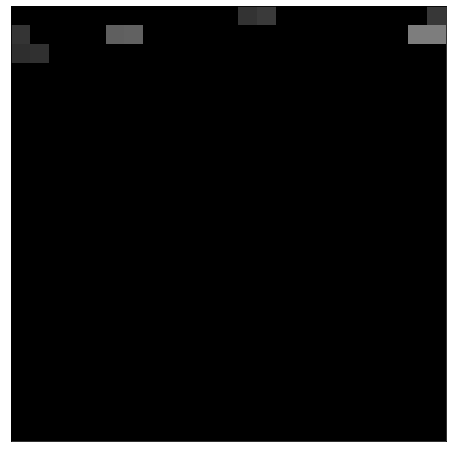

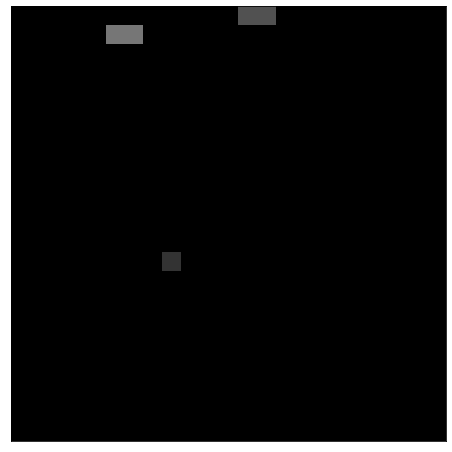

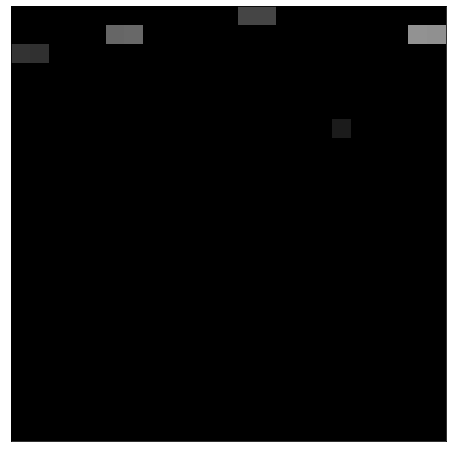

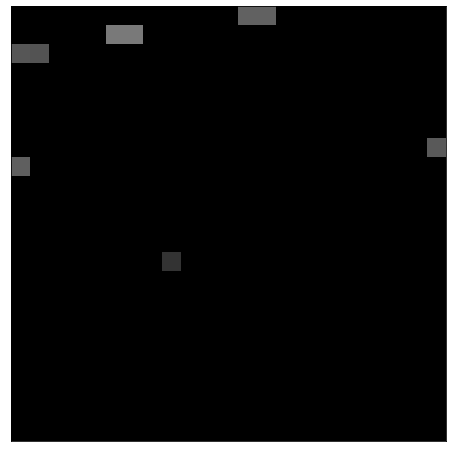

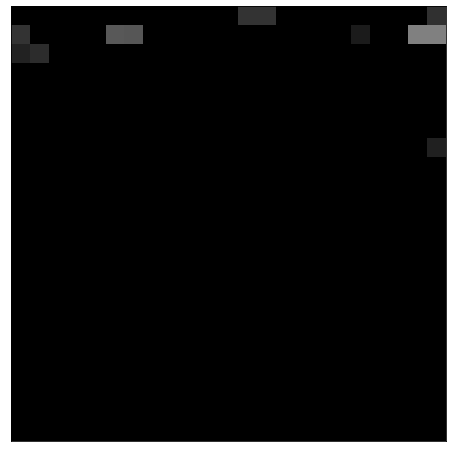

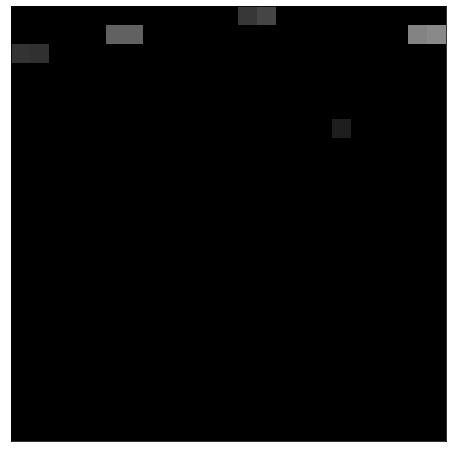

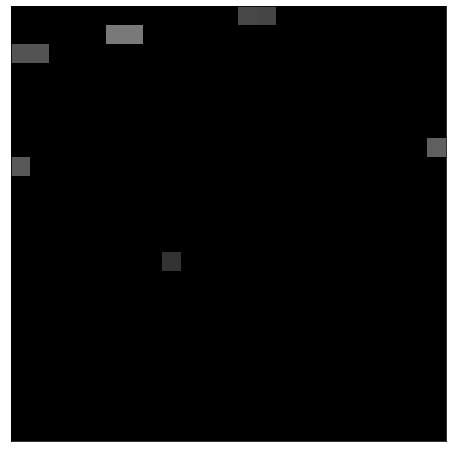

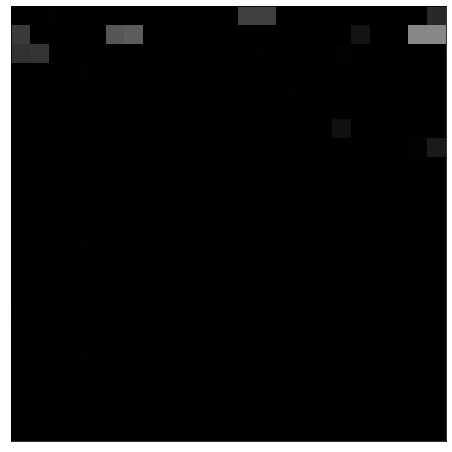

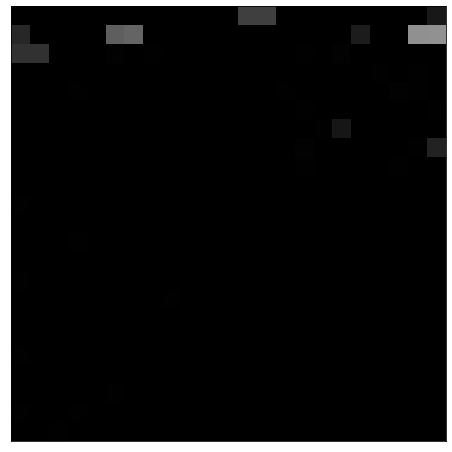

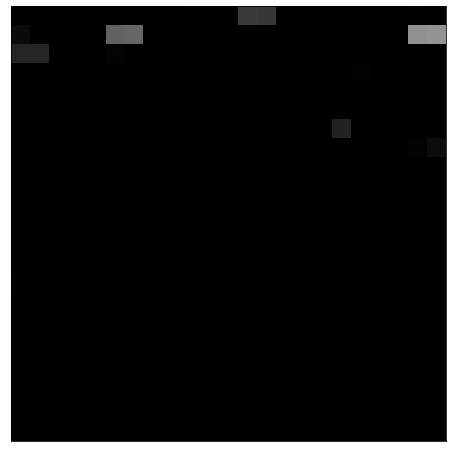

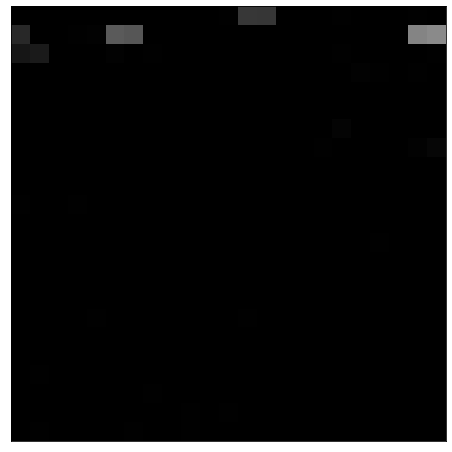

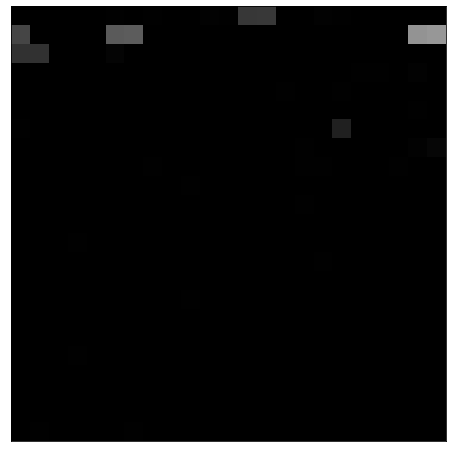

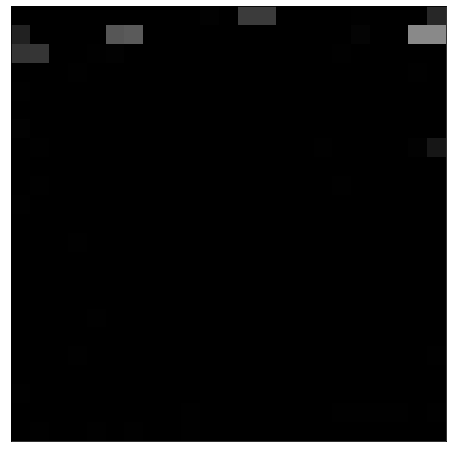

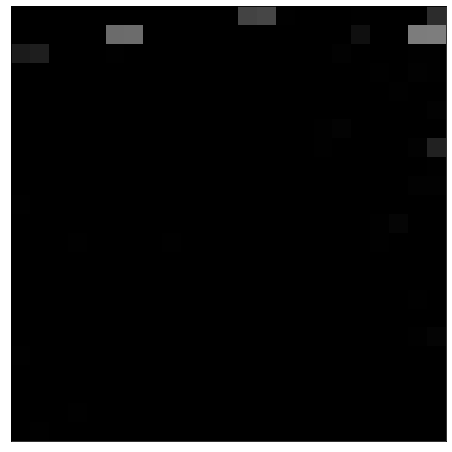

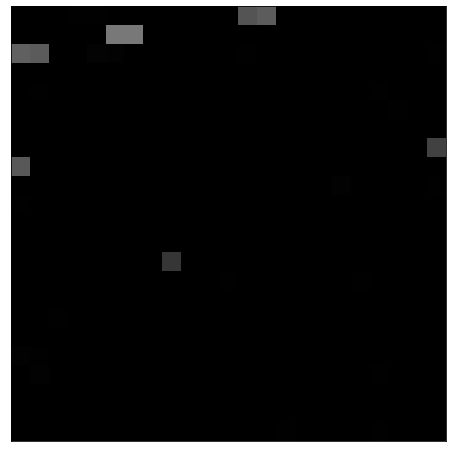

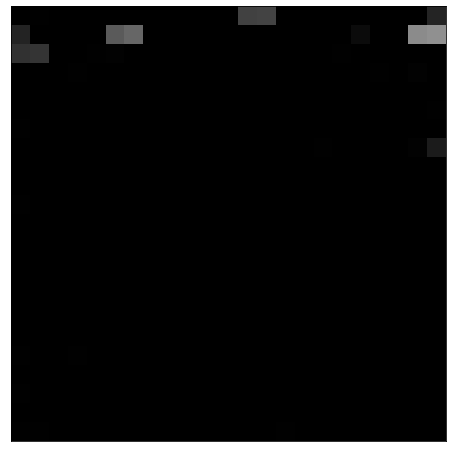

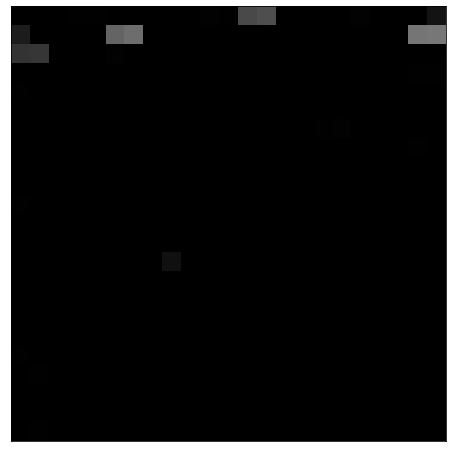

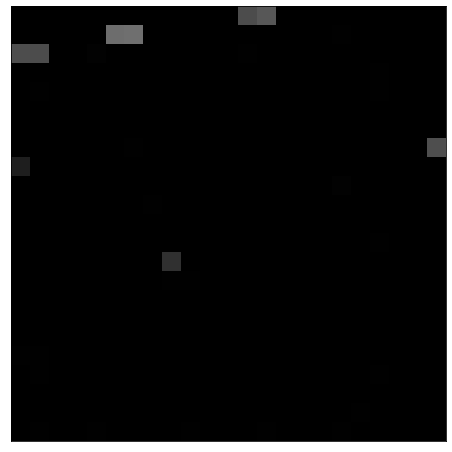

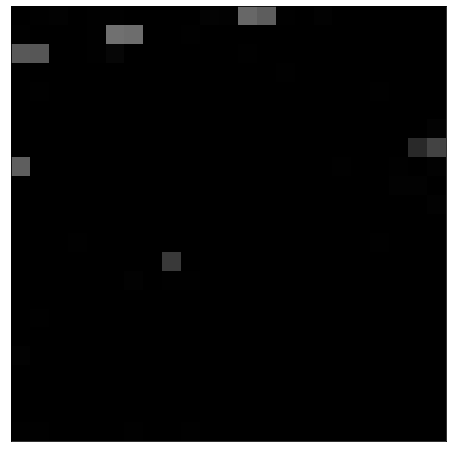

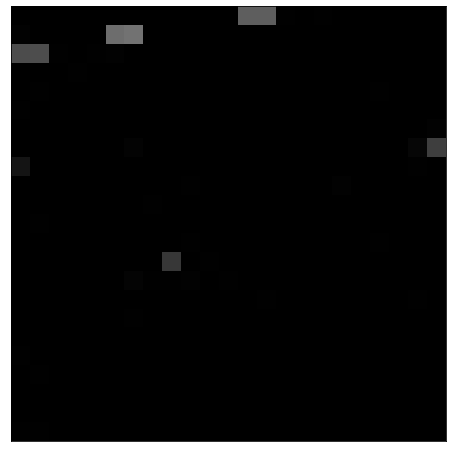

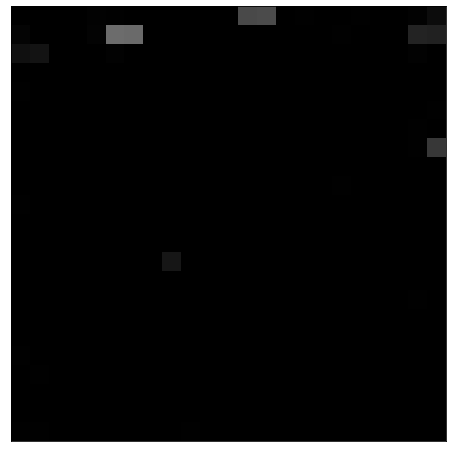

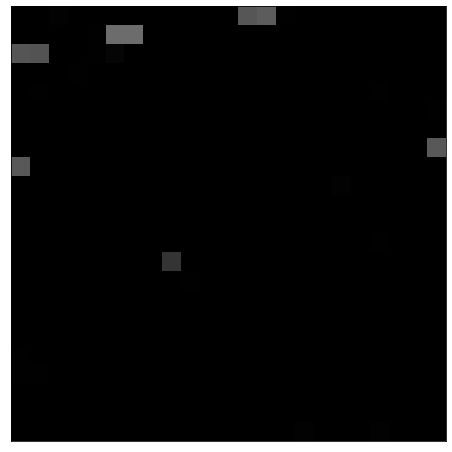

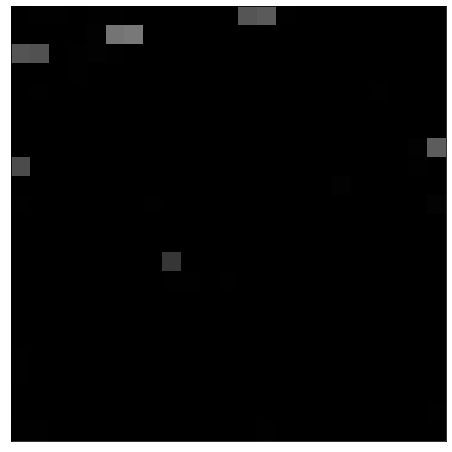

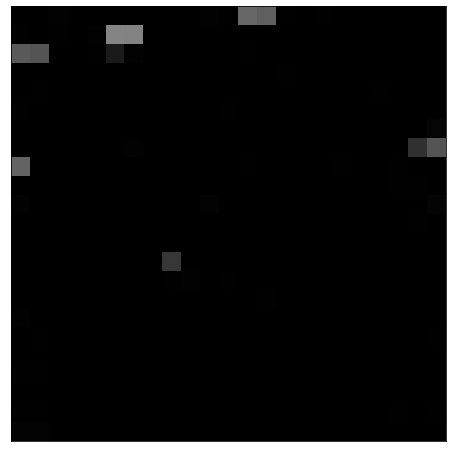

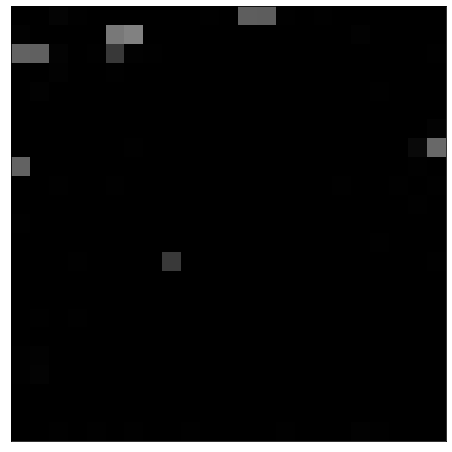

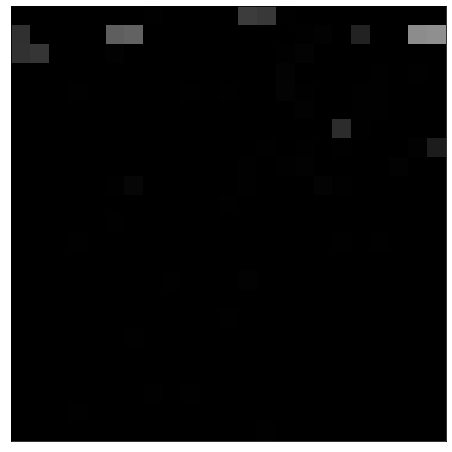

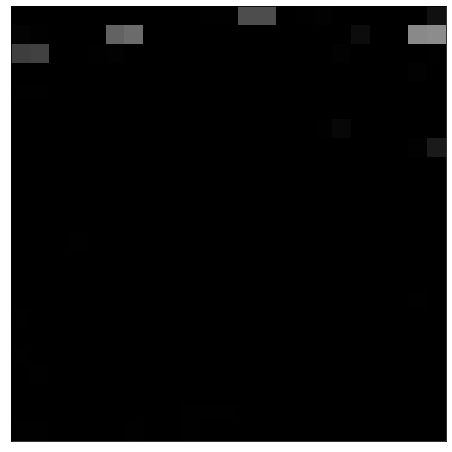

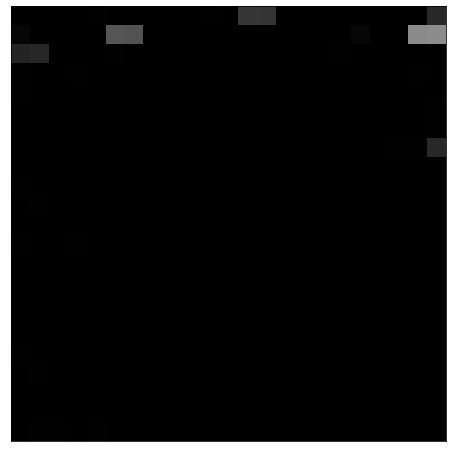

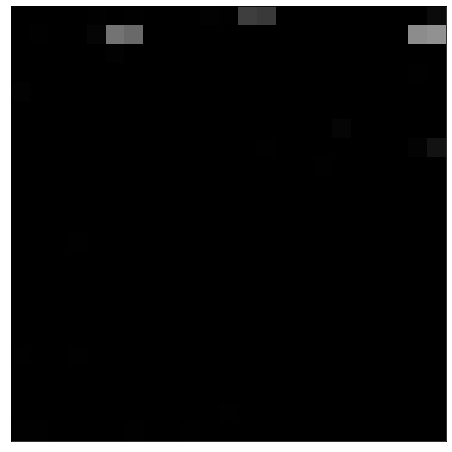

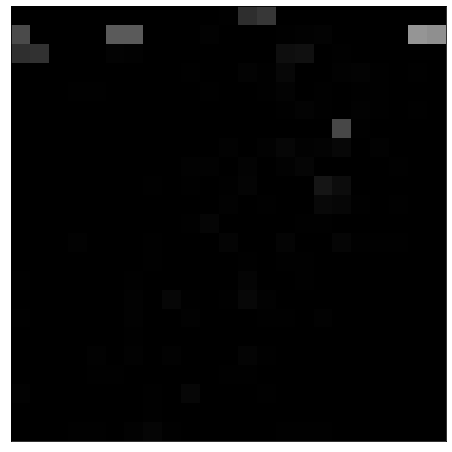

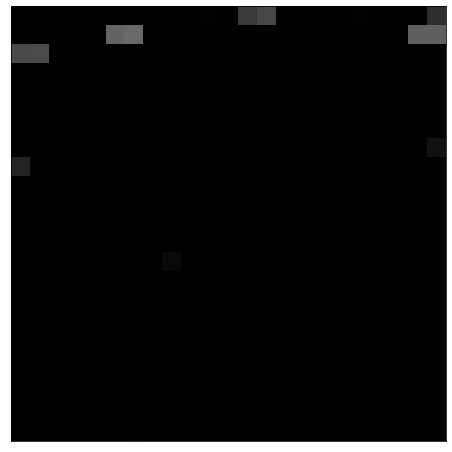

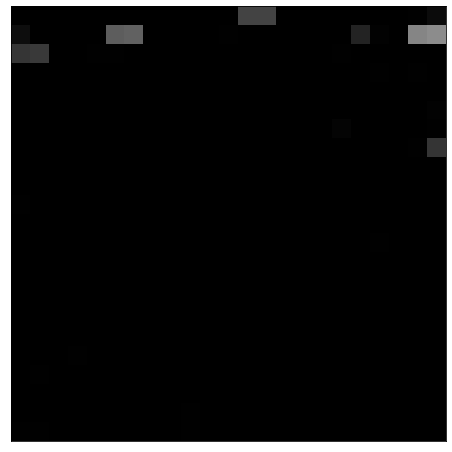

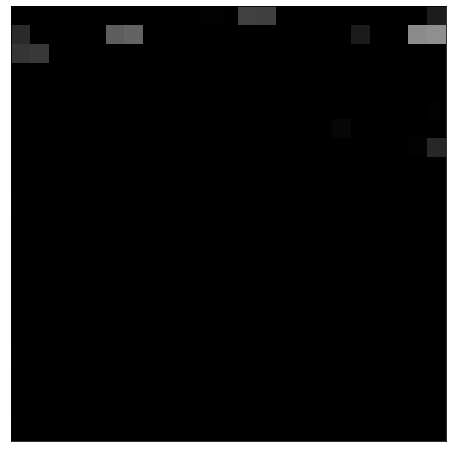

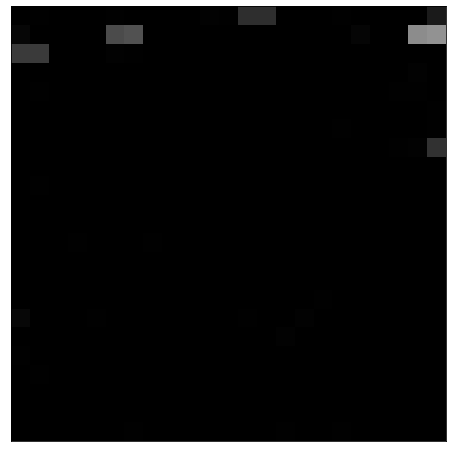

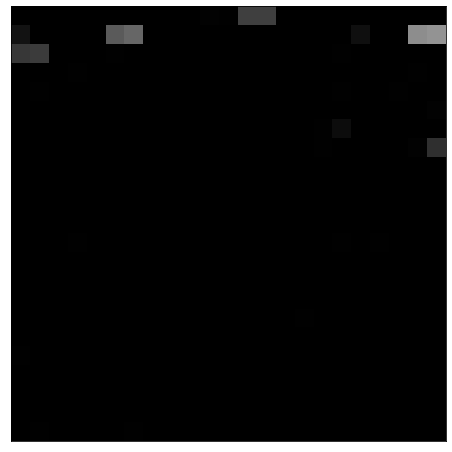

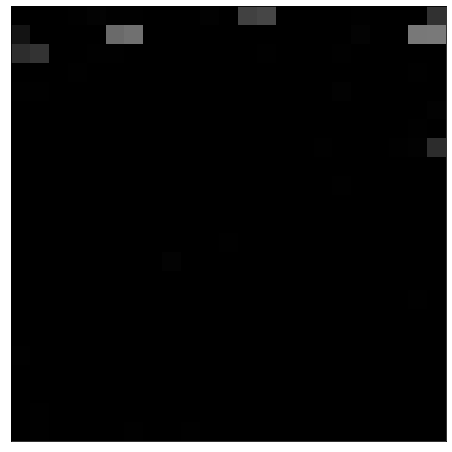

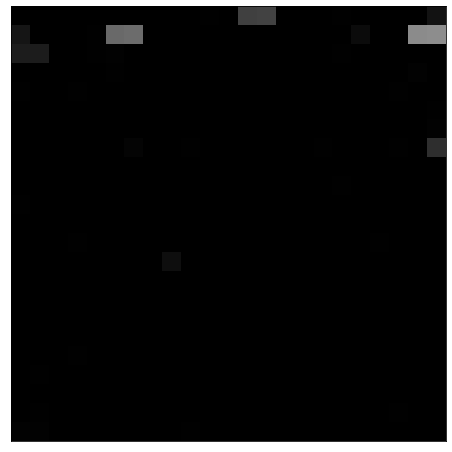

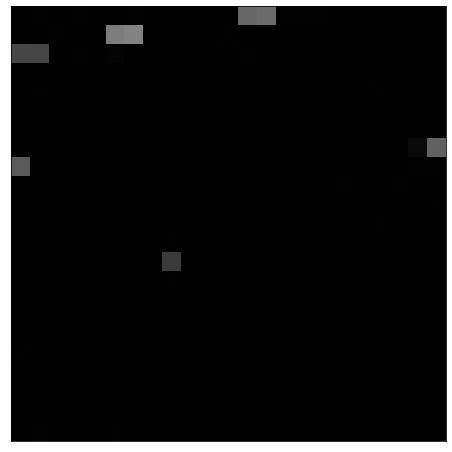

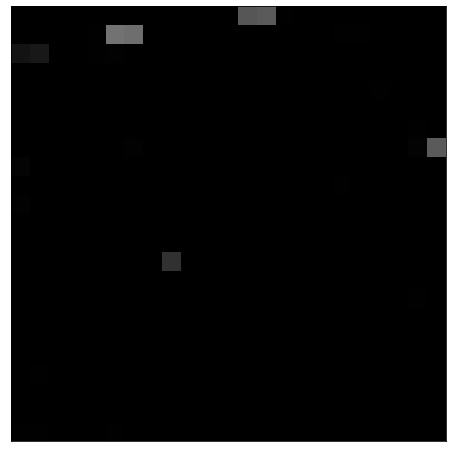

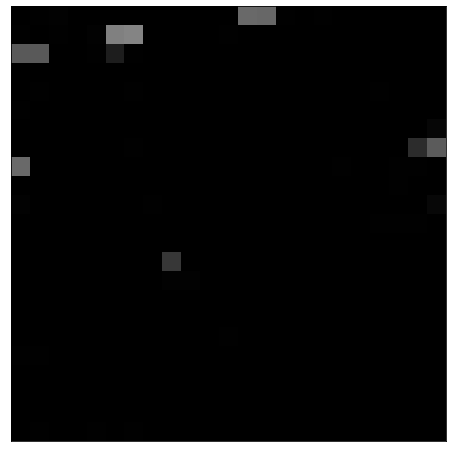

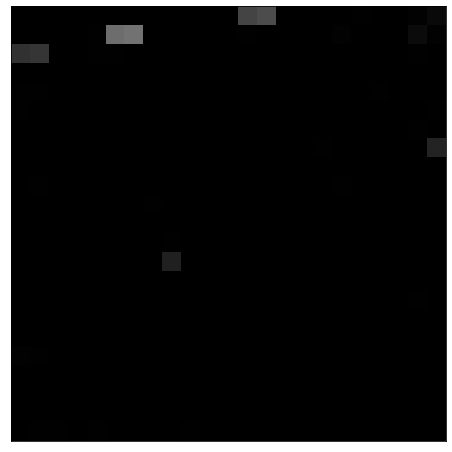

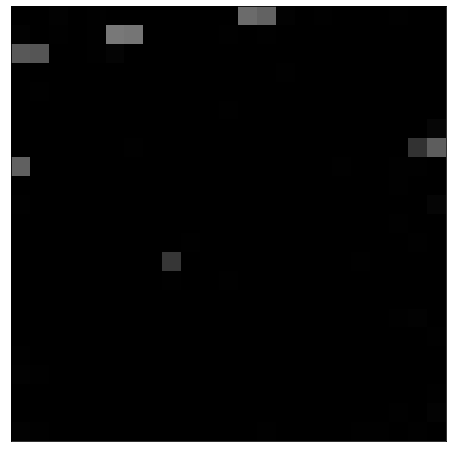

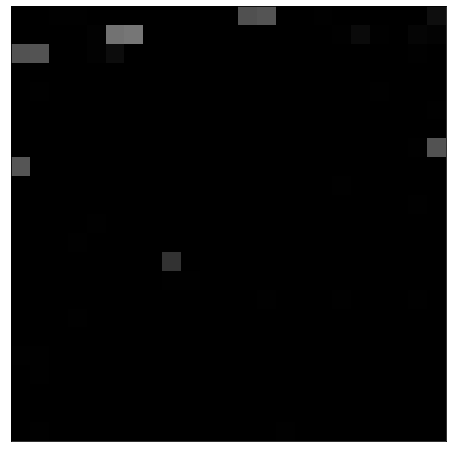

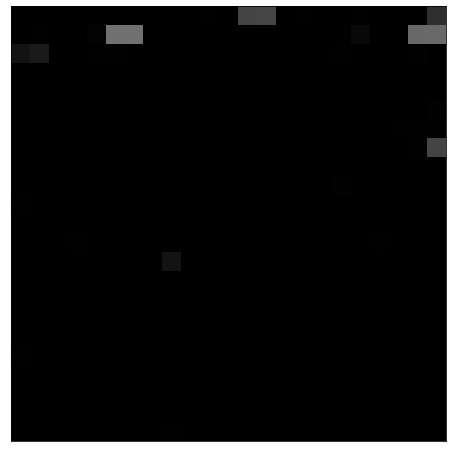

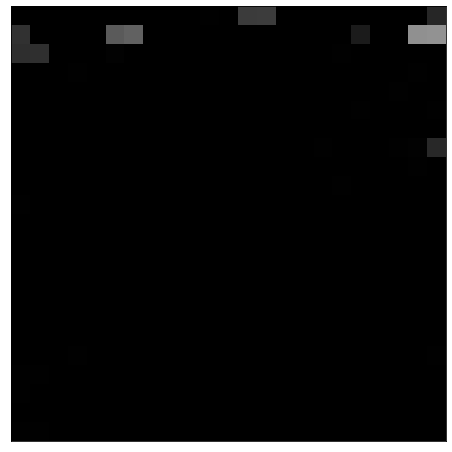

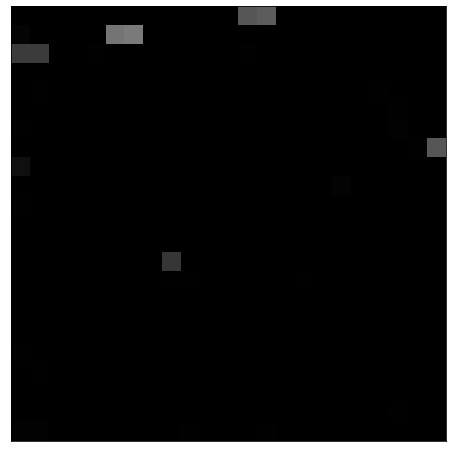

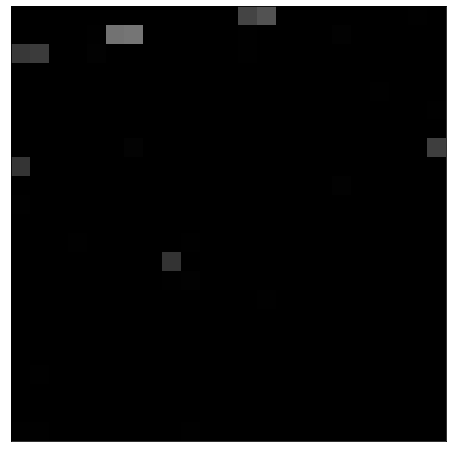

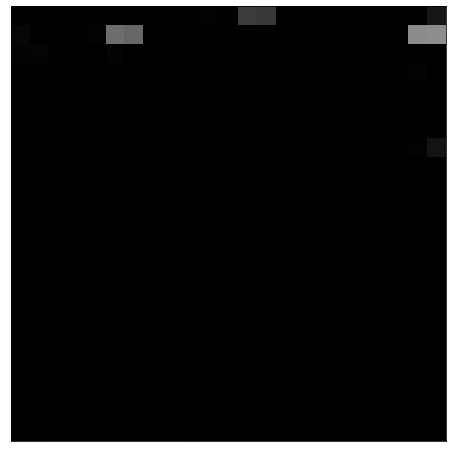

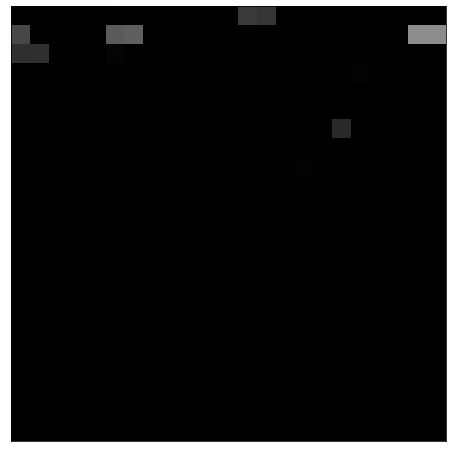

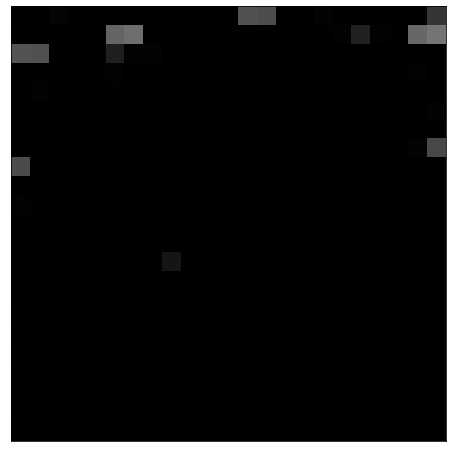

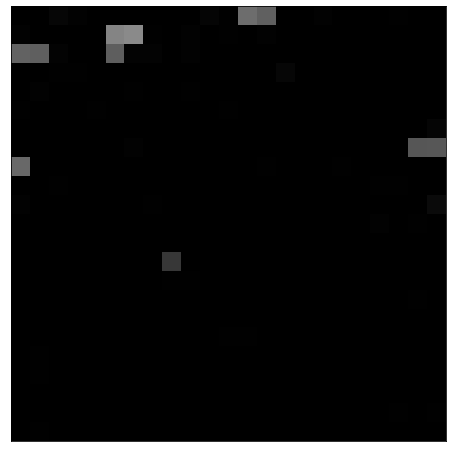

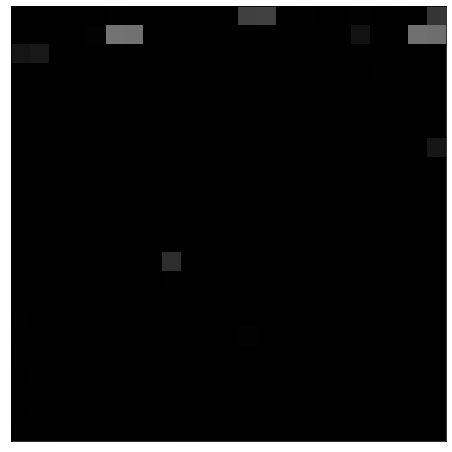

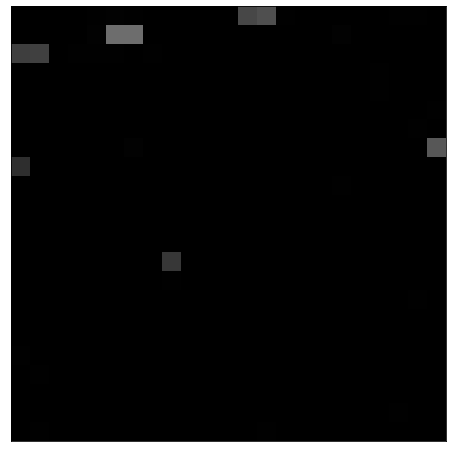

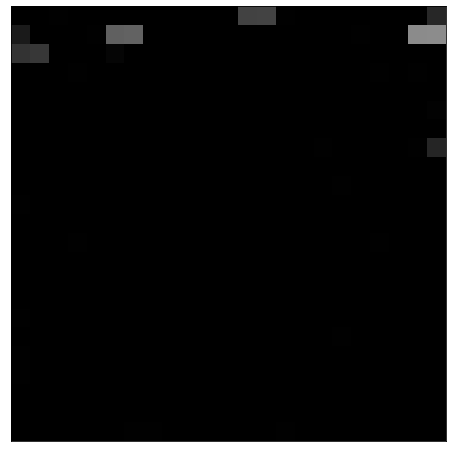

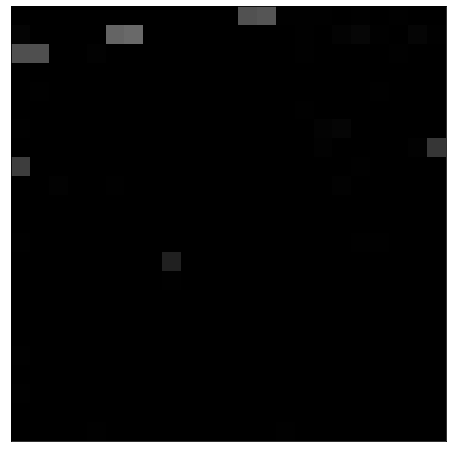

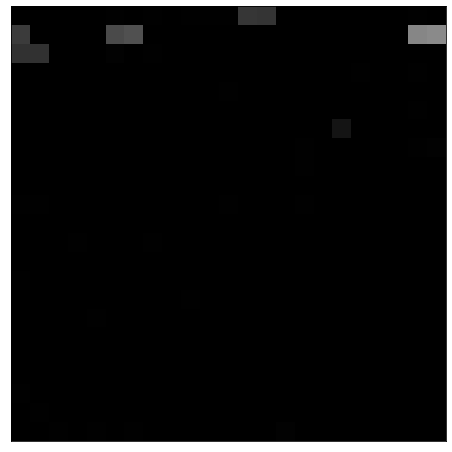

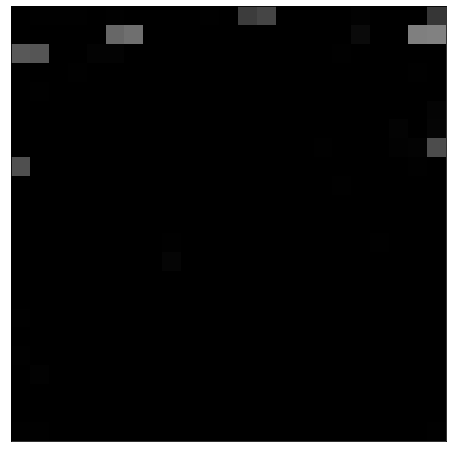

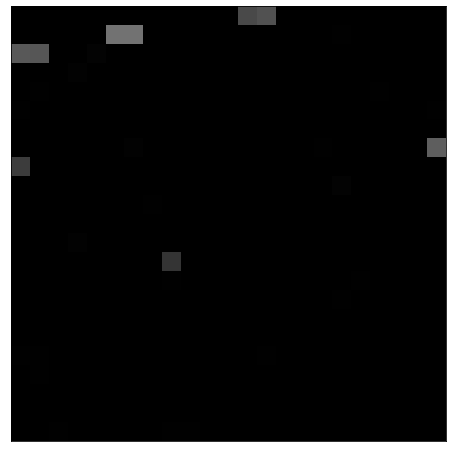

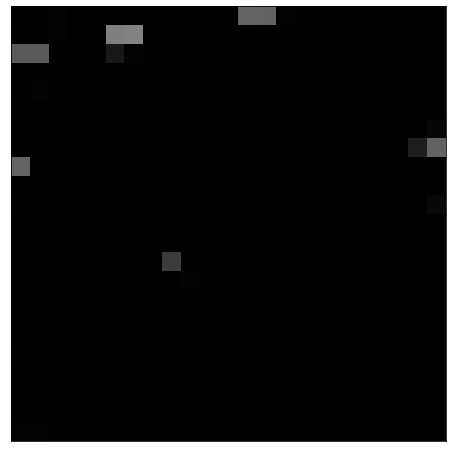

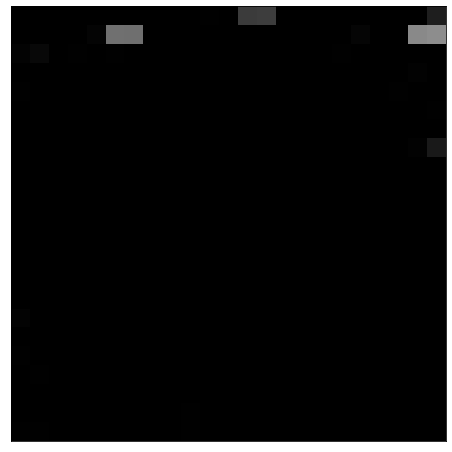

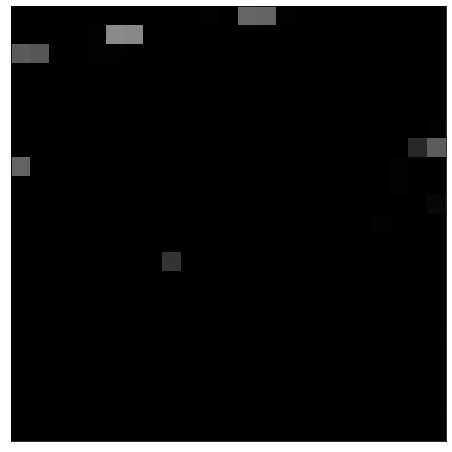

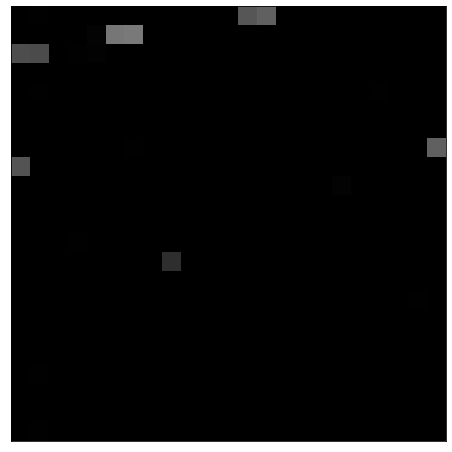

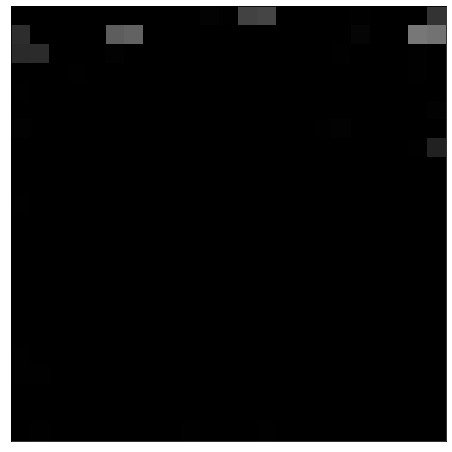

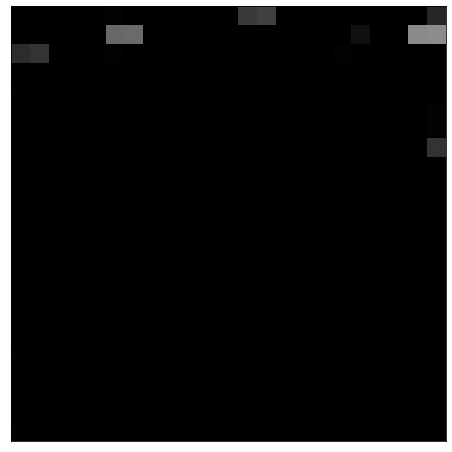

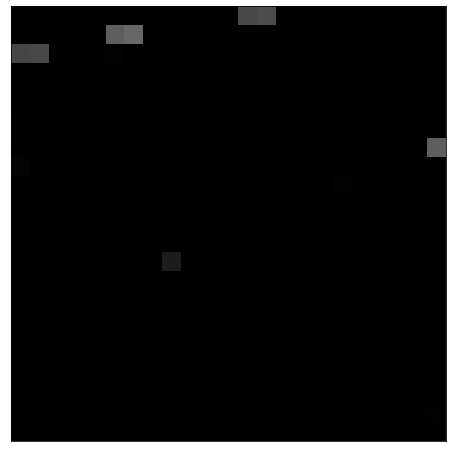

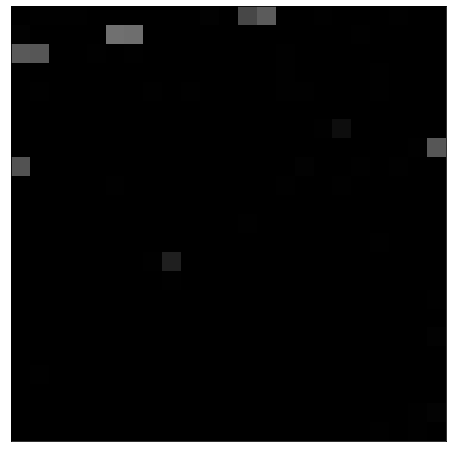

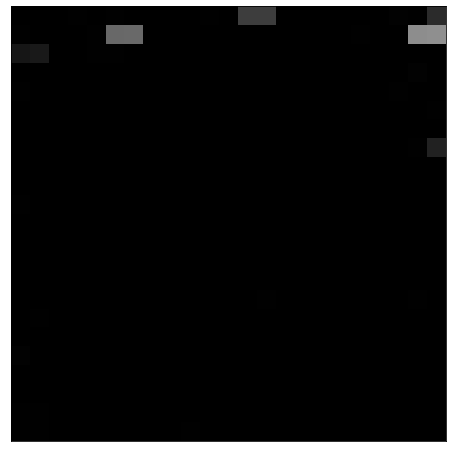

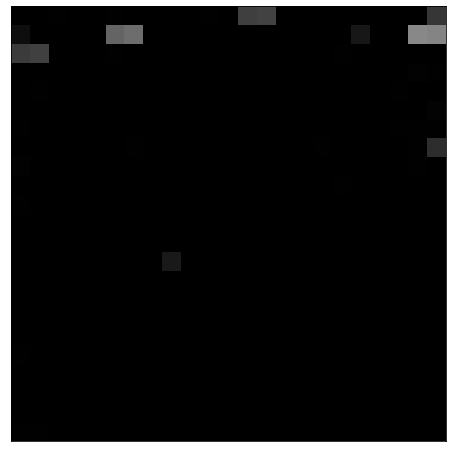

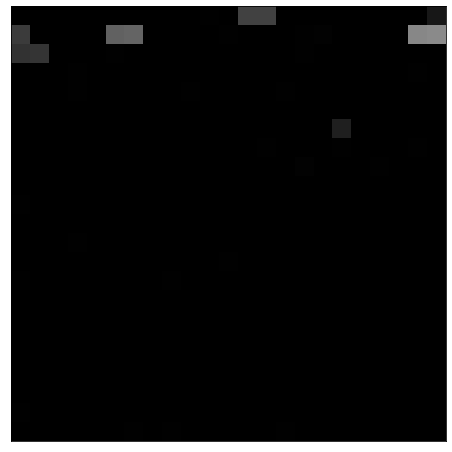

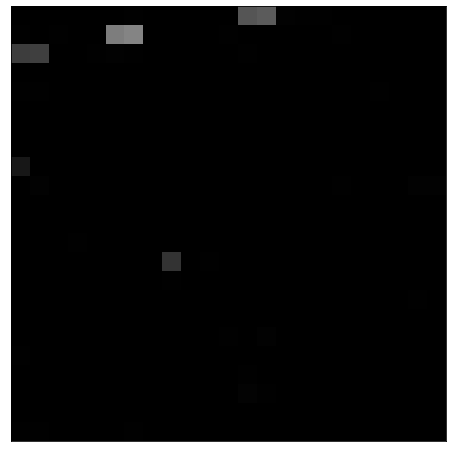

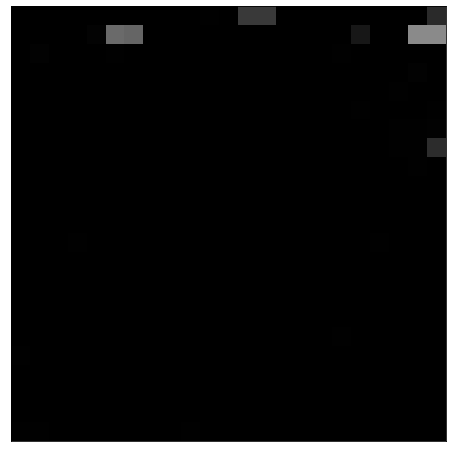

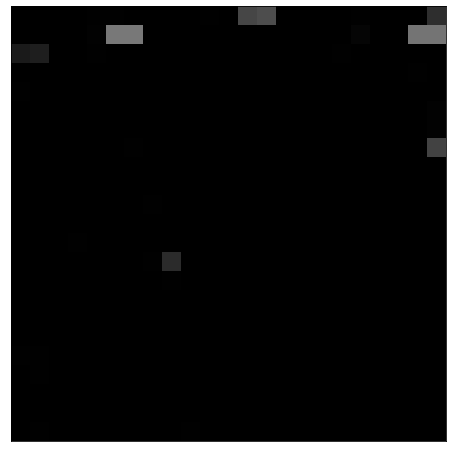

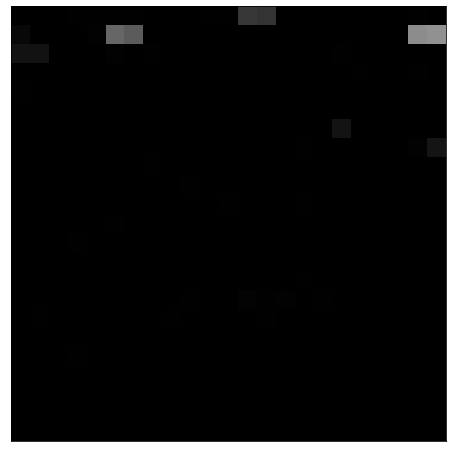

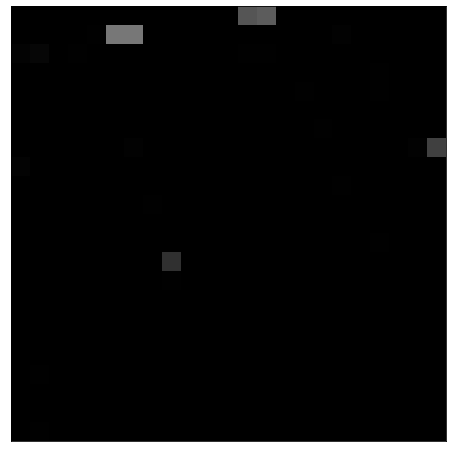

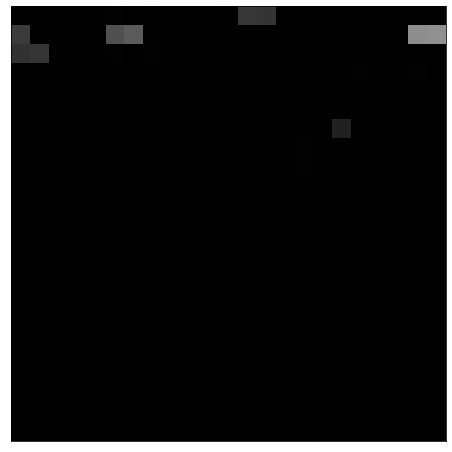

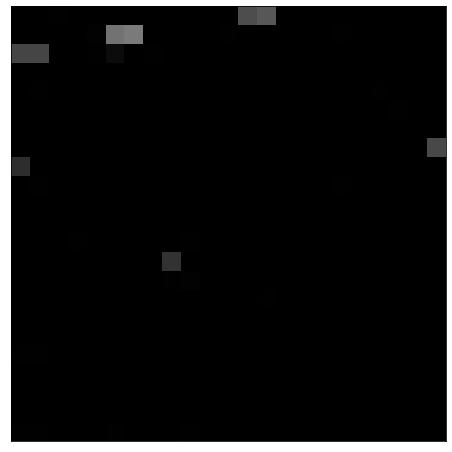

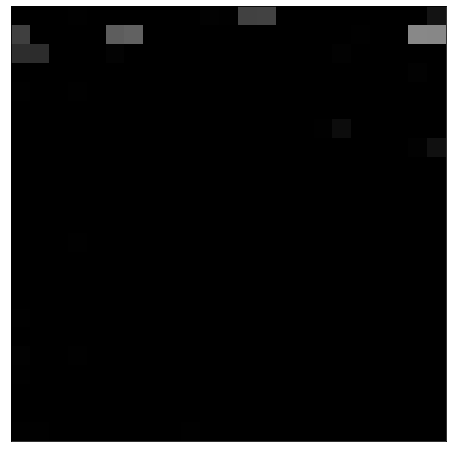

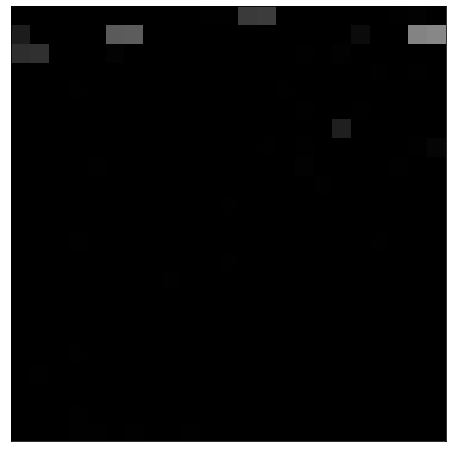

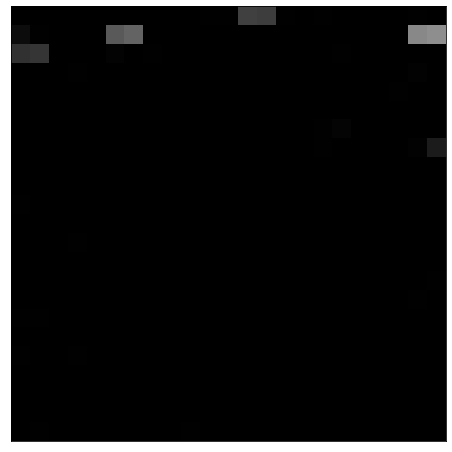

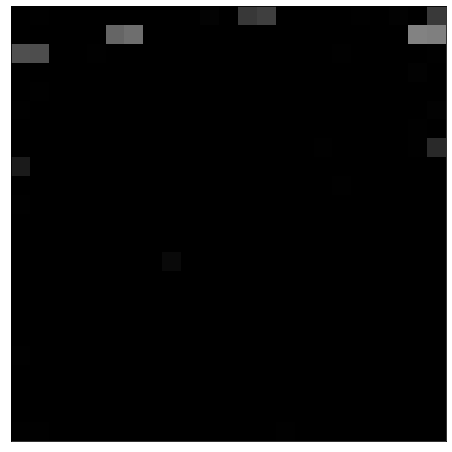

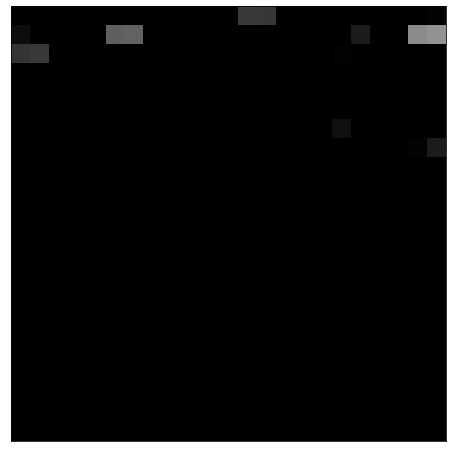

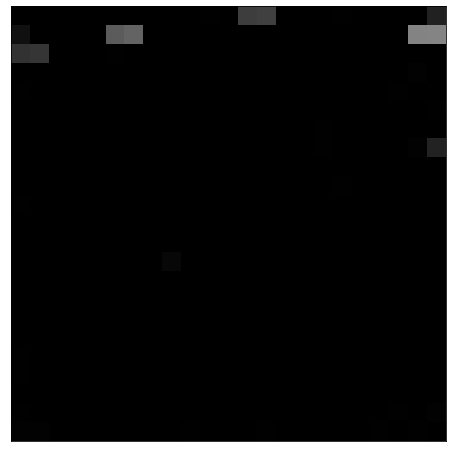

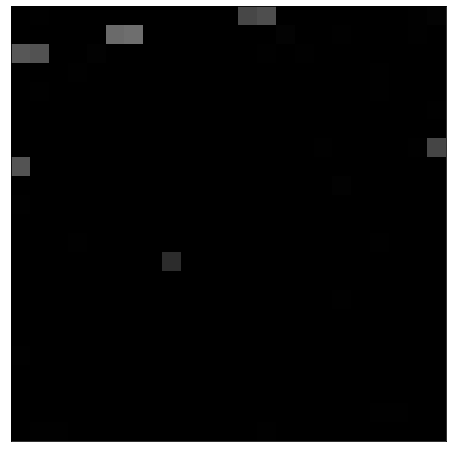

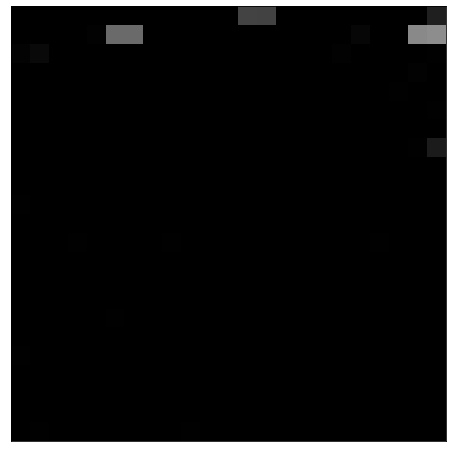

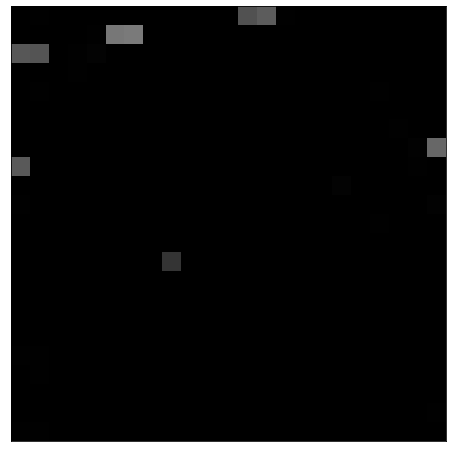

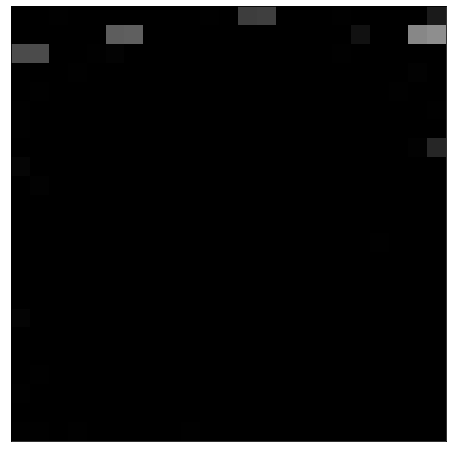

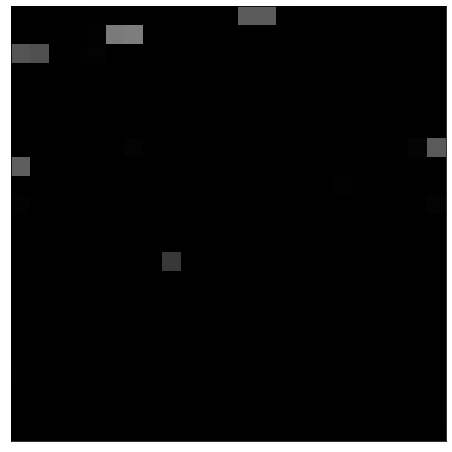

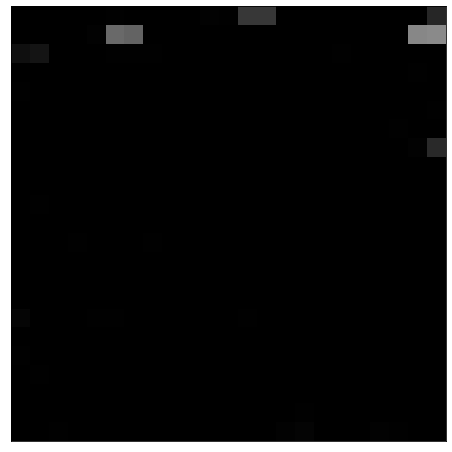

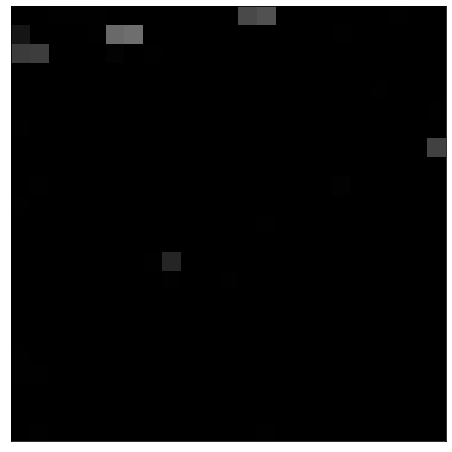

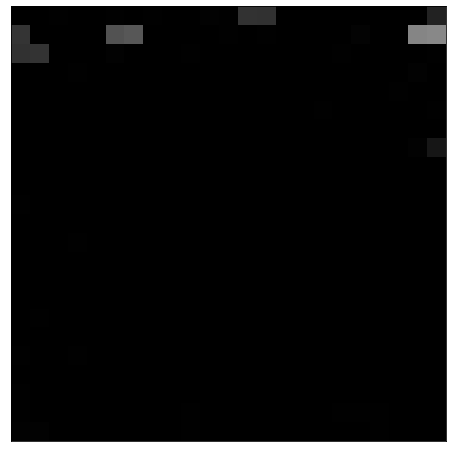

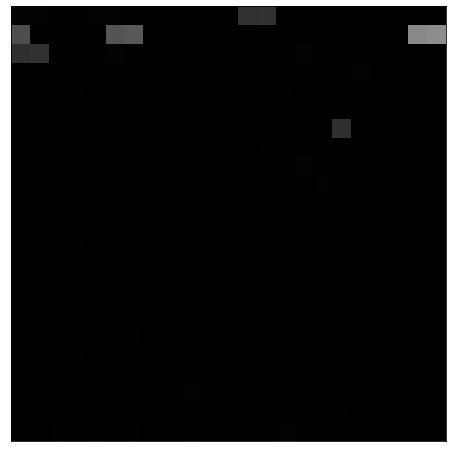

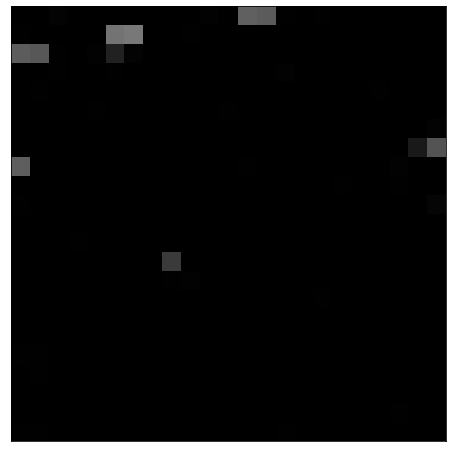

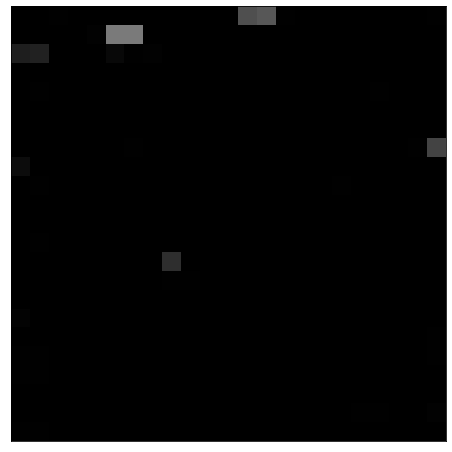

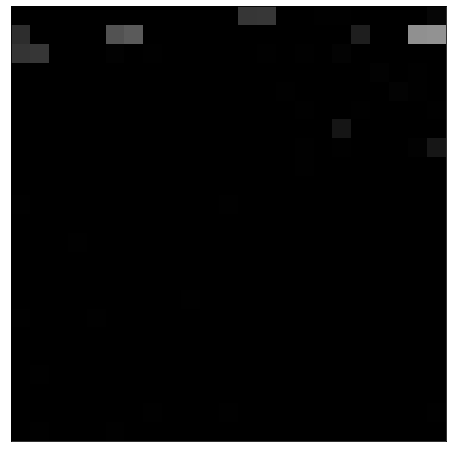

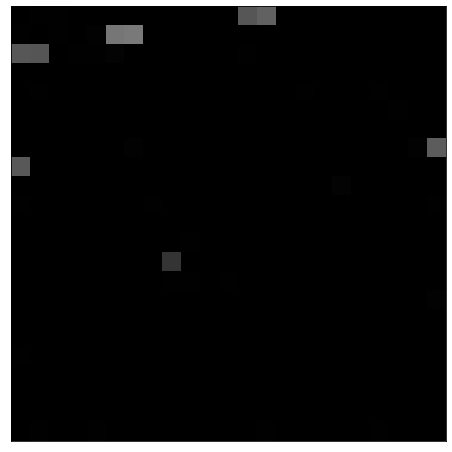

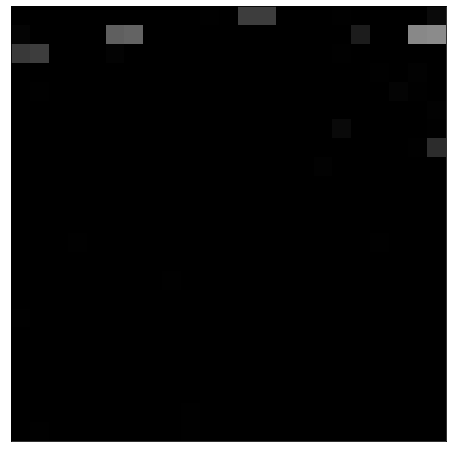

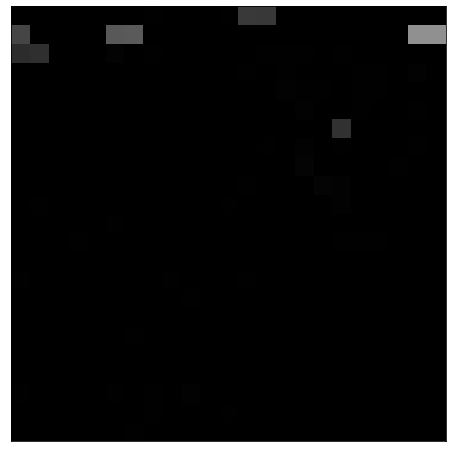

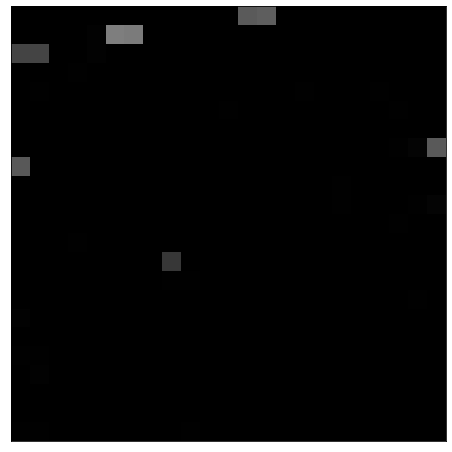

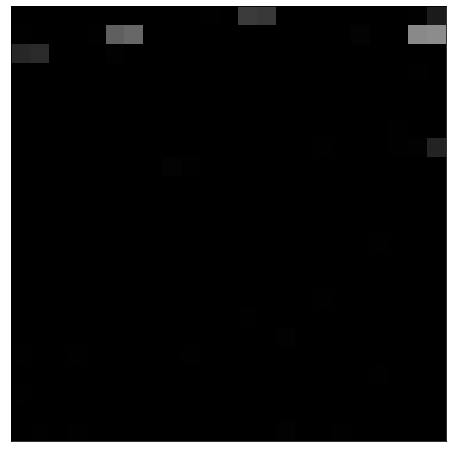

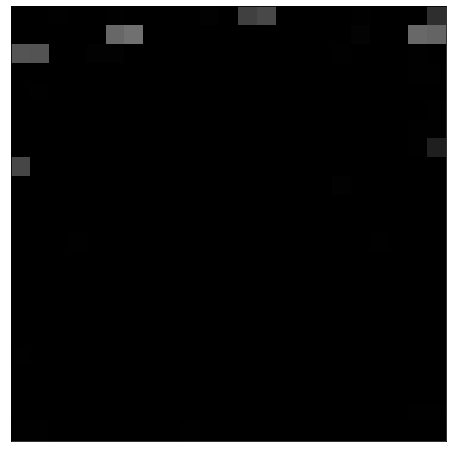

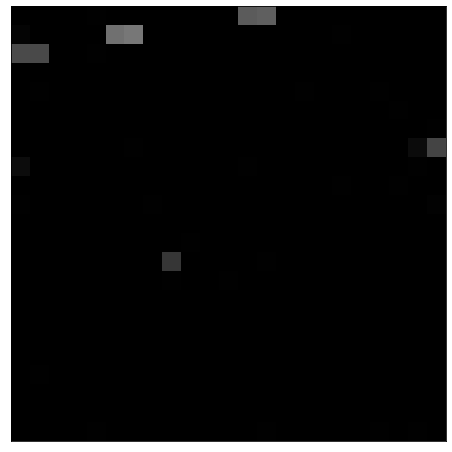

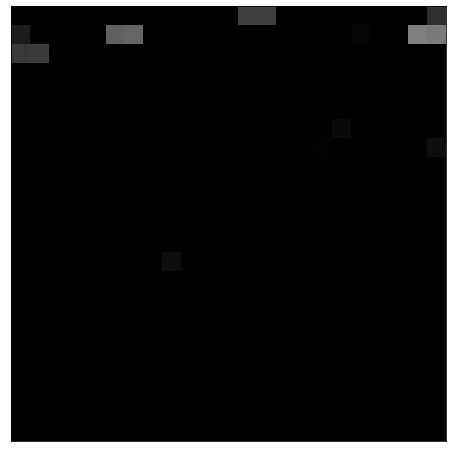

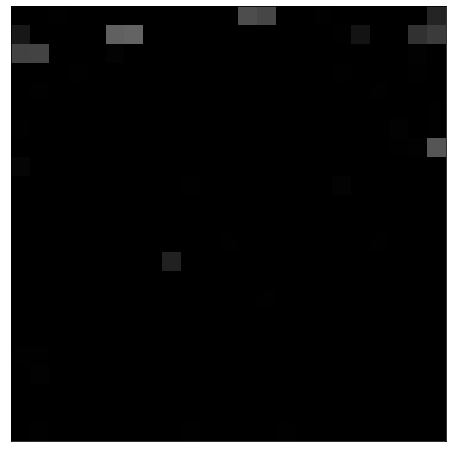

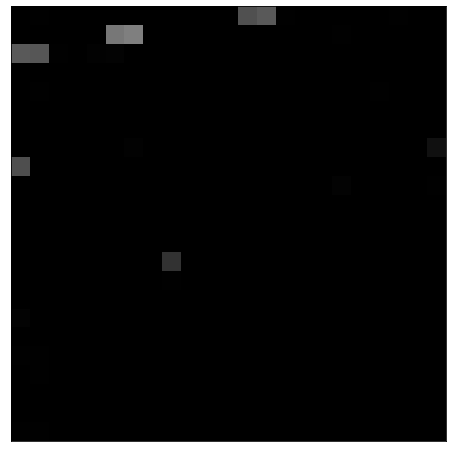

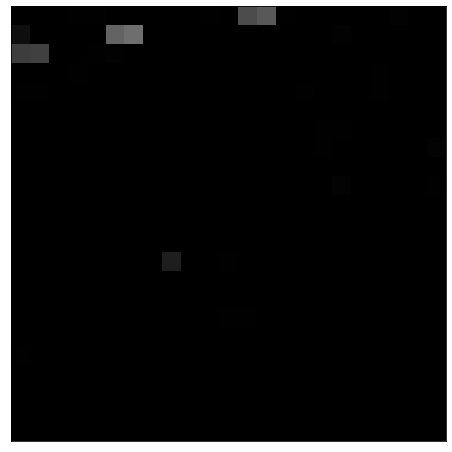

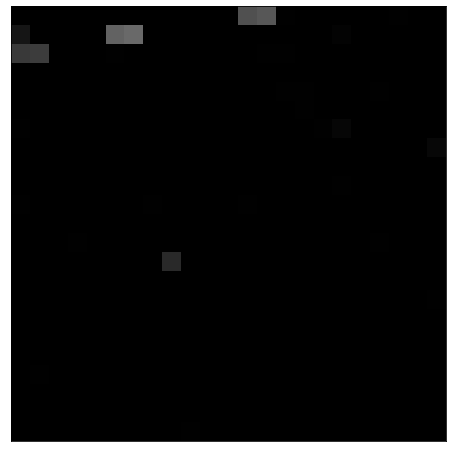

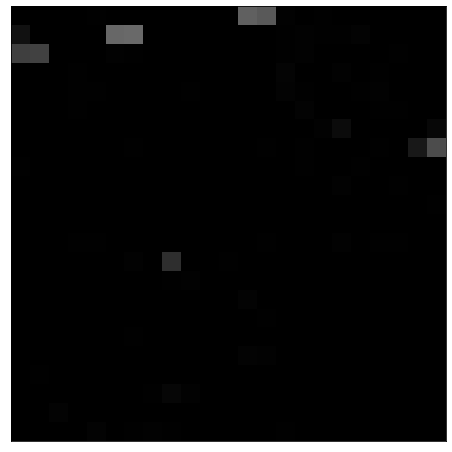

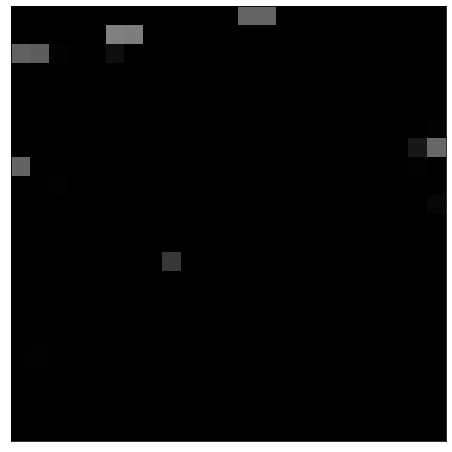

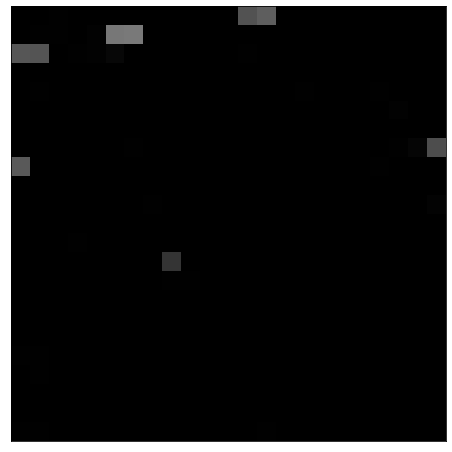

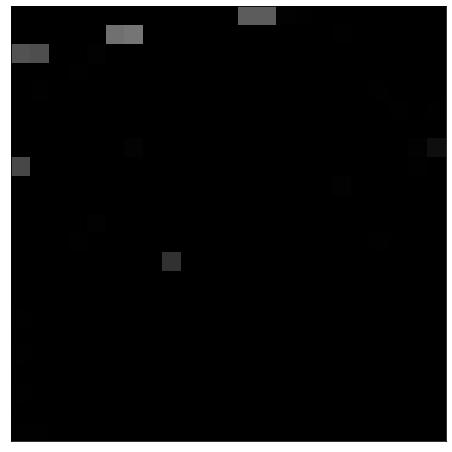

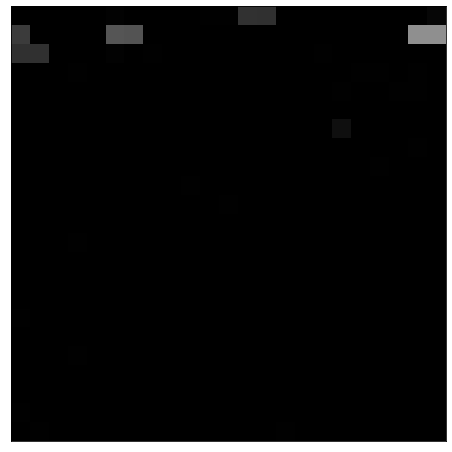

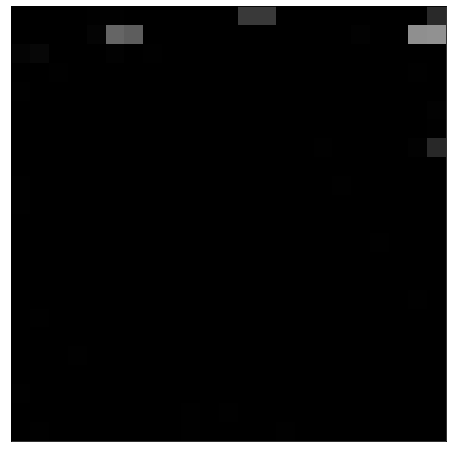

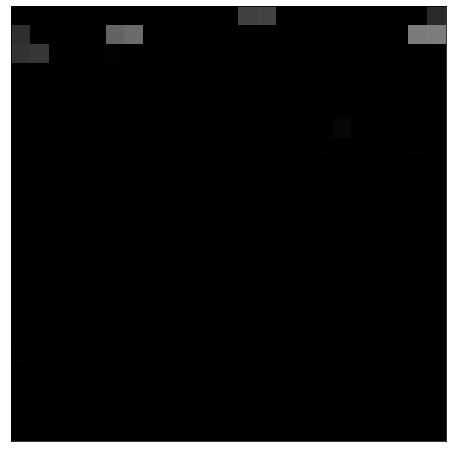

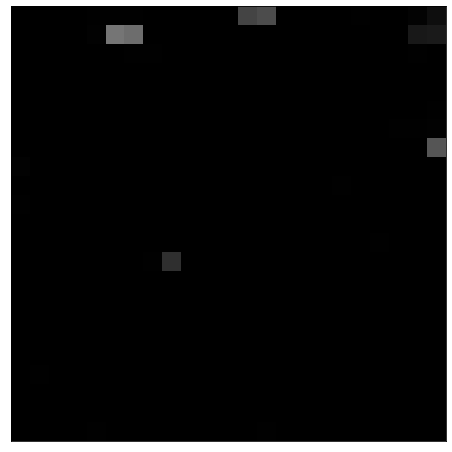

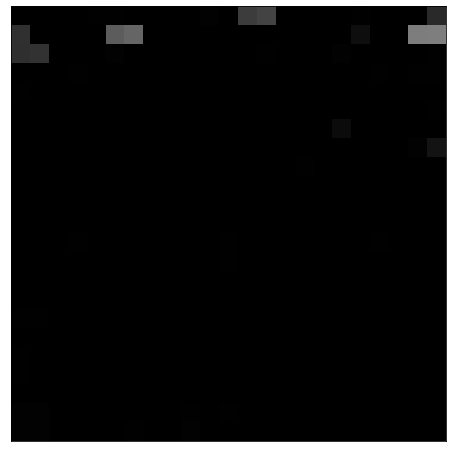

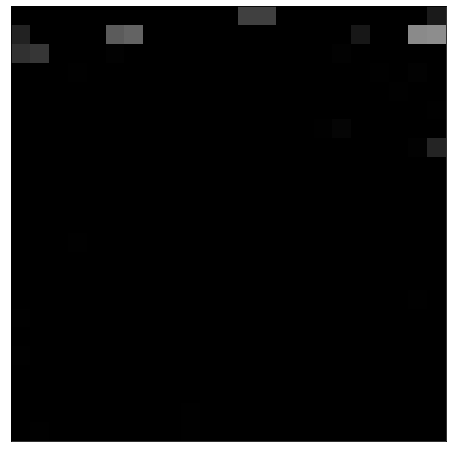

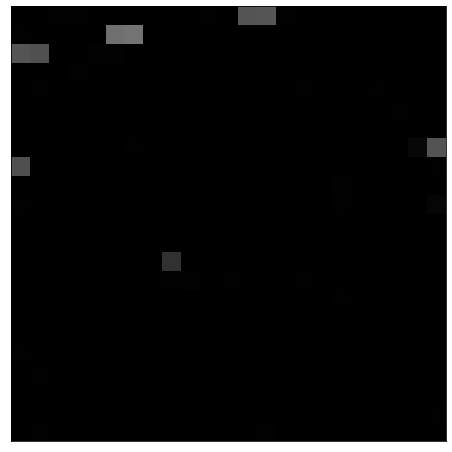

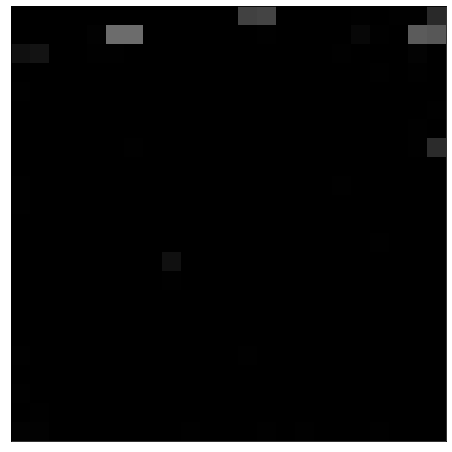

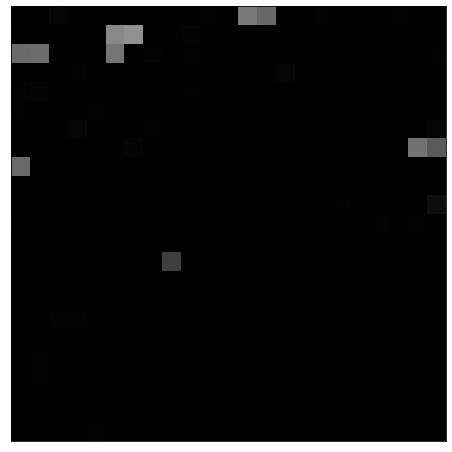

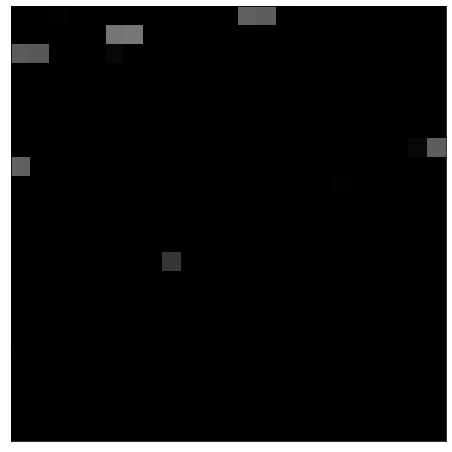

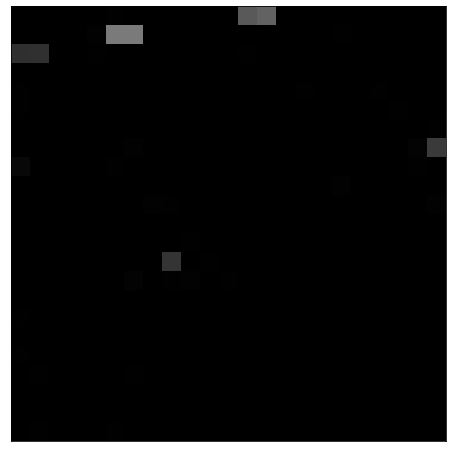

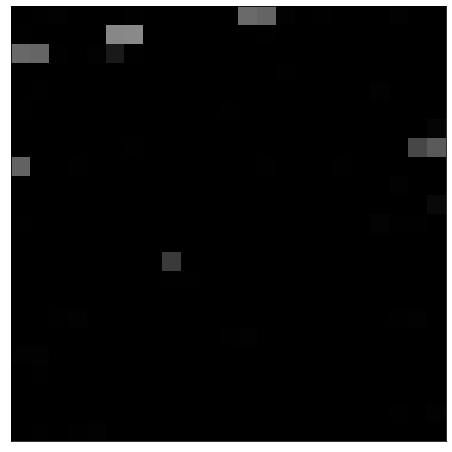

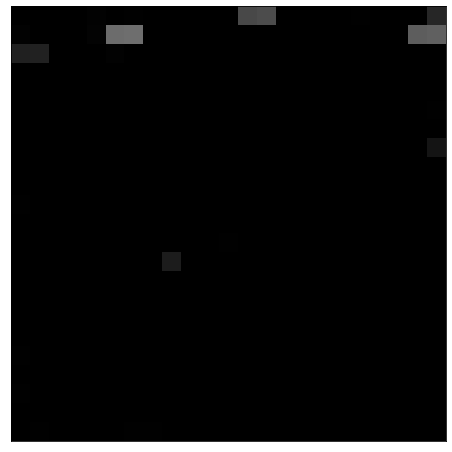

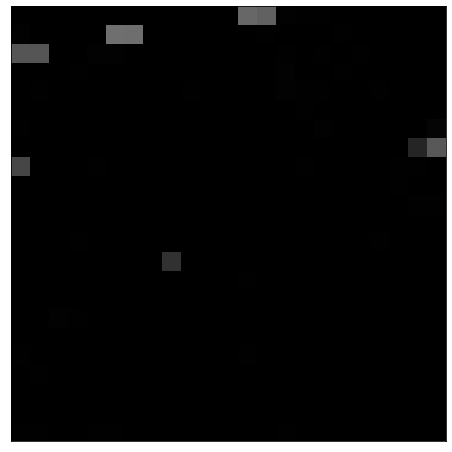

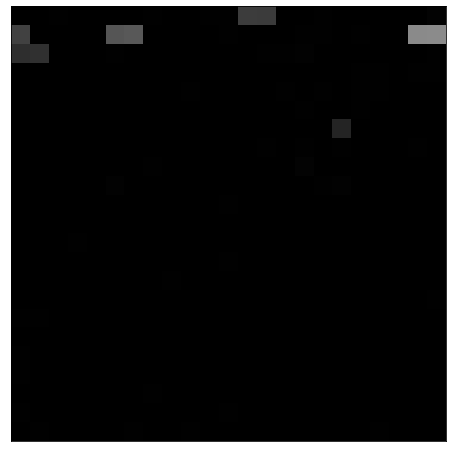

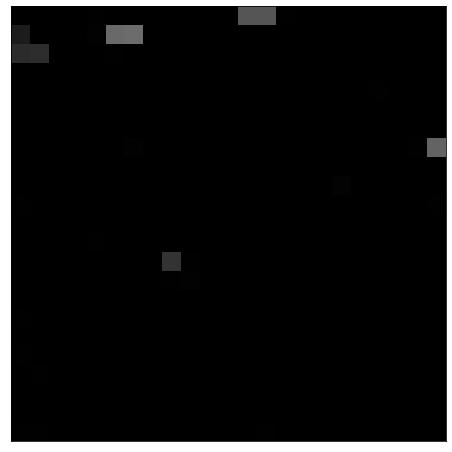

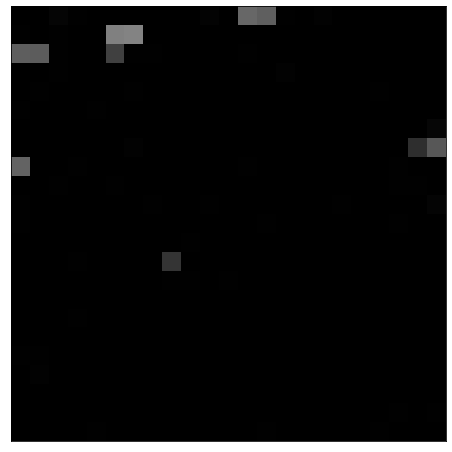

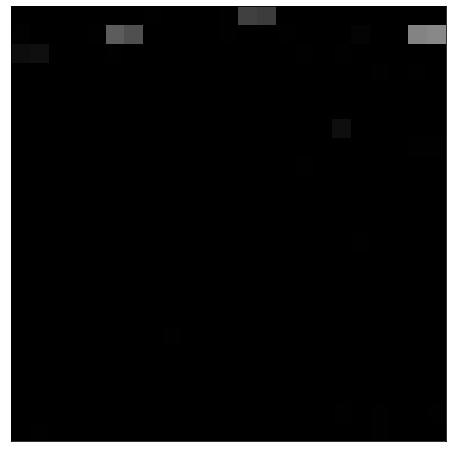

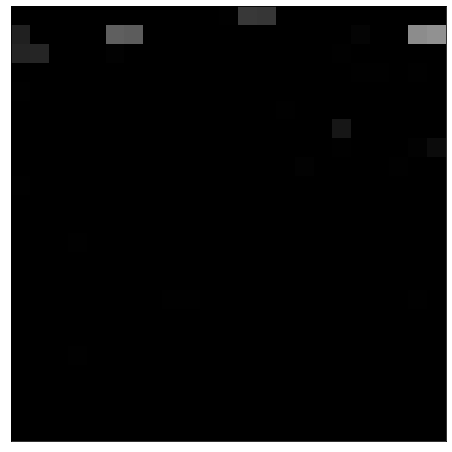

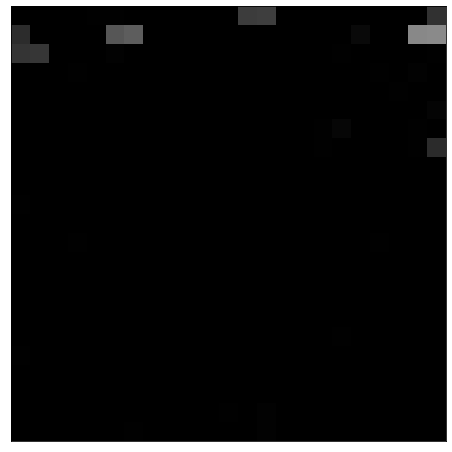

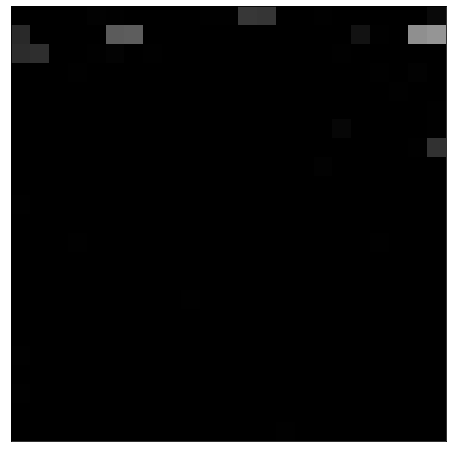

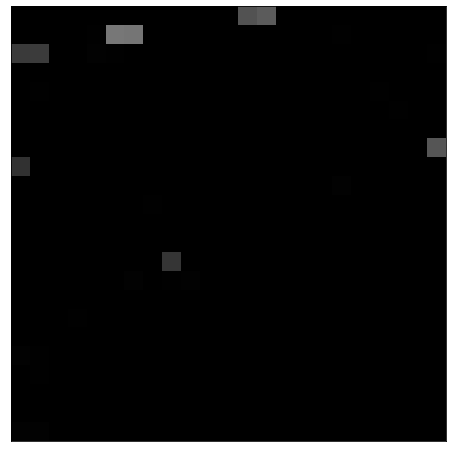

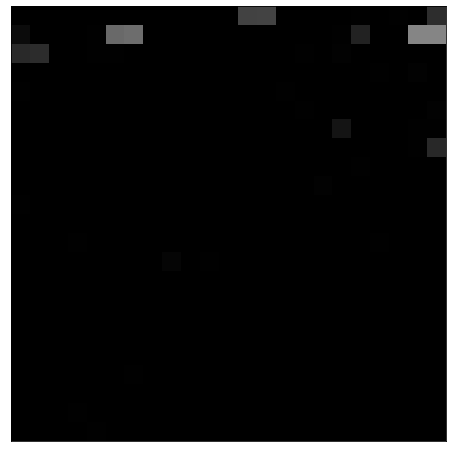

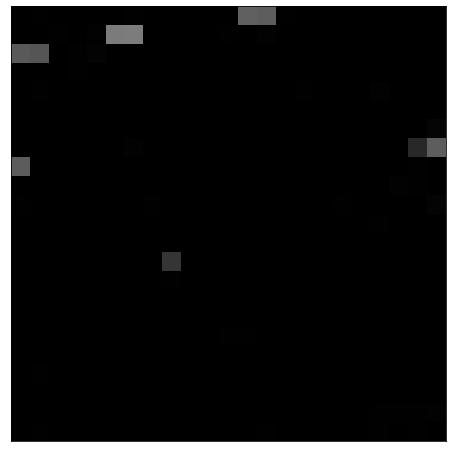

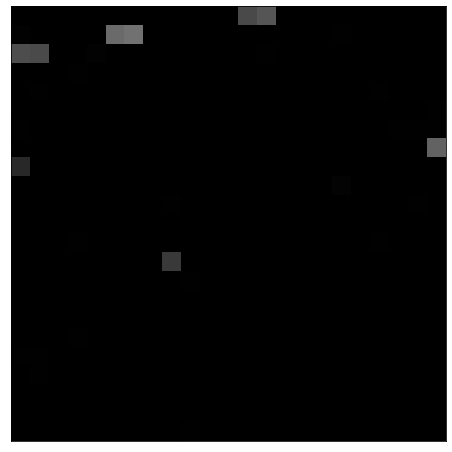

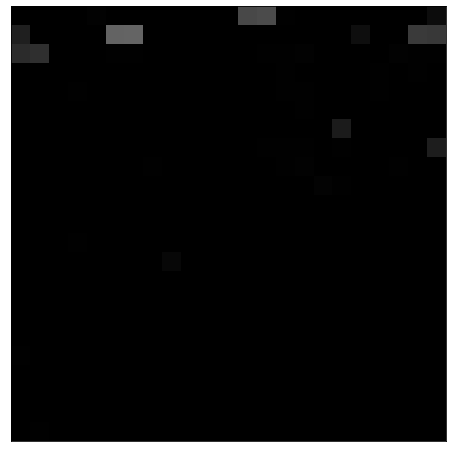

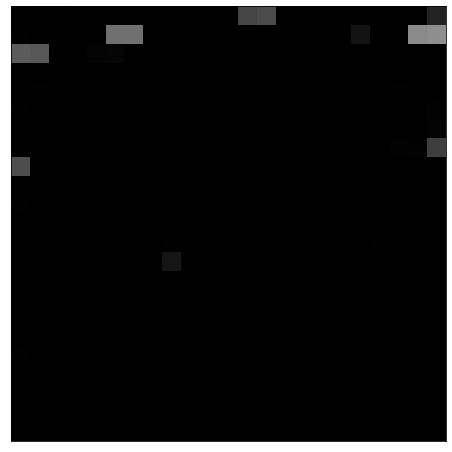

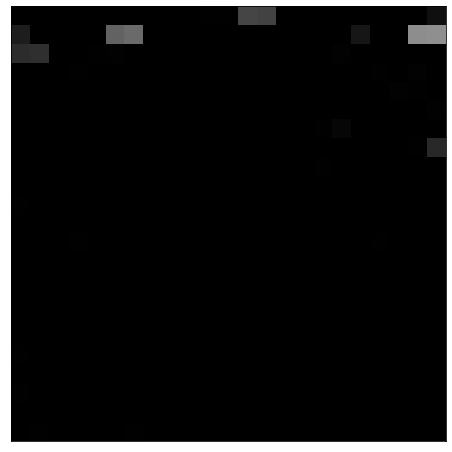

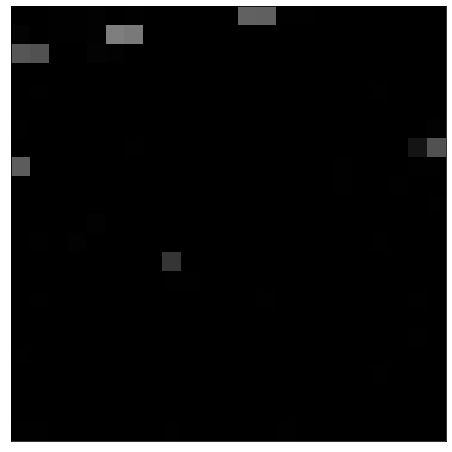

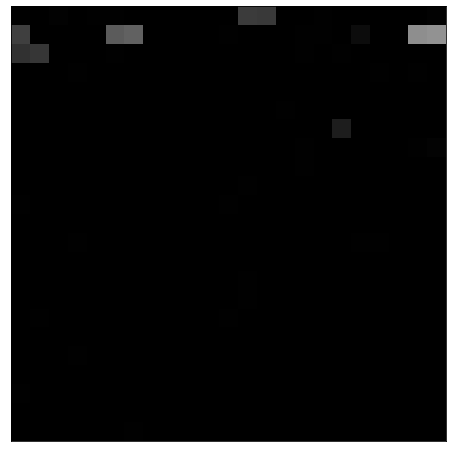

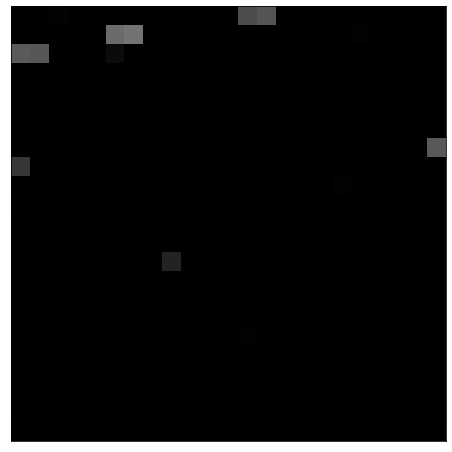

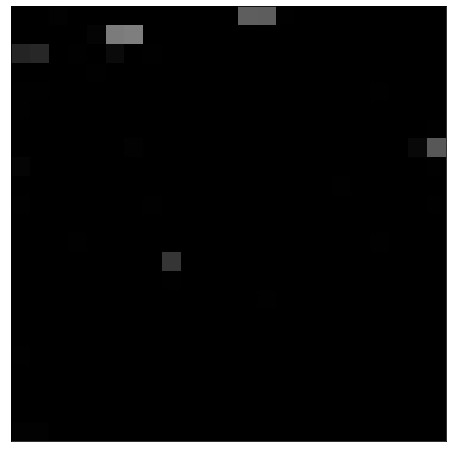

In [21]:
#Should predict loc
data_dir = 'C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/images/ori_wgan/150/b0f3/-7637.002300001681_4864905.532300003/'
d = os.listdir(data_dir)
ori_img(len(d),d, data_dir)


C:\Users\noxtu\AppData\Local\Temp/ipykernel_3304/1226359348.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (8,8), frameon=False)


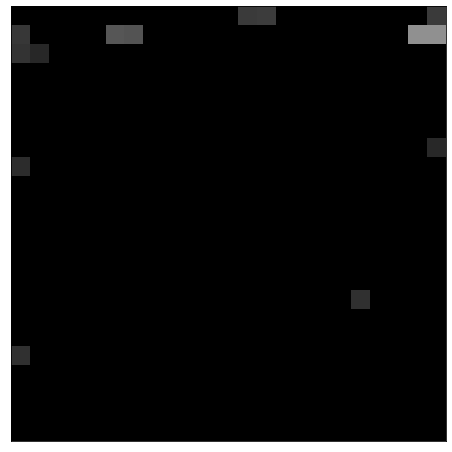

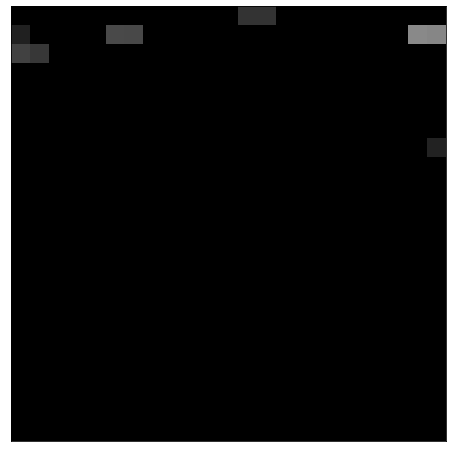

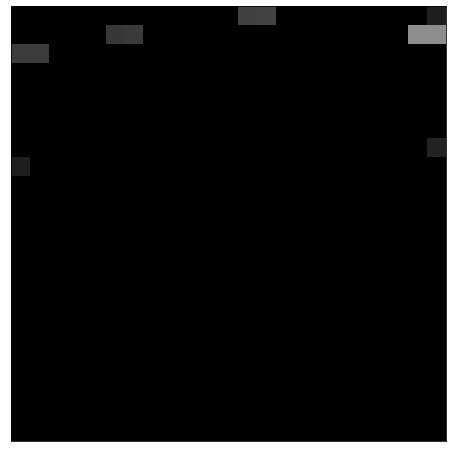

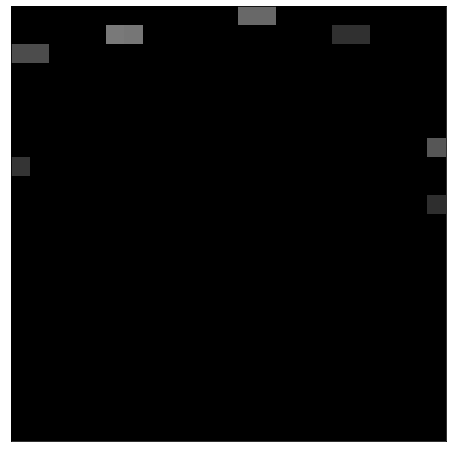

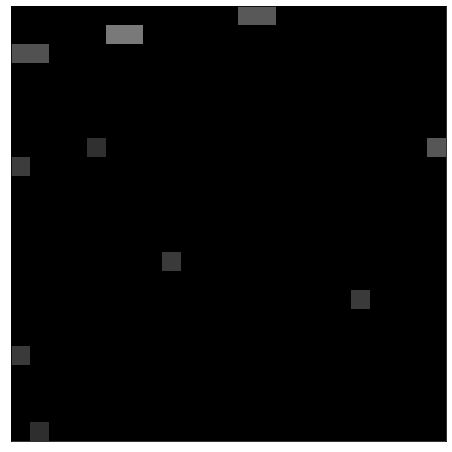

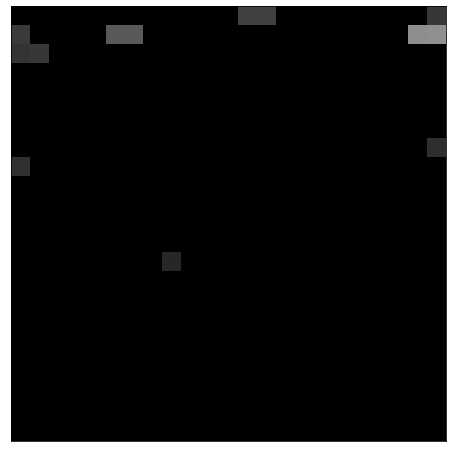

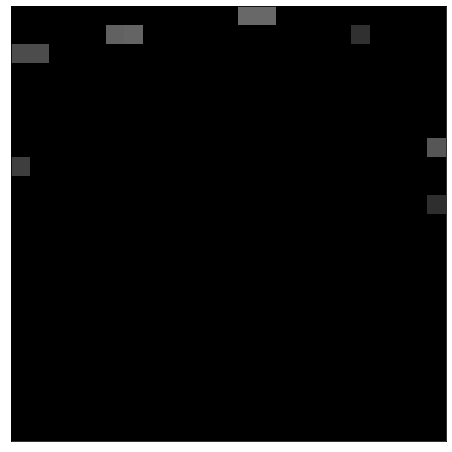

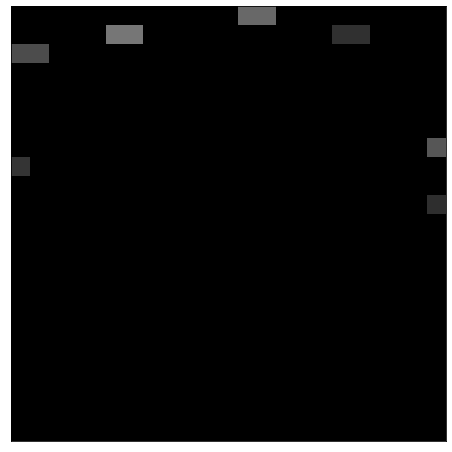

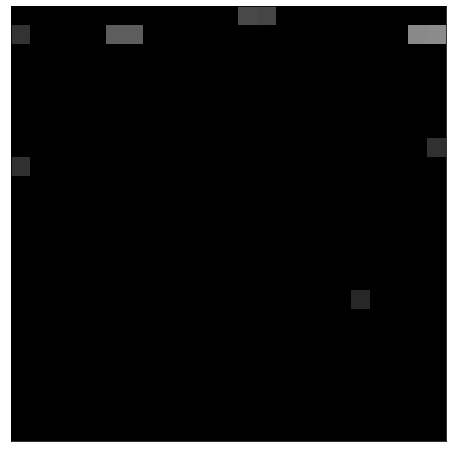

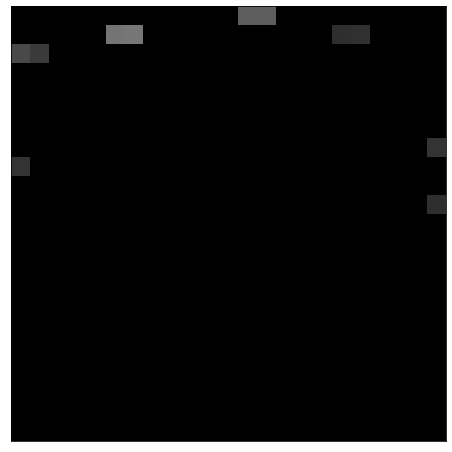

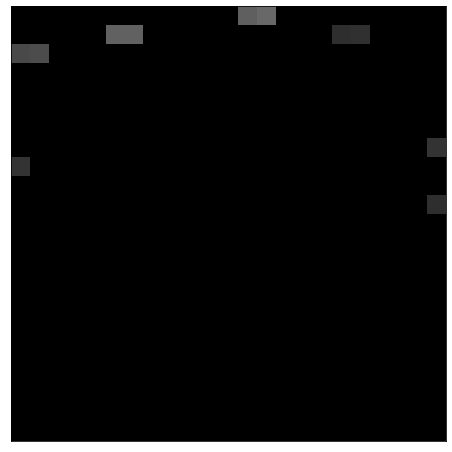

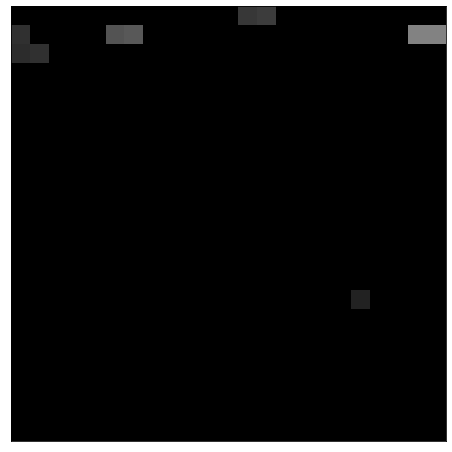

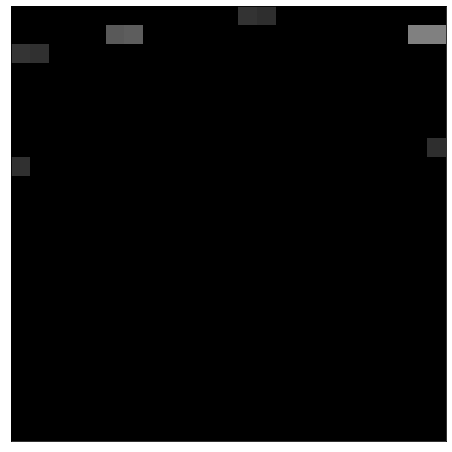

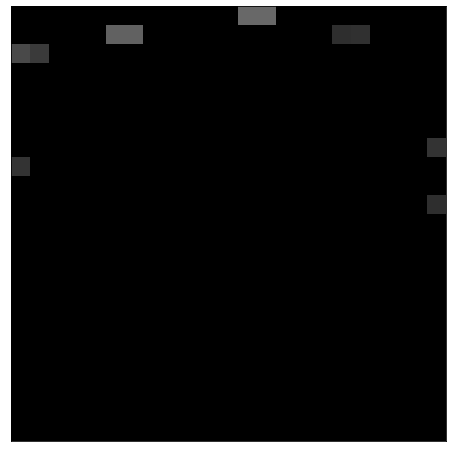

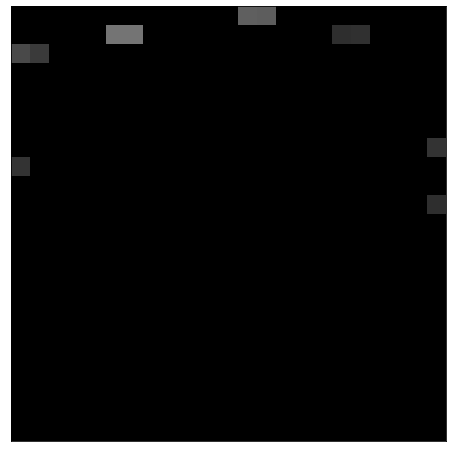

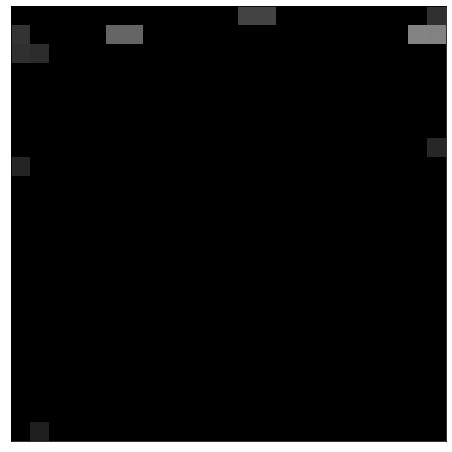

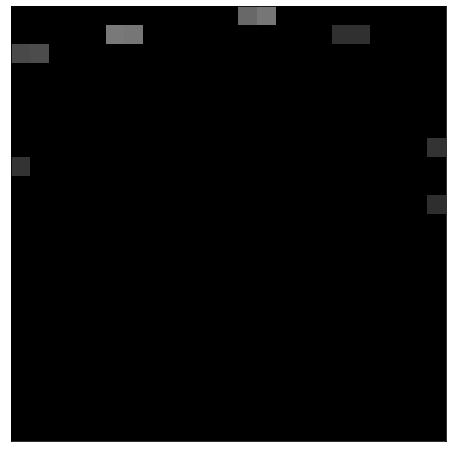

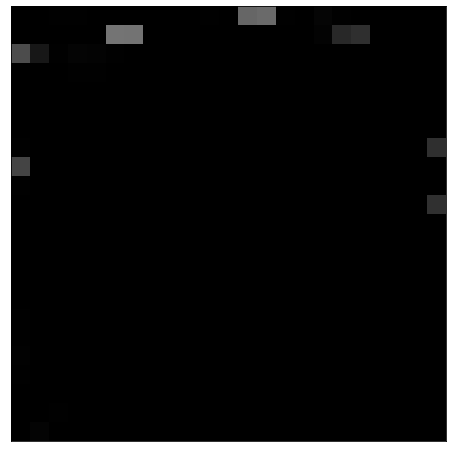

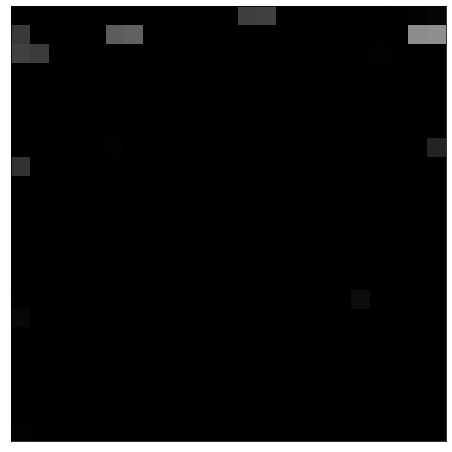

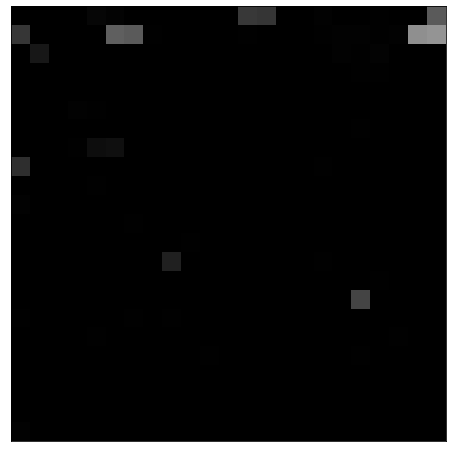

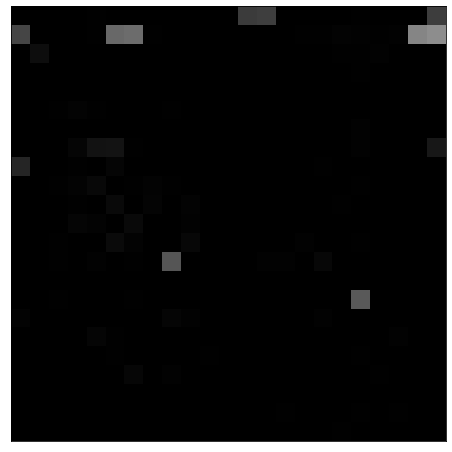

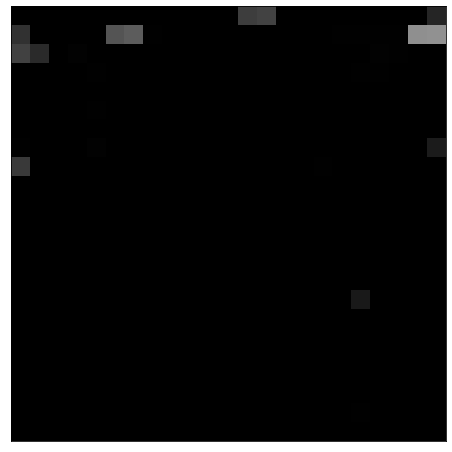

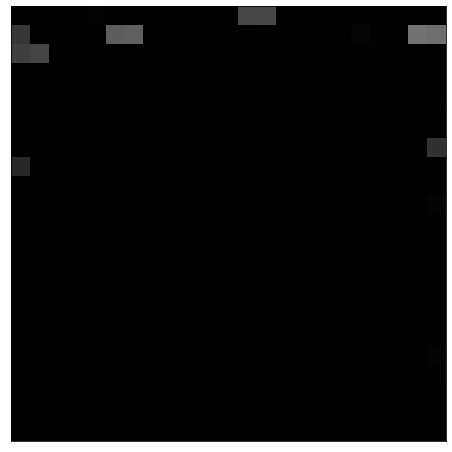

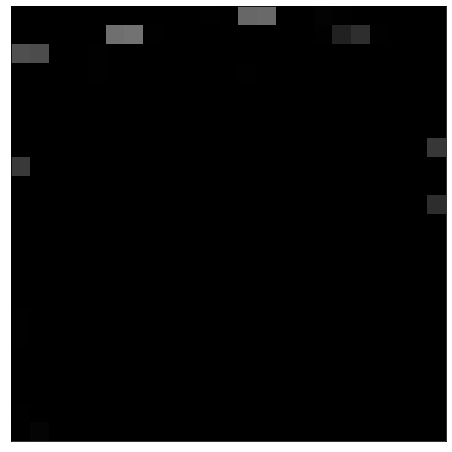

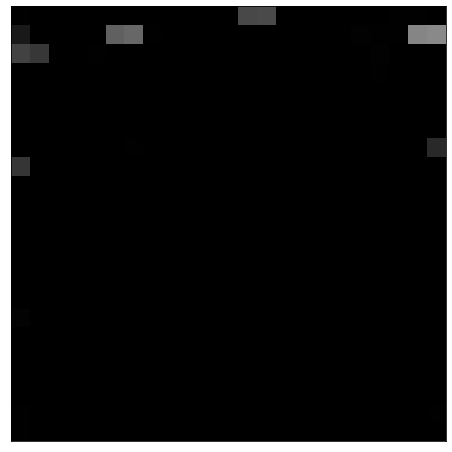

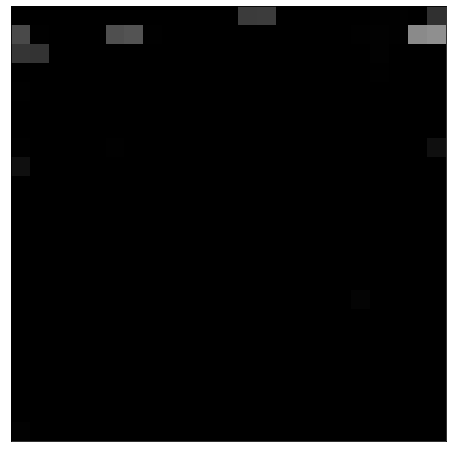

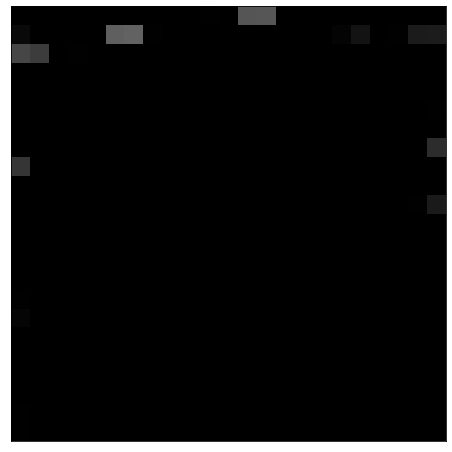

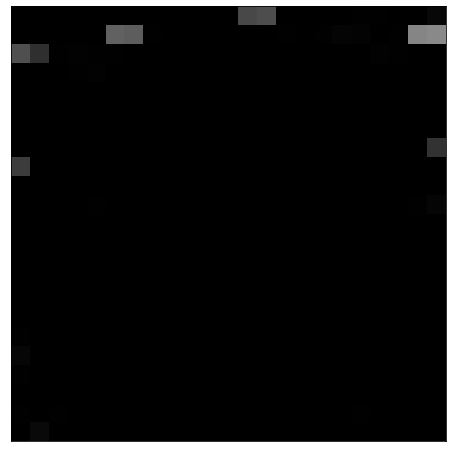

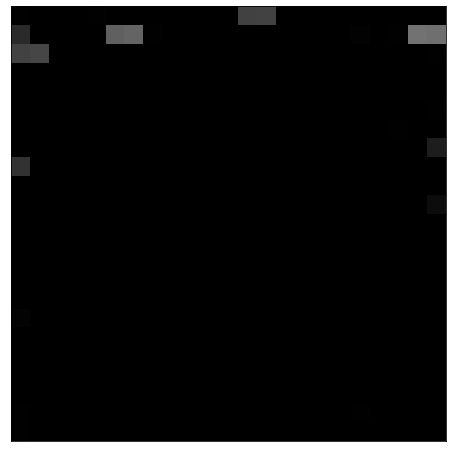

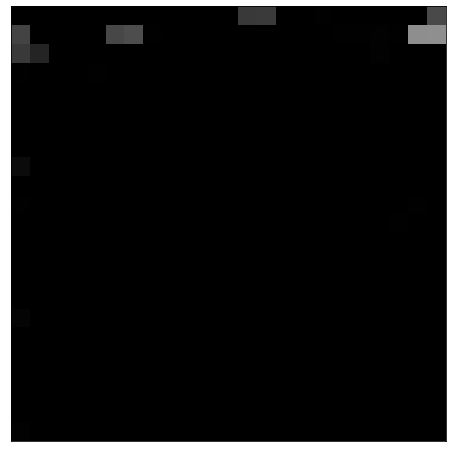

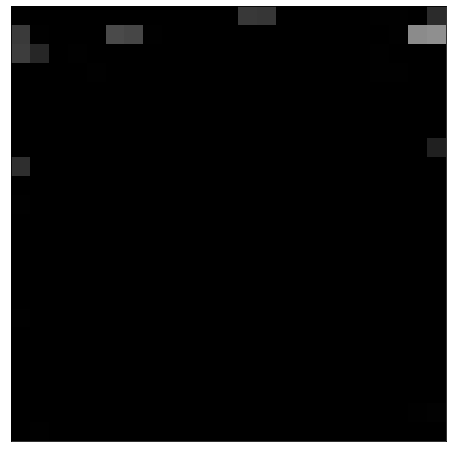

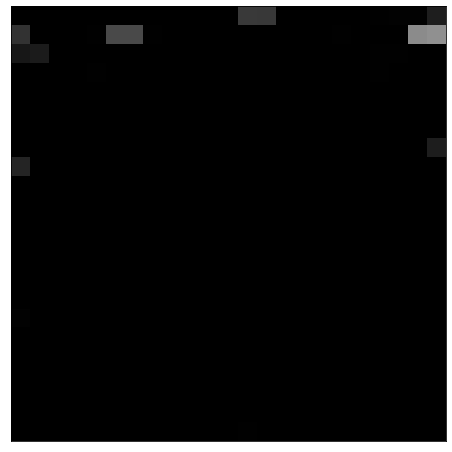

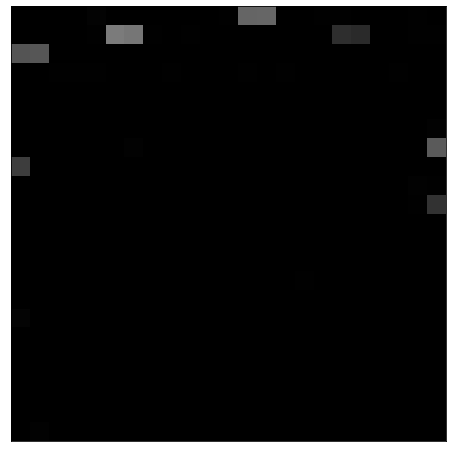

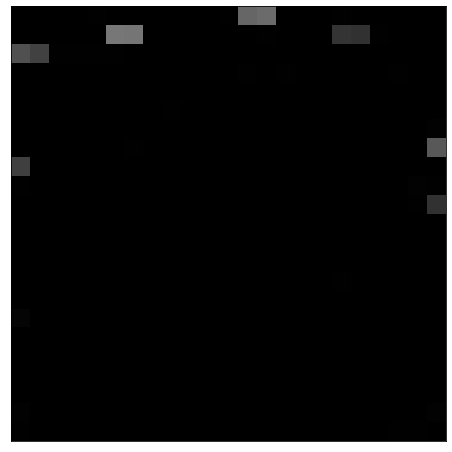

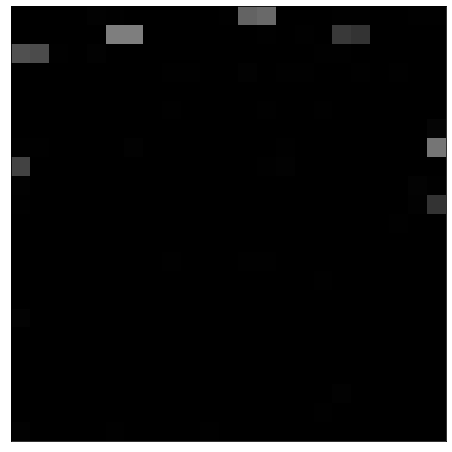

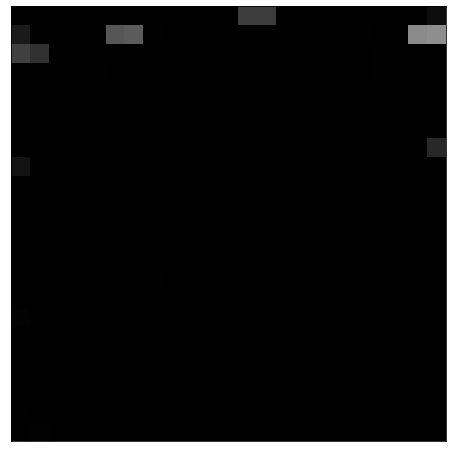

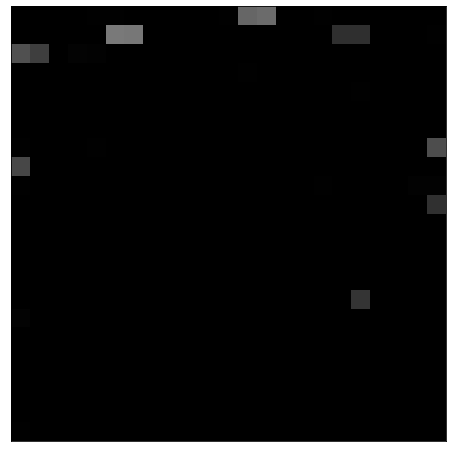

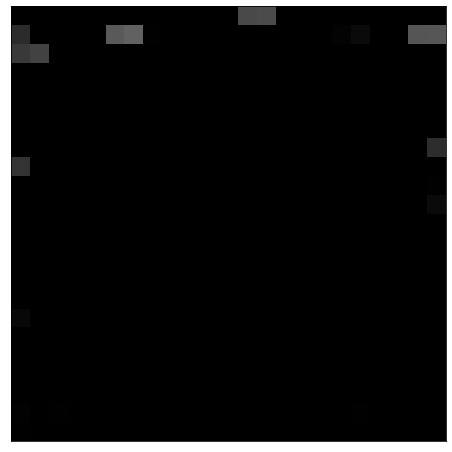

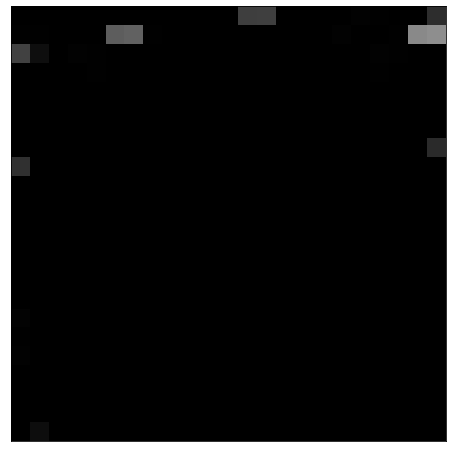

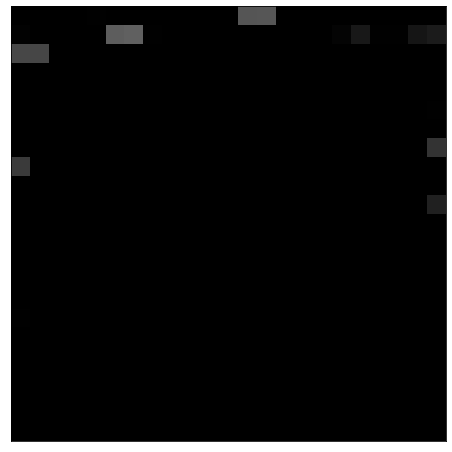

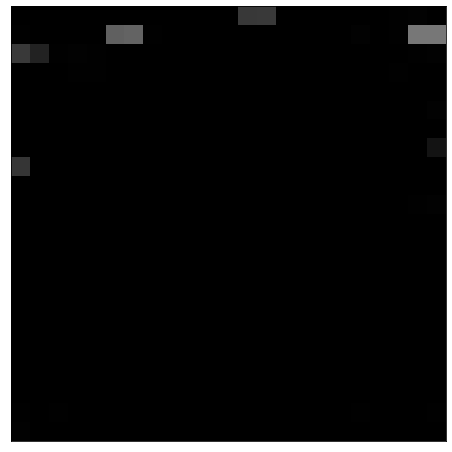

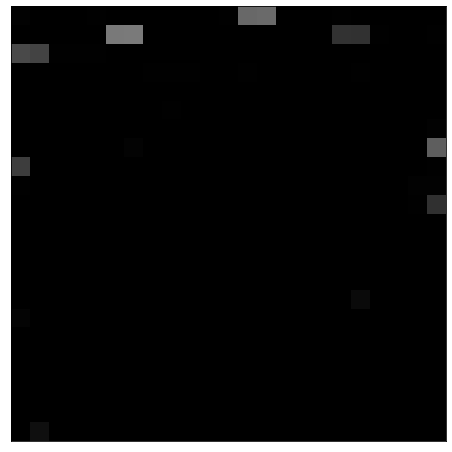

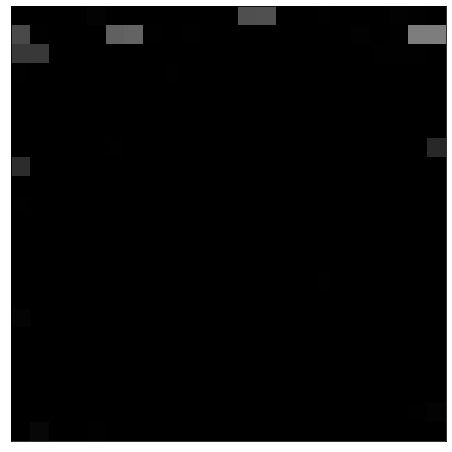

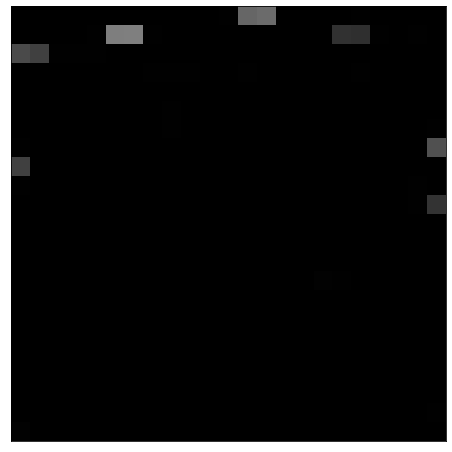

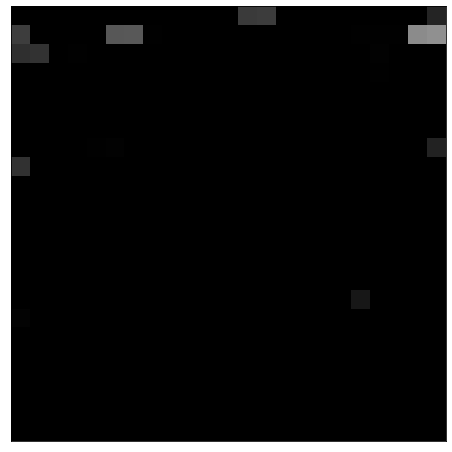

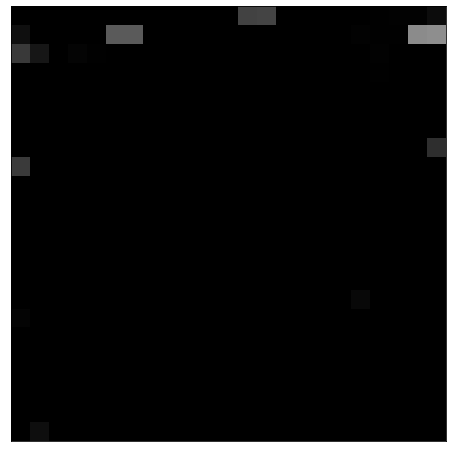

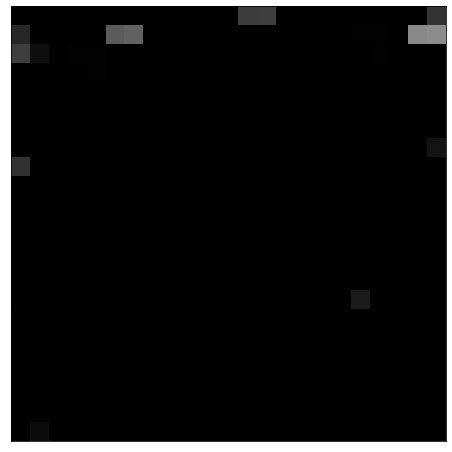

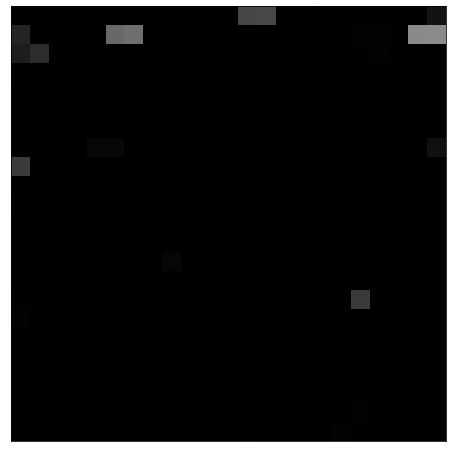

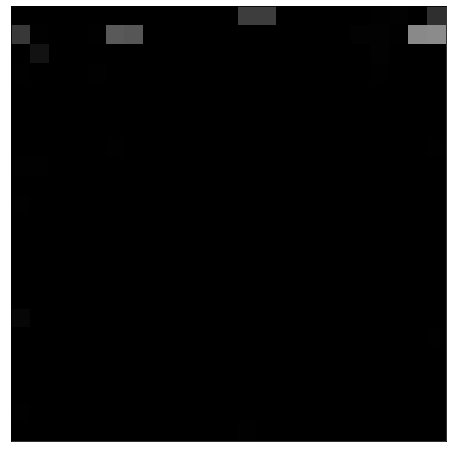

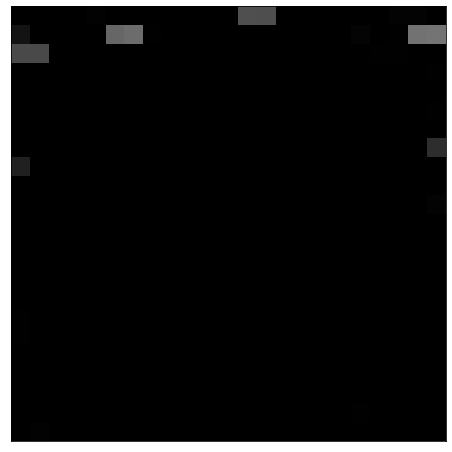

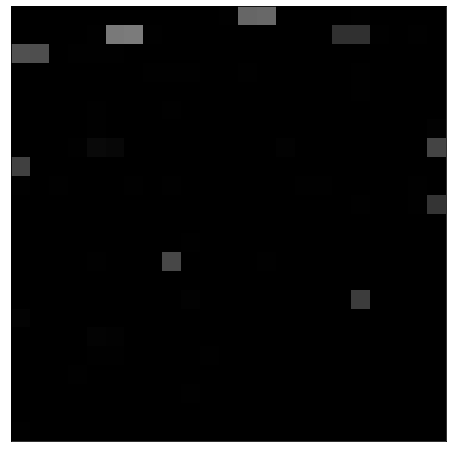

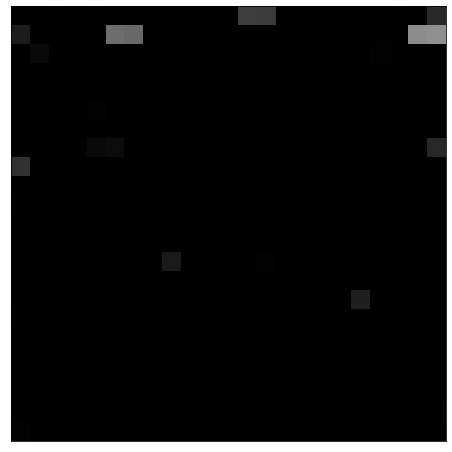

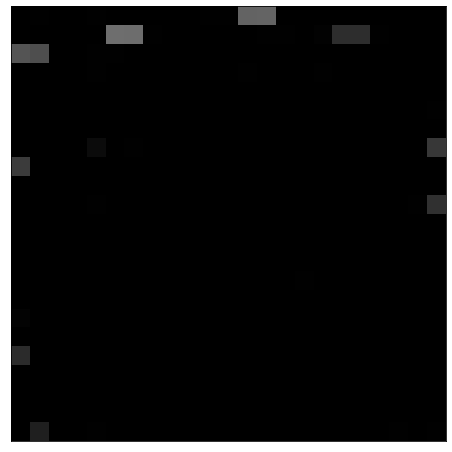

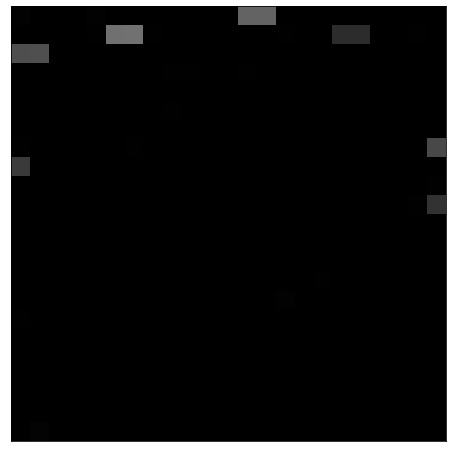

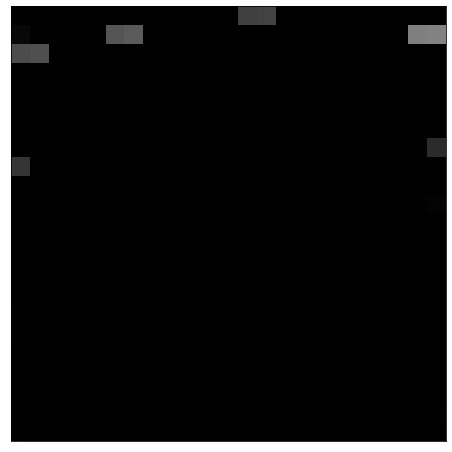

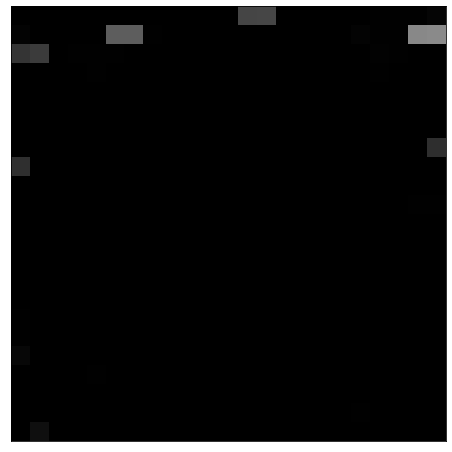

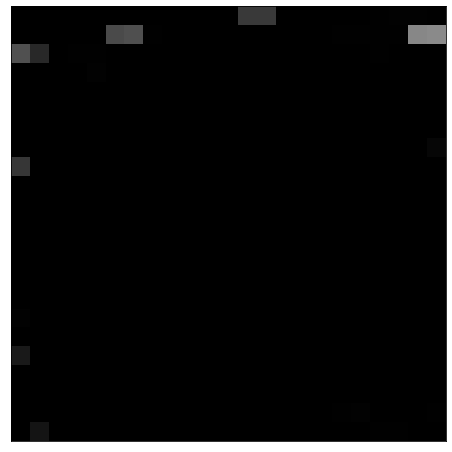

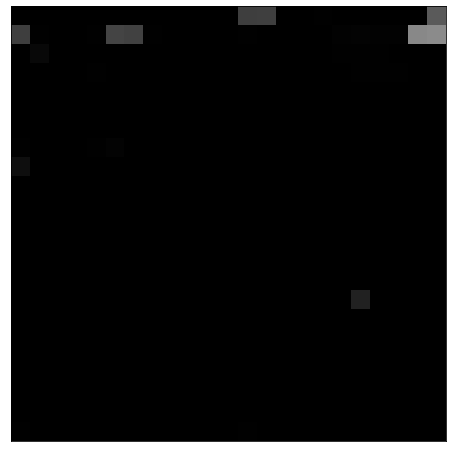

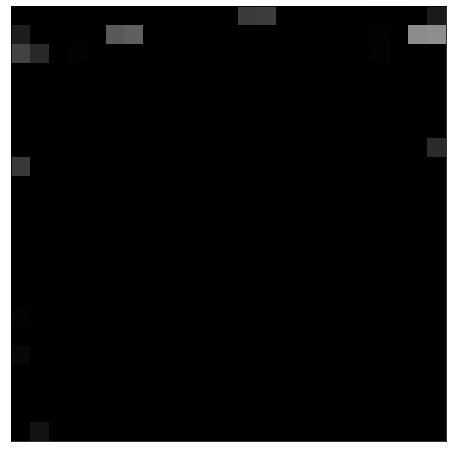

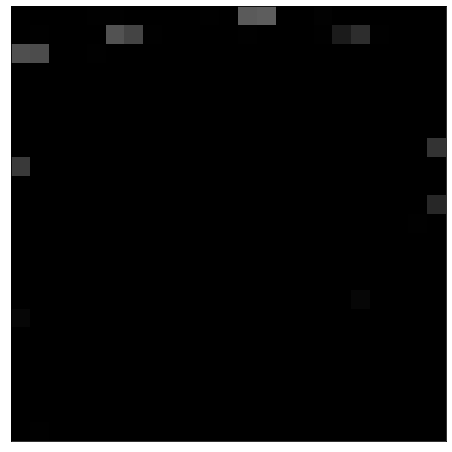

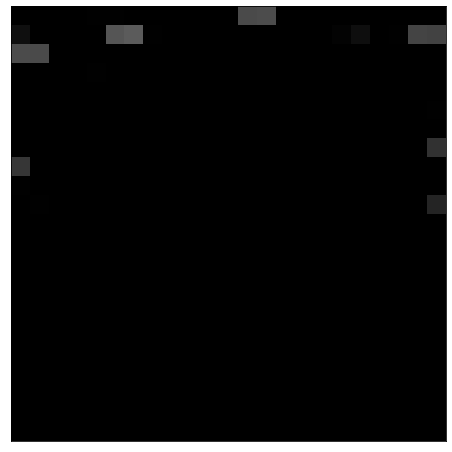

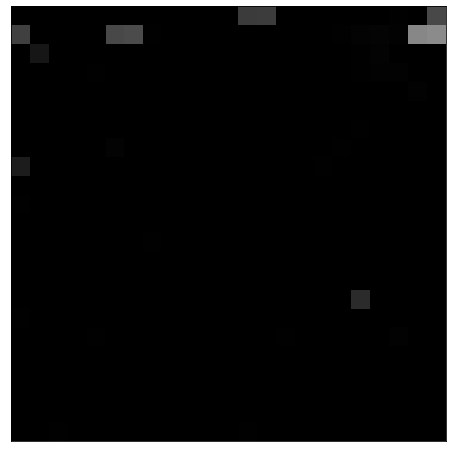

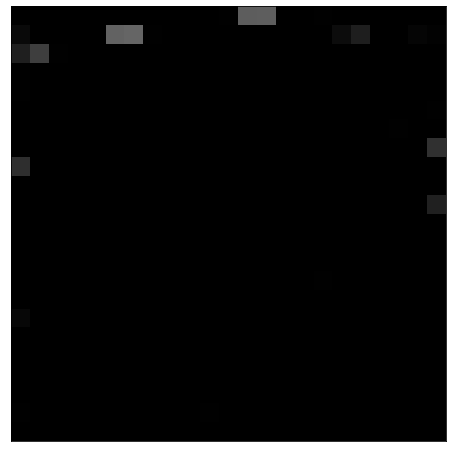

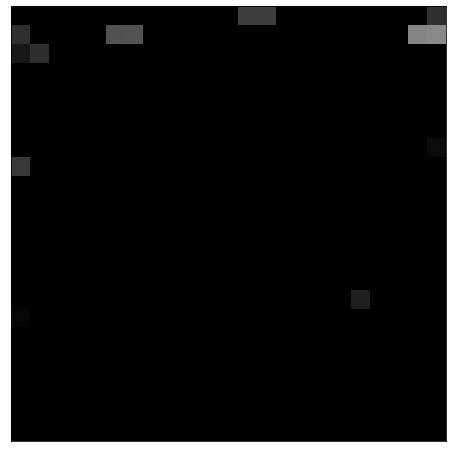

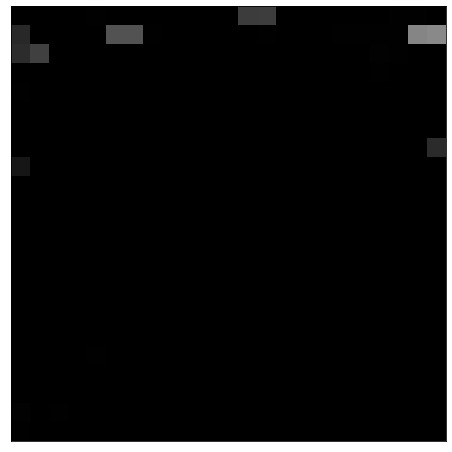

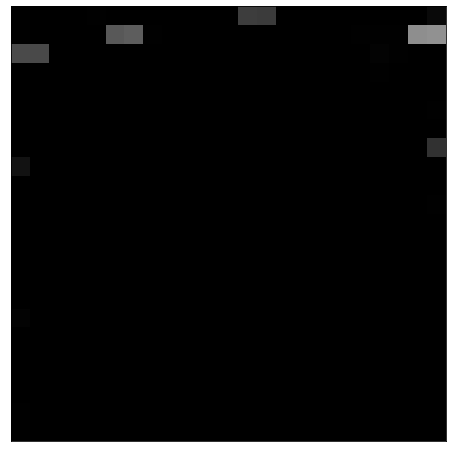

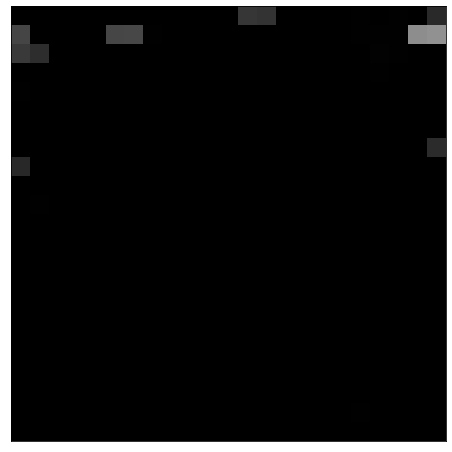

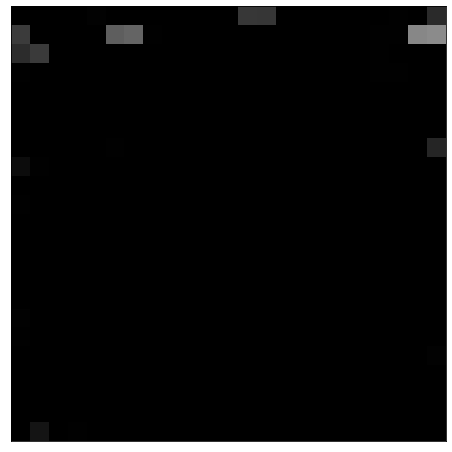

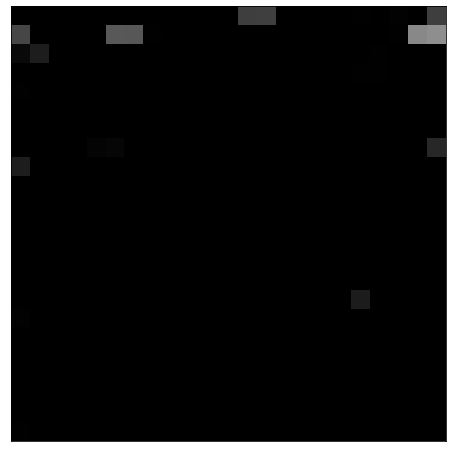

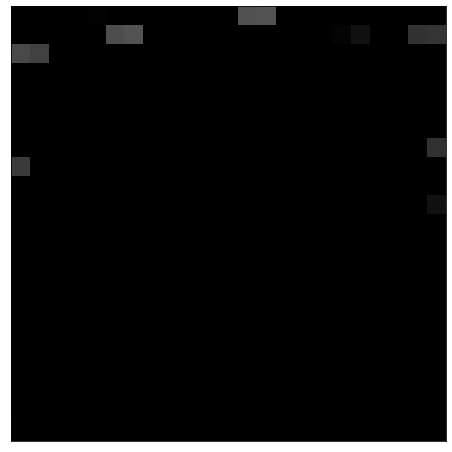

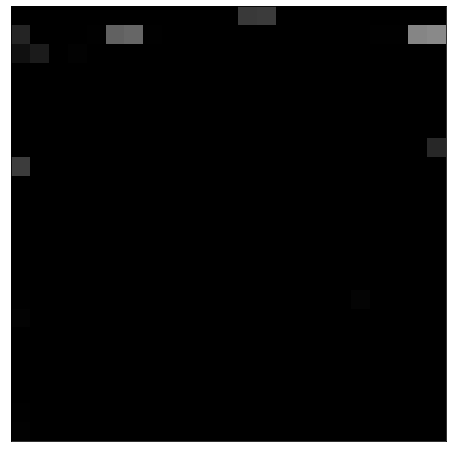

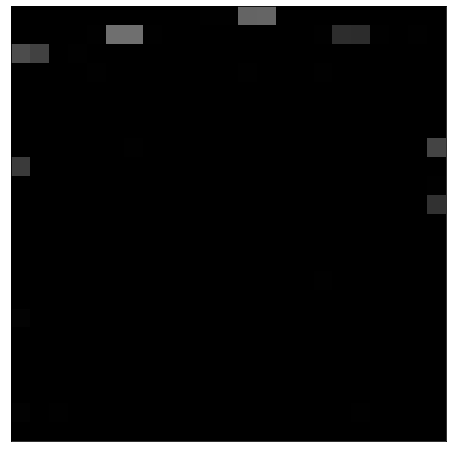

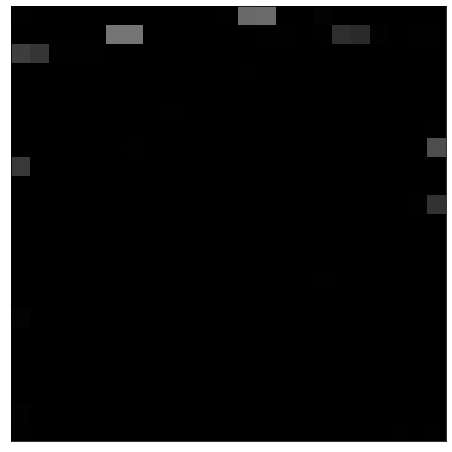

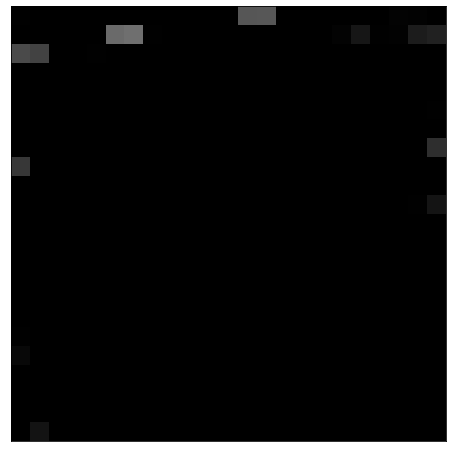

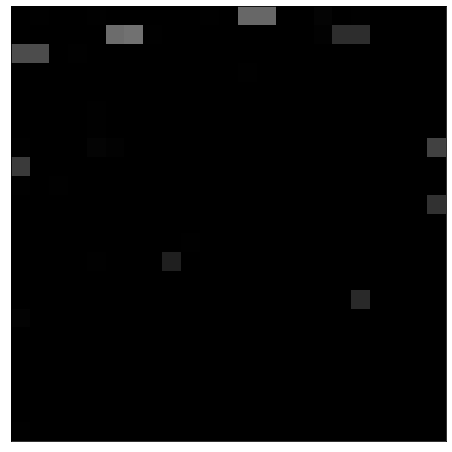

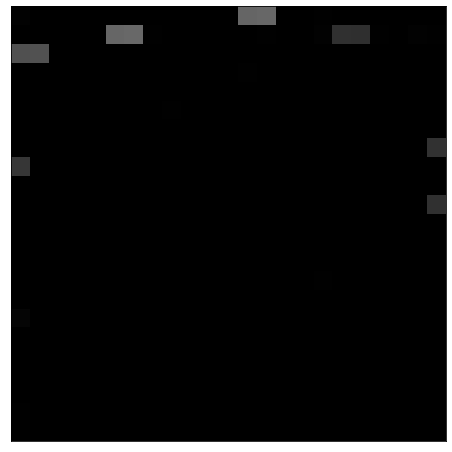

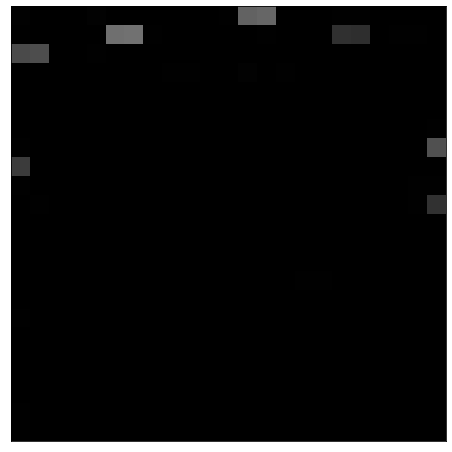

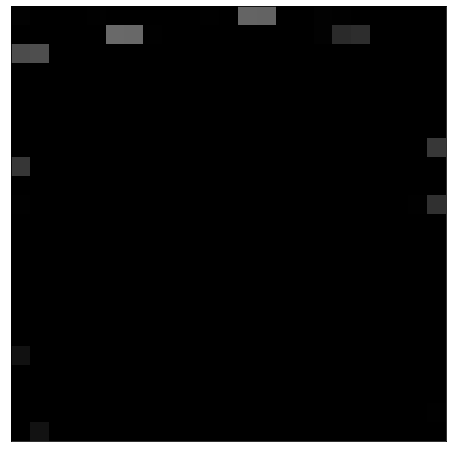

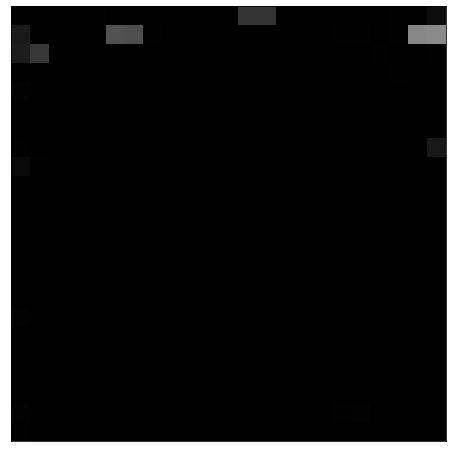

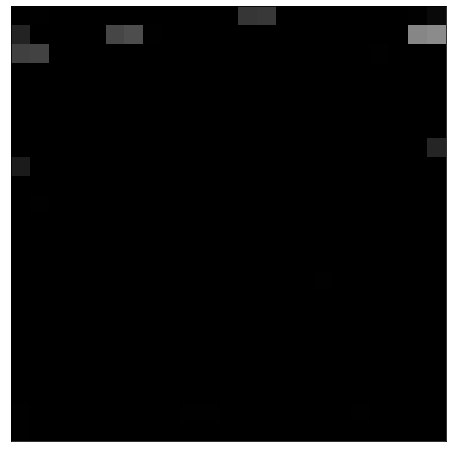

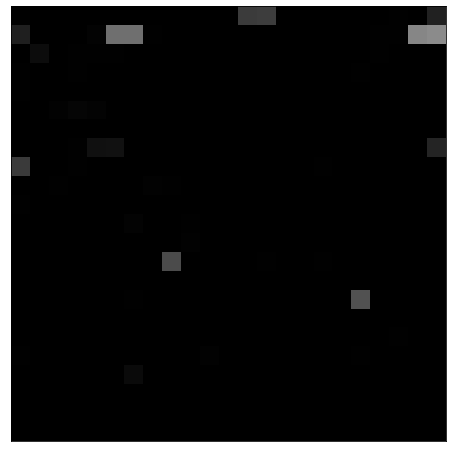

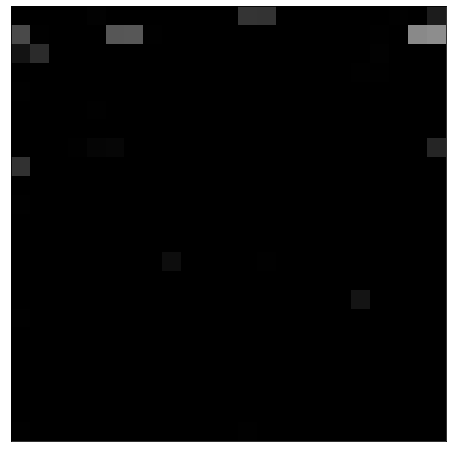

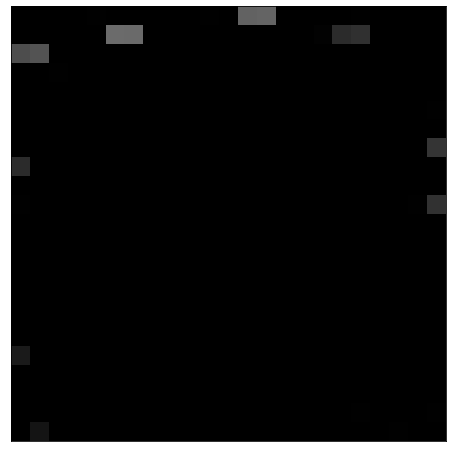

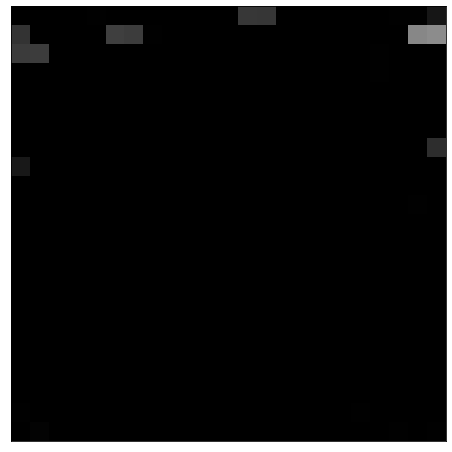

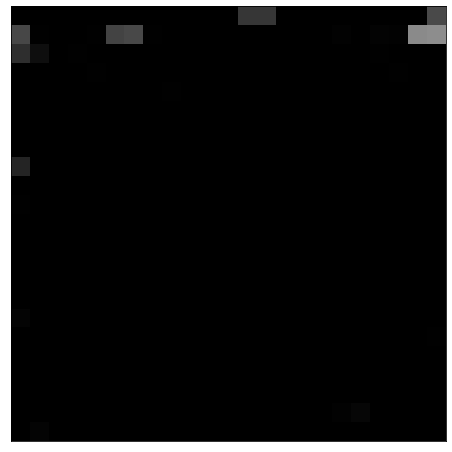

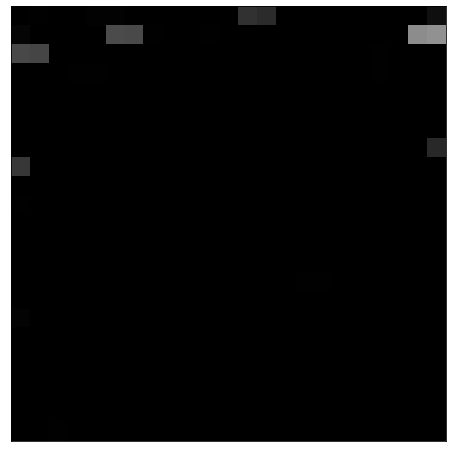

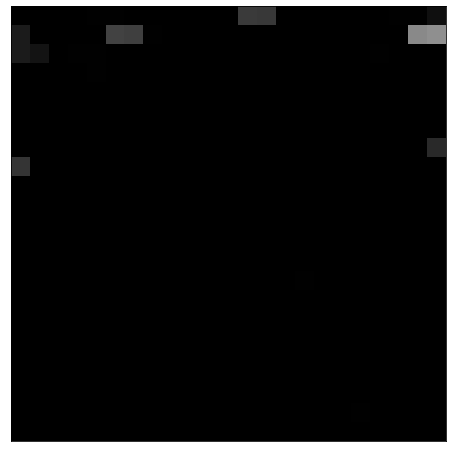

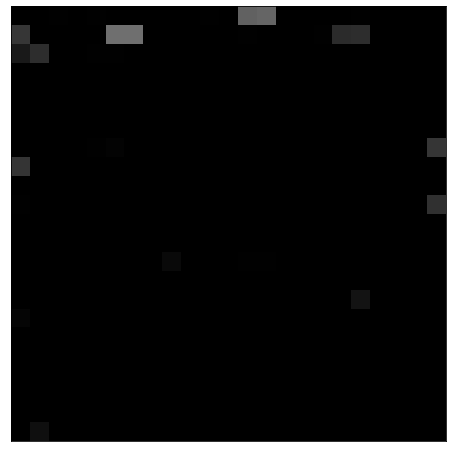

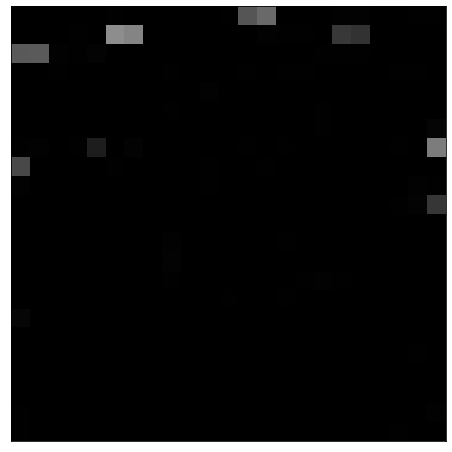

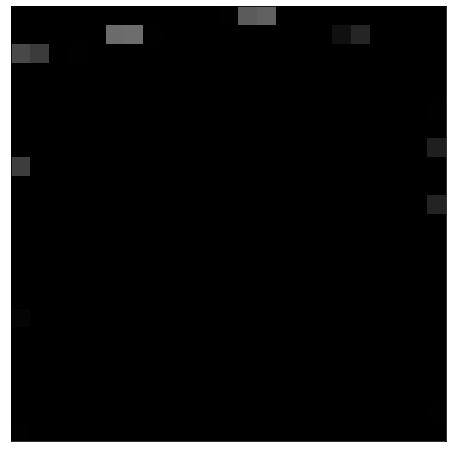

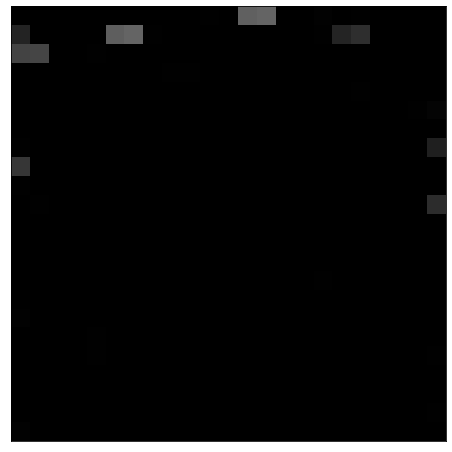

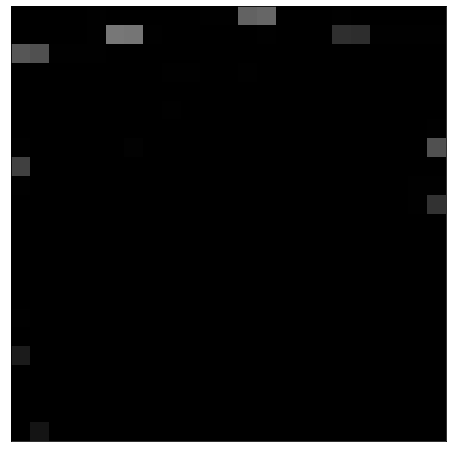

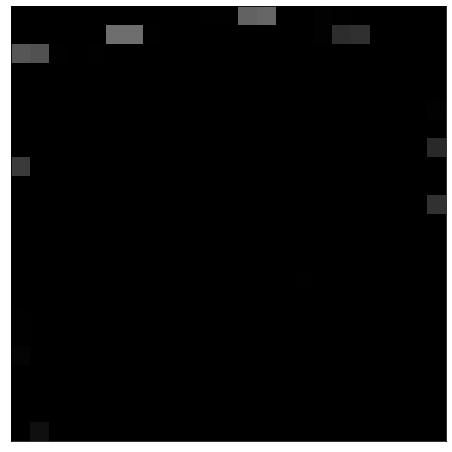

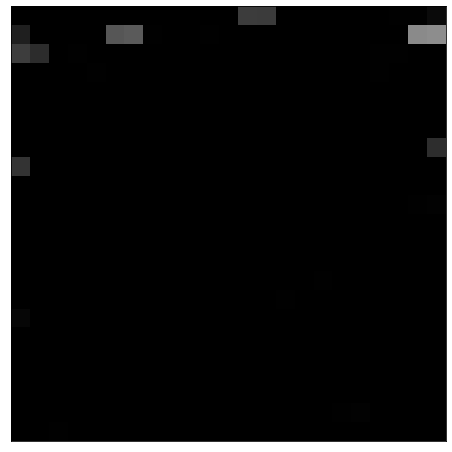

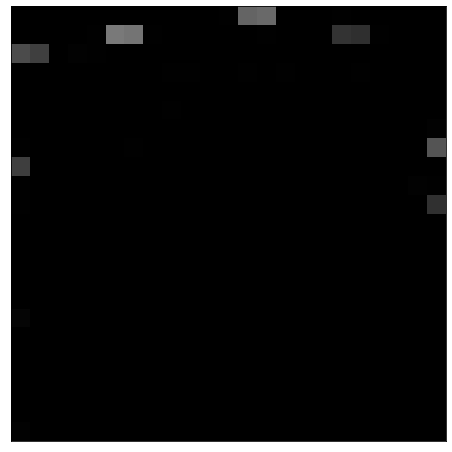

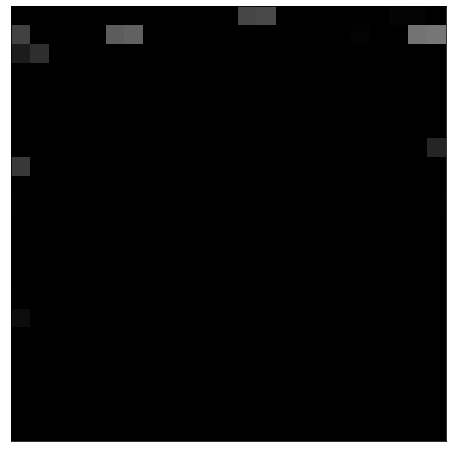

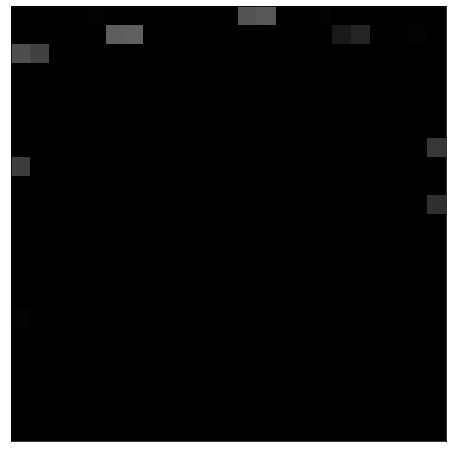

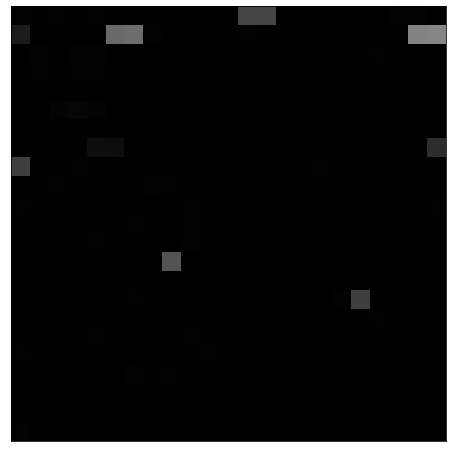

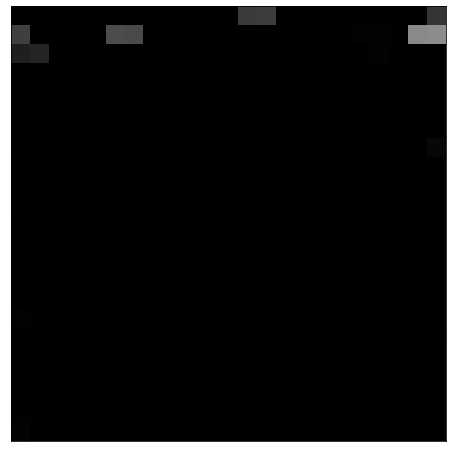

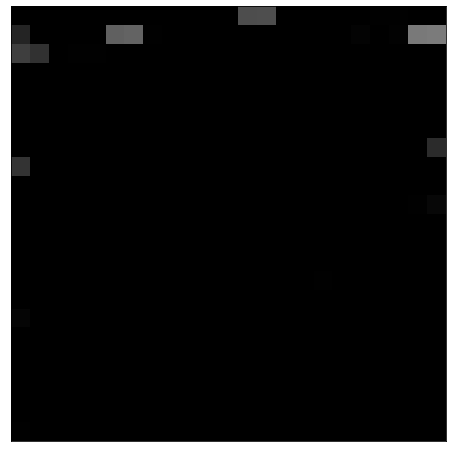

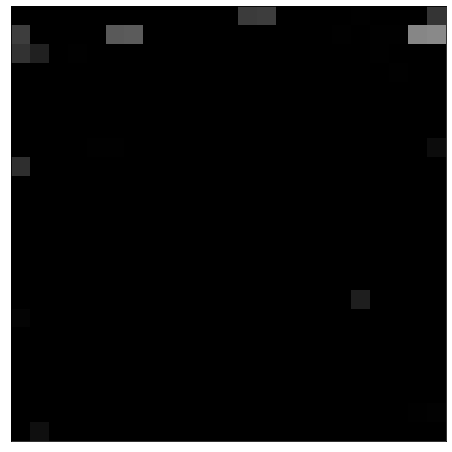

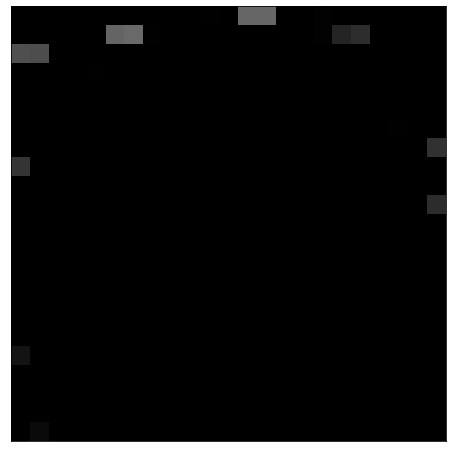

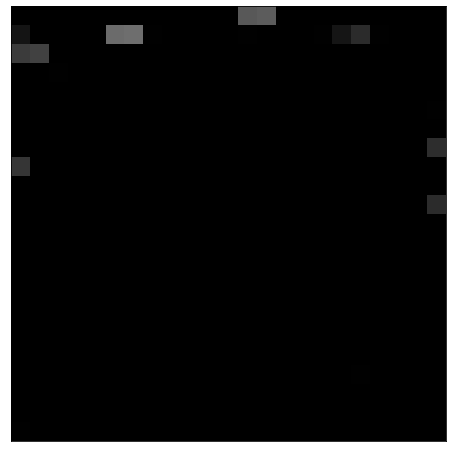

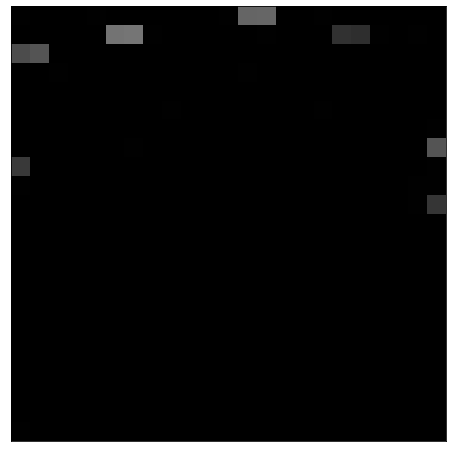

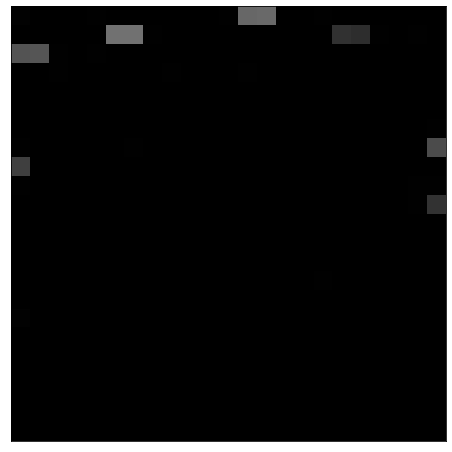

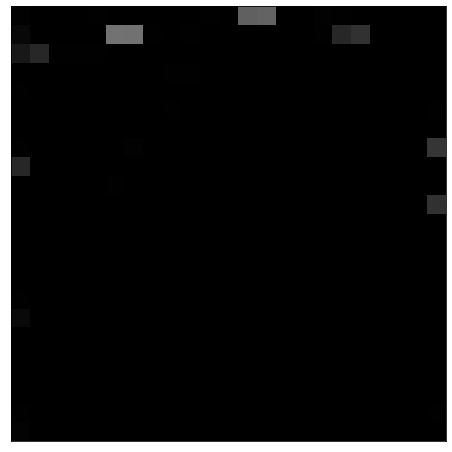

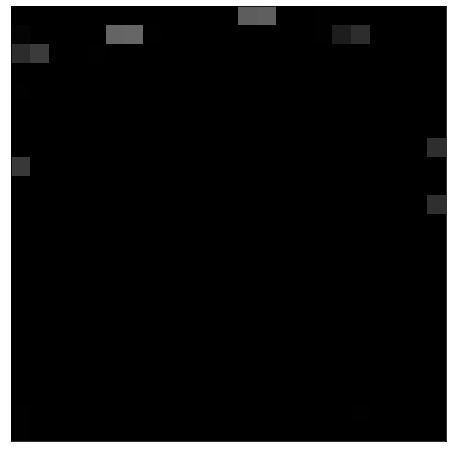

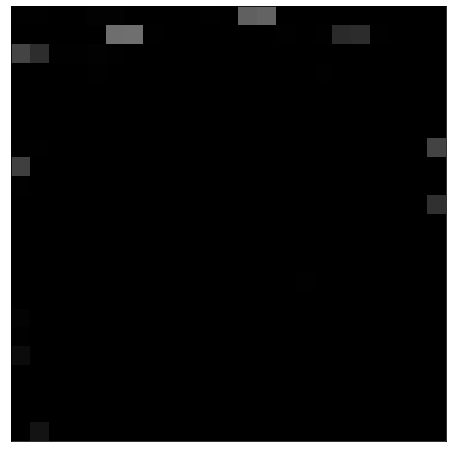

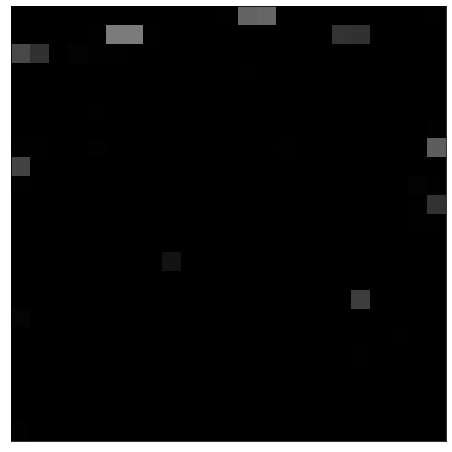

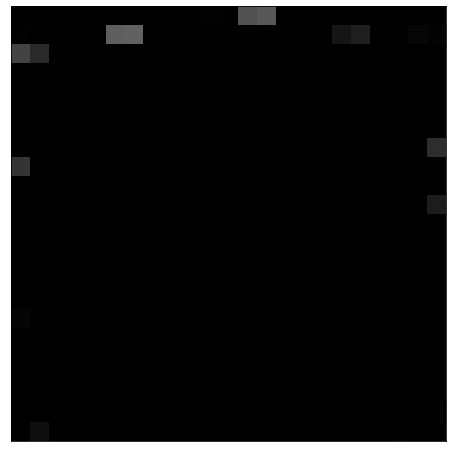

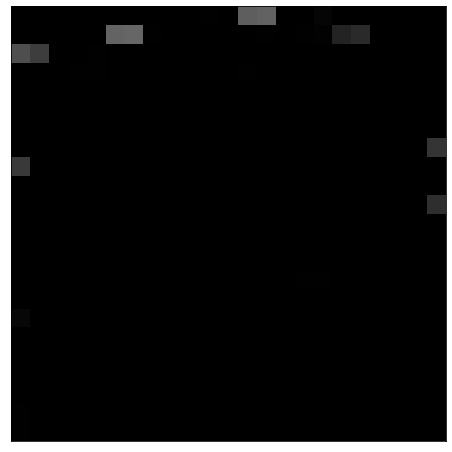

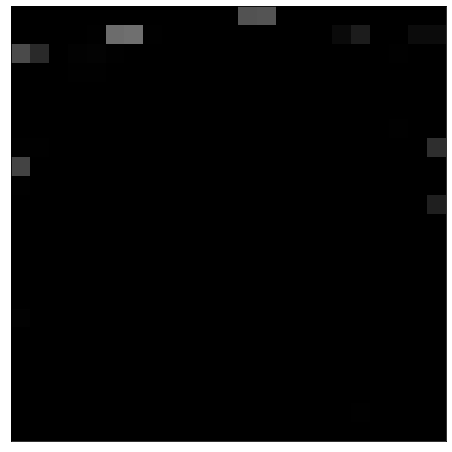

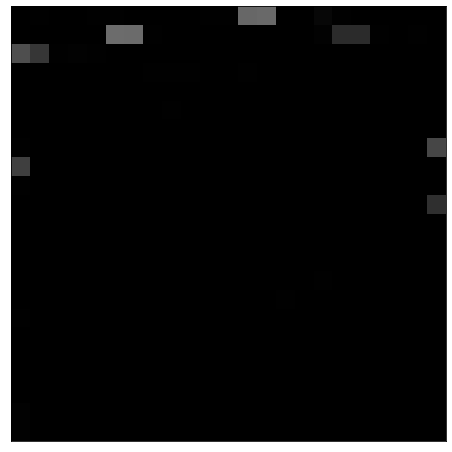

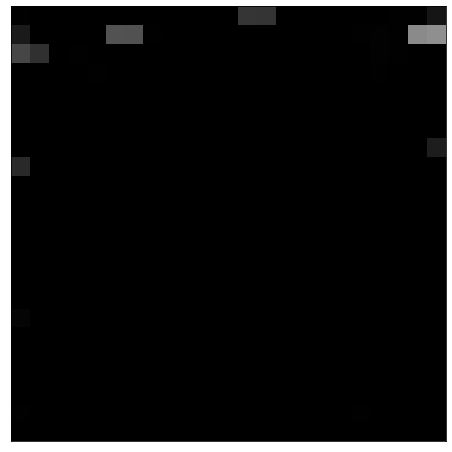

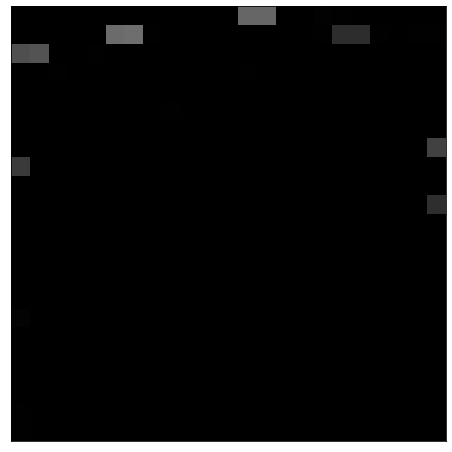

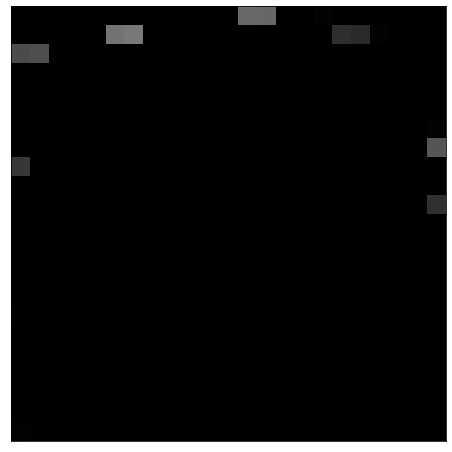

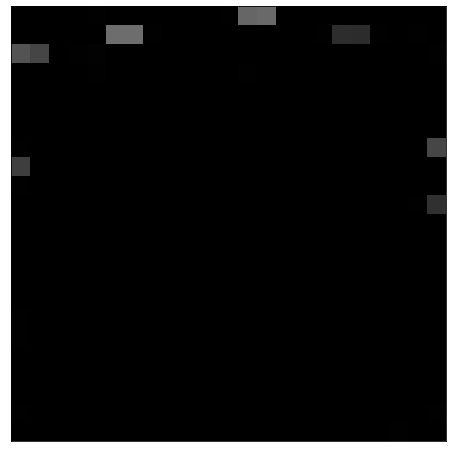

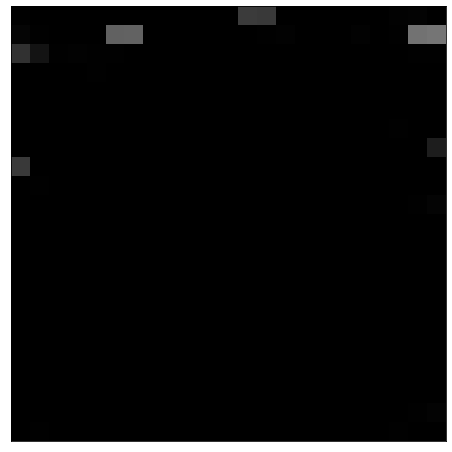

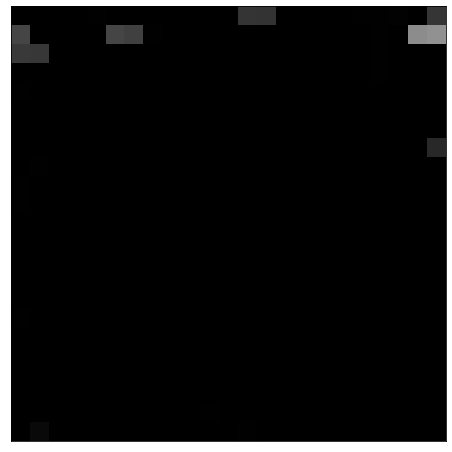

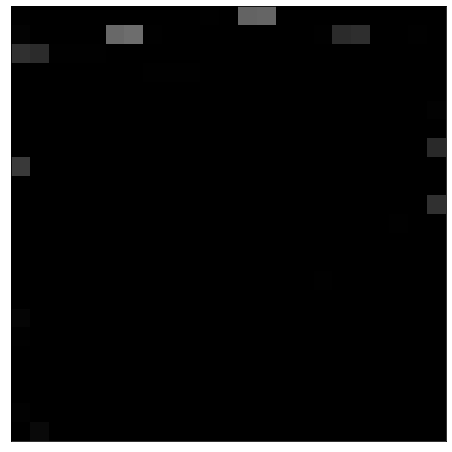

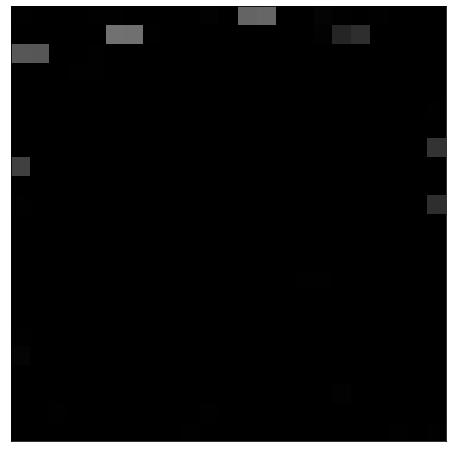

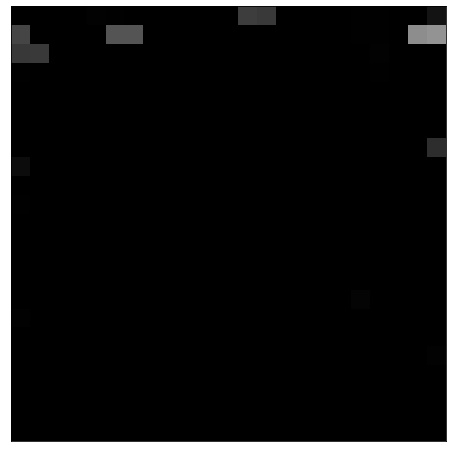

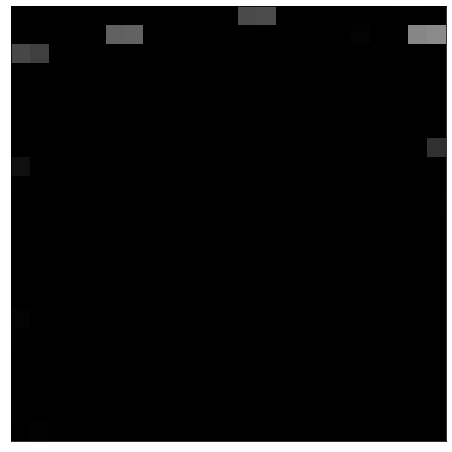

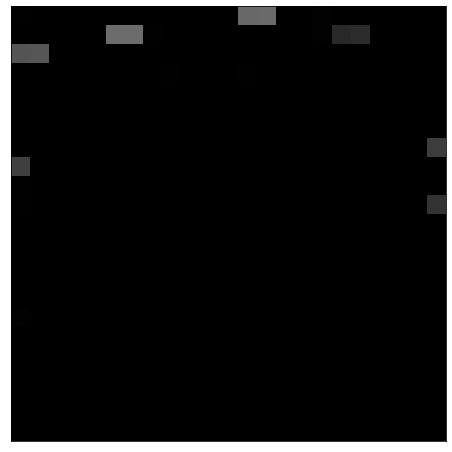

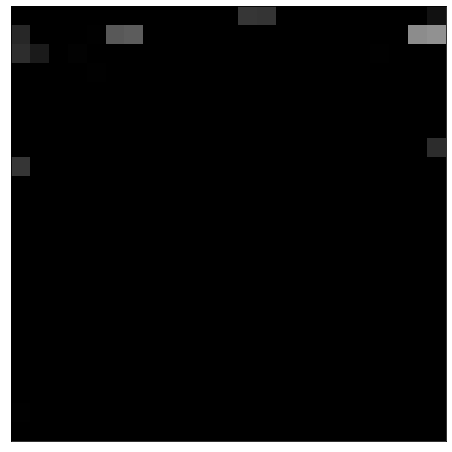

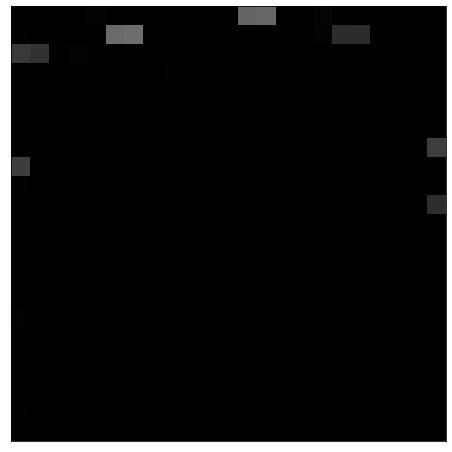

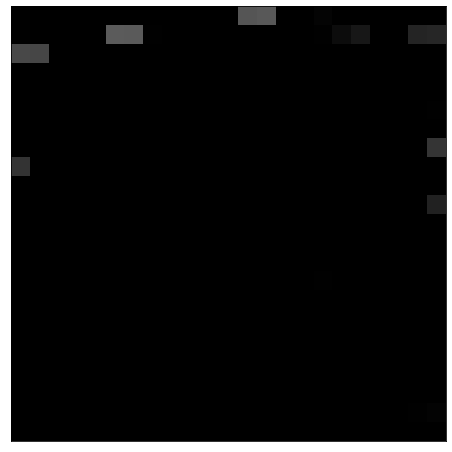

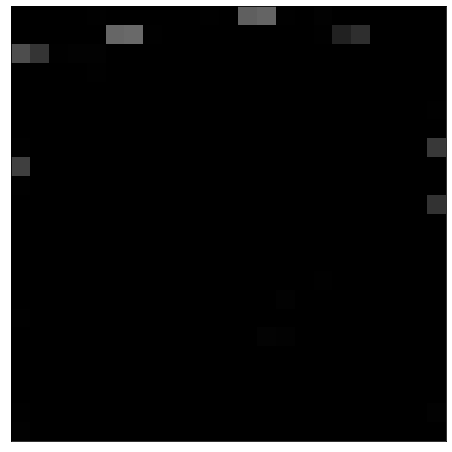

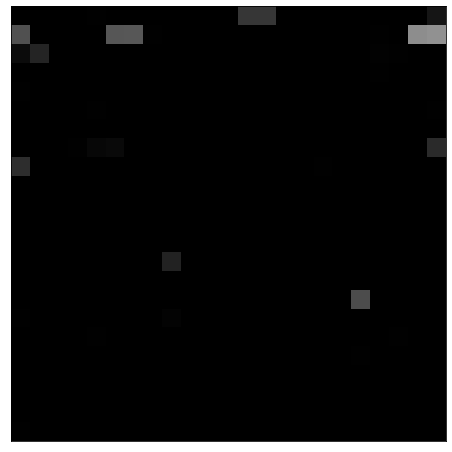

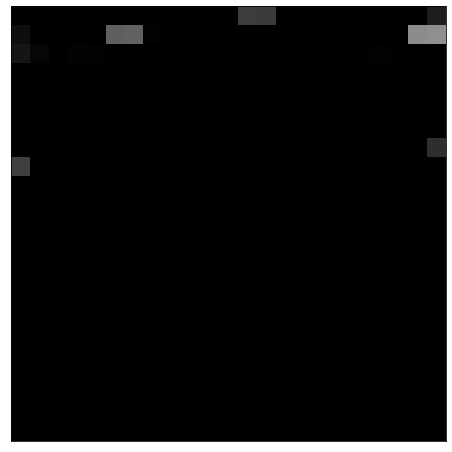

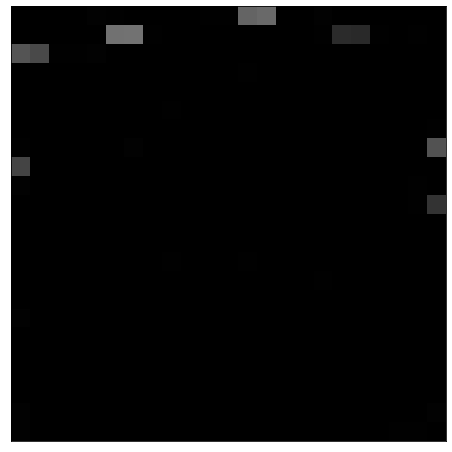

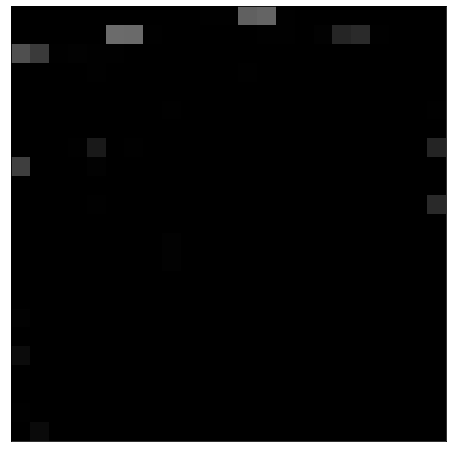

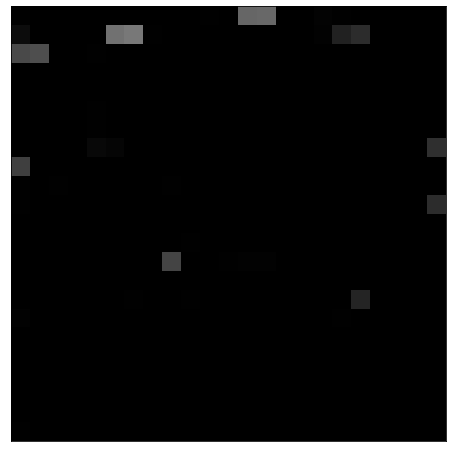

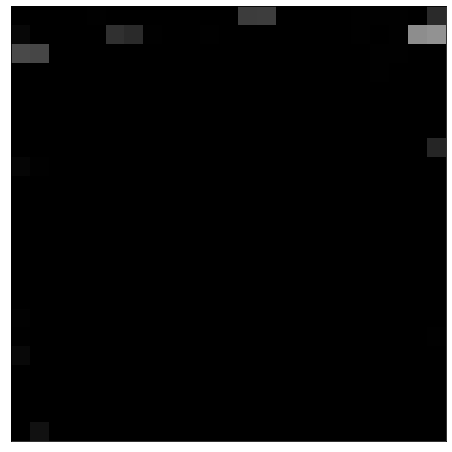

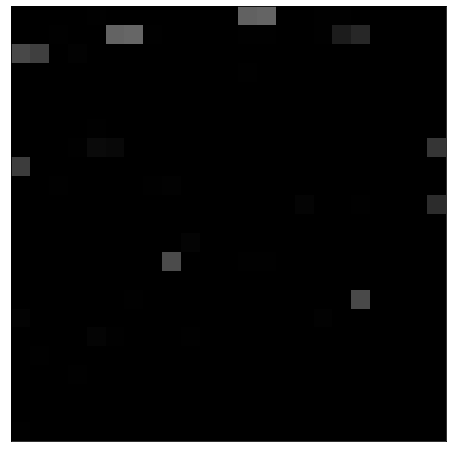

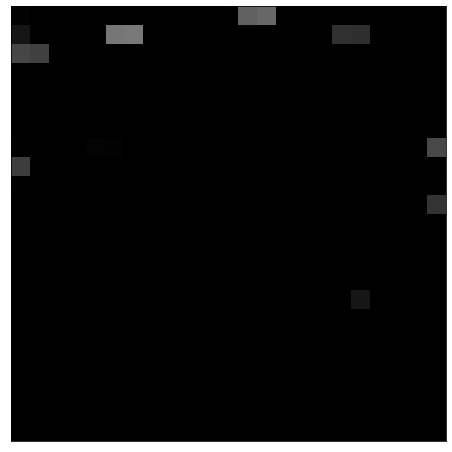

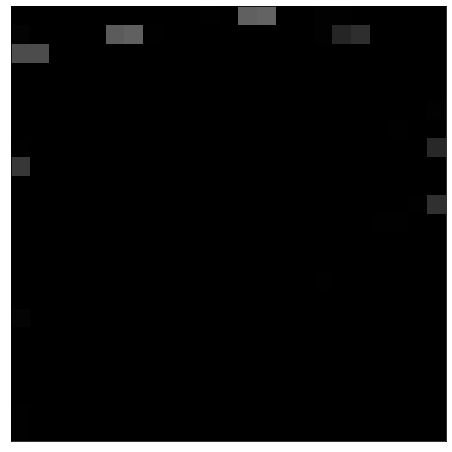

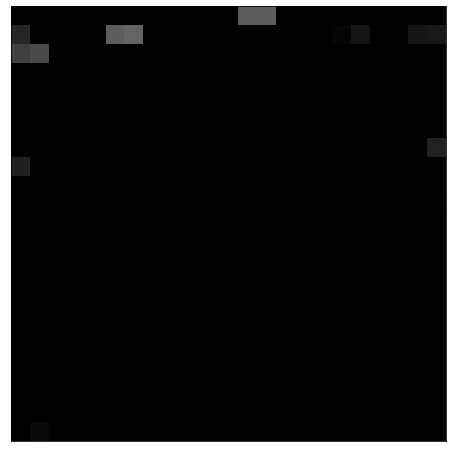

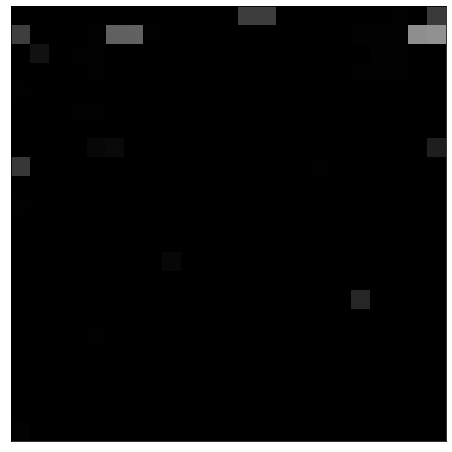

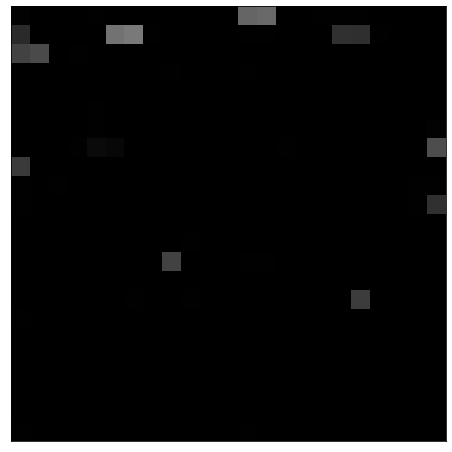

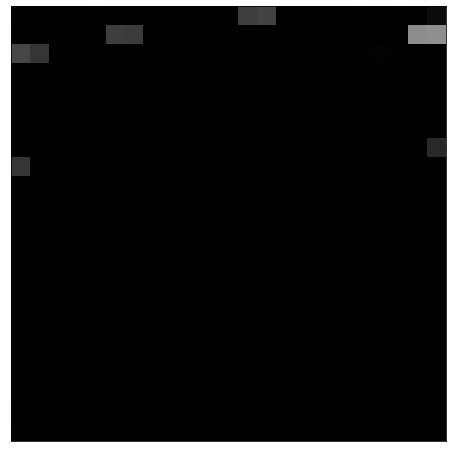

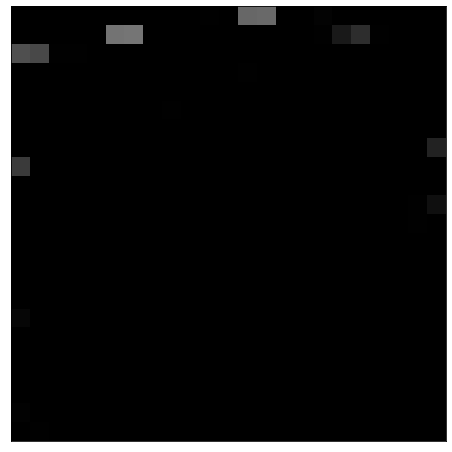

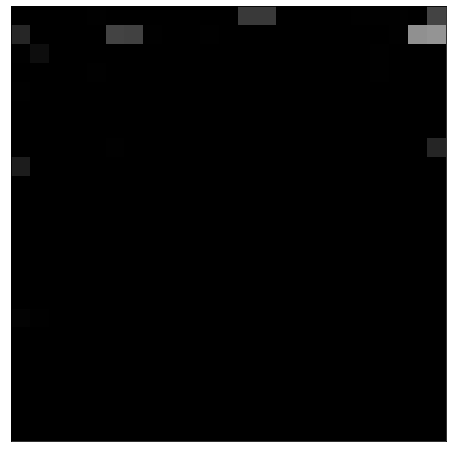

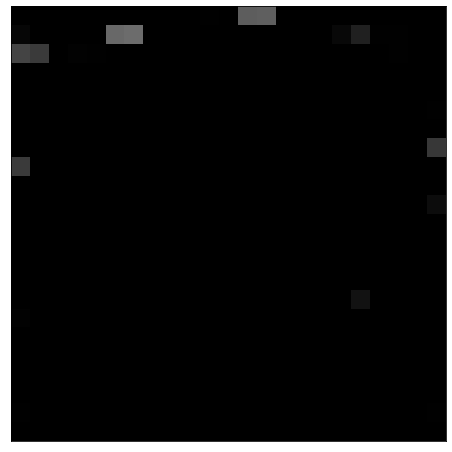

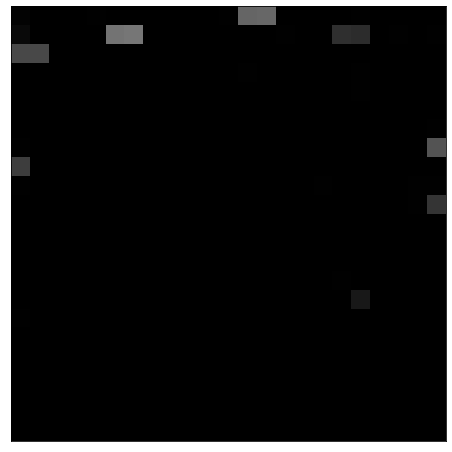

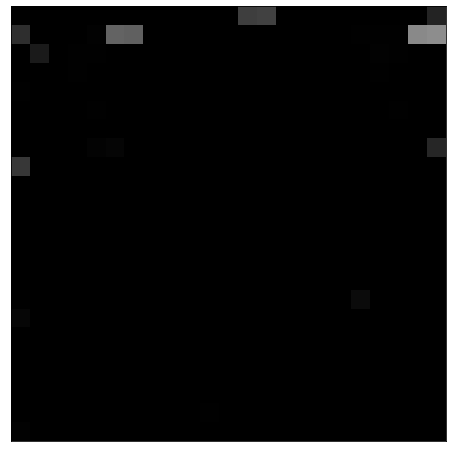

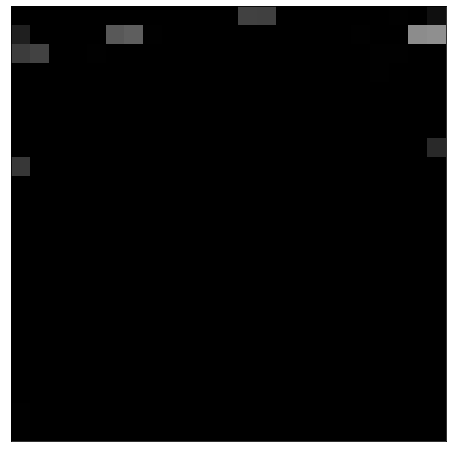

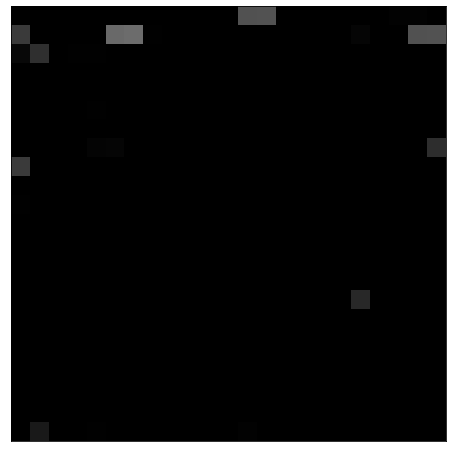

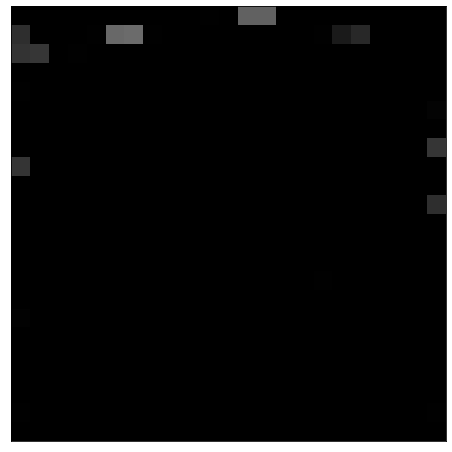

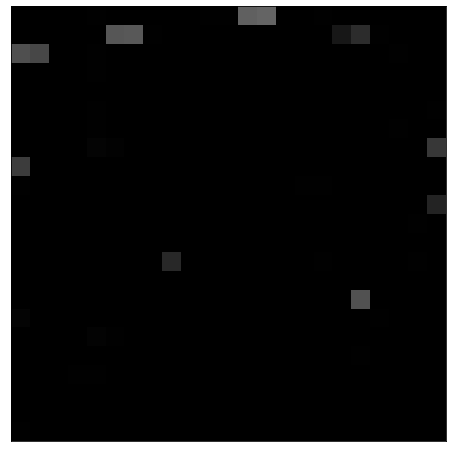

In [17]:
#Actual predicted loc
data_dir = 'C:/Users/noxtu/LnF_FYP2122S1_Goh-Yun-Bo-Wayne/FYP_data/uji_data/images/ori_wgan/150/b0f3/-7636.638000000268_4864899.473099999/'
d = os.listdir(data_dir)
ori_img(len(d),d, data_dir)


# Plot Runtime

In [10]:
cases = ["TL-feature extraction", "TL-fine tuning", "Without TL"]
results = []
for c in cases:
    csv = "C:\\Users\\noxtu\\LnF_FYP2122S1_Goh-Yun-Bo-Wayne\\FYP_data\\runtime/"+c+"/"
    total = []
    for b in range(3):
        if b!=2:
            for f in range(4):
                df = pd.read_csv(csv+"b"+str(b)+"f"+str(f)+".csv",header=0)
                total.append(df["RUNTIME"].values.sum())
        else:
            for f in range(5):
                df = pd.read_csv(csv+"b"+str(b)+"f"+str(f)+".csv",header=0)
                total.append(df["RUNTIME"].values.sum())
    tot = sum(total)
    results.append([c,tot])
print(results)
df = pd.DataFrame(results,columns=["CASES","RUNTIME"])
df.to_csv("C:\\Users\\noxtu\\LnF_FYP2122S1_Goh-Yun-Bo-Wayne\\FYP_data\\runtime/overall_runtime.csv",index=False)

[['TL-feature extraction', 350067.73083360004], ['TL-fine tuning', 427011.7222962], ['Without TL', 827399.0338268]]


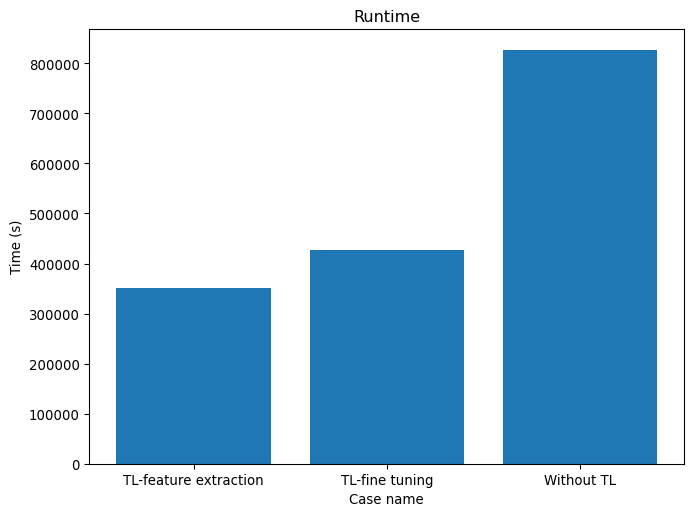

In [14]:
figure(figsize=(8, 6), dpi=96)
df = pd.read_csv("C:\\Users\\noxtu\\LnF_FYP2122S1_Goh-Yun-Bo-Wayne\\FYP_data\\runtime/overall_runtime.csv",header=0)
plt.title("Runtime")
plt.xlabel("Case name")
plt.ylabel("Time (s)")
case = df["CASES"].values.tolist()
runtime = df["RUNTIME"].values.tolist()
plt.bar(case,runtime)
plt.show()